# Traverse latent space between two points
This notebook allows to traverse between selected points in the latent space of the VAE model, using linear or spherical linear interpolation.

In [1]:
import os
import numpy as np
from specvae.model import BaseModel
import specvae.dataset as dt
import specvae.utils as utils

In [2]:
# Parameters
dataset = "MoNA"
# model_name = "betavae_capacity_20-1600-3-1600-20_03 (24-12-2021_00-17-31)"
# model_dir = "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\betavae_capacity_20-1600-3-1600-20_03 (24-12-2021_00-17-31)"


In [3]:
# Parameters
model_dirs = [
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\best\\betavae_capacity_20-800-200-50-3-50-200-800-20_01 (24-12-2021_01-50-12)",
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\best\\betavae_capacity_20-400-100-3-400-20_02 (24-12-2021_03-34-34)",
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\best\\betavae_capacity_20-1600-3-1600-20_03 (24-12-2021_00-17-31)",
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\best\\betavae_capacity_20-800-3-800-20_04 (24-12-2021_00-25-10)",
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\best\\betavae_capacity_20-100-3-90-100-20_05 (24-12-2021_03-01-19)",
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\best\\betavae_capacity_50-400-3-100-400-50_06 (24-12-2021_06-19-49)",

    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\beta\\betavae_capacity_100-1600-200-50-3-50-200-1600-100_01 (24-12-2021_09-13-36)",
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\beta\\betavae_capacity_100-1600-200-50-3-50-200-1600-100_02 (24-12-2021_09-15-11)",
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\beta\\betavae_capacity_100-1600-200-50-3-50-200-1600-100_03 (24-12-2021_09-29-26)",
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\beta\\betavae_capacity_100-1600-200-50-3-50-200-1600-100_04 (24-12-2021_09-29-36)",
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\beta\\betavae_capacity_100-1600-200-50-3-50-200-1600-100_05 (24-12-2021_09-06-14)",
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\beta\\betavae_capacity_100-1600-200-50-3-50-200-1600-100_06 (24-12-2021_09-05-10)",

    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\betavae_capacity_20-800-200-50-3-50-200-800-20_01 (24-12-2021_01-50-12)",
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\betavae_capacity_20-400-100-3-400-20_02 (24-12-2021_03-34-34)",
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\betavae_capacity_20-1600-3-1600-20_03 (24-12-2021_00-17-31)",
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\betavae_capacity_20-800-3-800-20_04 (24-12-2021_00-25-10)",
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\betavae_capacity_20-100-3-90-100-20_05 (24-12-2021_03-01-19)",
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\betavae_capacity_50-400-3-100-400-50_06 (24-12-2021_06-19-49)",

    "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\betavae_score\\betavae_capacity_100-400-100-3-400-100_01 (24-12-2021_11-06-17)",
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\betavae_score\\betavae_capacity_100-800-100-3-800-100_02 (24-12-2021_10-59-29)",
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\betavae_score\\betavae_capacity_100-400-200-50-3-50-200-400-100_03 (24-12-2021_09-47-19)",
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\betavae_score\\betavae_capacity_100-1600-3-1600-100_04 (24-12-2021_08-02-44)",
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\betavae_score\\betavae_capacity_100-400-100-3-400-100_05 (24-12-2021_10-57-01)",
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\betavae_score\\betavae_capacity_100-400-100-3-100-400-100_06 (24-12-2021_08-41-33)",

]

## Load model

In [4]:
device, cpu = utils.device(use_cuda=False)

Device in use:  cpu


In [5]:
def load_model(path):
    model_path = os.path.join(path, 'model.pth')
    model = BaseModel.load(model_path, device)
    model.eval()
    return model

## Load and transform data

In [6]:
if dataset == 'MoNA':
    labels = ['ionization_mode_id', 'collision_energy', 'total_exact_mass', 'precursor_mz', 'instrument_id', 'instrument_type_id', 'precursor_type_id', 'superclass_id', 'class_id']
    base_path = utils.get_project_path() / '.data' / 'MoNA'
    metadata_path = base_path / 'MoNA_meta.npy'
elif dataset == 'HMDB':
    labels = ['ionization_mode_id', 'collision_energy', 'superclass_id', 'class_id']
    base_path = utils.get_project_path() / '.data' / 'HMDB'
    metadata_path = base_path / 'HMDB_meta.npy'

metadata = None
if os.path.exists(metadata_path):
    metadata = np.load(metadata_path, allow_pickle=True).item()

df_all = dt.Spectra.open(base_path / 'MoNA_full.csv')

In [7]:
def load_vis_data(target_column):
    data_path = base_path / ('visualization_%s.csv' % target_column)
    df = dt.Spectra.open(data_path)
    return df

In [8]:
def preload_data_as_tensor(model, df):
    columns = model.config['input_columns']
    types = model.config['types']
    data = dt.Spectra.preload_tensor(
        device=device, data_frame=df[columns + ['id']], transform=model.transform, limit=-1, types=types, do_print=False)
    return data

In [9]:
def evaluate_model(model, df, data):
    print("Encode N=%d instances from %s dataset..." % (data['id'].shape[0], dataset))
    X, ids = data['spectrum'], data['id'] # TODO: handle the case for concatanated input
    Xrecon, z, latent_dist = model.forward_(X)
    print(z.shape)
    data_np = {}
    data_np['X'] = X.data.cpu().numpy()
    data_np['Xrecon'] = Xrecon.data.cpu().numpy()
    data_np['z'] = z.data.cpu().numpy()
    data_np['ids'] = ids
    data_np['ionization_mode_id'] = df['ionization_mode_id'].to_numpy()
    data_np['collision_energy'] = df['collision_energy'].to_numpy()
    if 'instrument_type' in df:
        data_np['instrument_type'] = df['instrument_type'].to_numpy()
    # data_np['images'] = df['images'].to_numpy()
    return data_np


## Prepare data for vizualization

In [10]:
import torch
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', context='notebook', rc={'figure.figsize':(24,20)})

import torchvision as tv
import specvae.vae as vae, specvae.utils as utils
import plotly.io as pio
pio.renderers.default='notebook'
import plotly.express as px
import pandas as pd

In [11]:
def get_colors(df, data_np):
    colors = {}
    colors['ionization_mode_id'] = np.array(list(map(lambda x: 'negative' if x==0 else 'positive', data_np['ionization_mode_id'].tolist())))
    colors['collision_energy'] = data_np['collision_energy']
    colors['superclass_id'] = df['superclass'].to_numpy()
    df['class'] = df['class'].fillna('Undefined')
    colors['class_id'] = df['class'].to_numpy()
    if dataset == 'MoNA':
        df['precursor_type'] = df['precursor_type'].fillna('Undefined')
        colors['precursor_type_id'] = df['precursor_type'].to_numpy()
        df['instrument_type'] = df['instrument_type'].fillna('Undefined')
        colors['instrument_type_id'] = df['instrument_type'].to_numpy()
        df['instrument'] = df['instrument'].fillna('Undefined')
        colors['instrument_id'] = df['instrument'].to_numpy()
        colors['total_exact_mass'] = df['total_exact_mass'].to_numpy()
        colors['precursor_mz'] = df['precursor_mz'].to_numpy()
    return colors

In [12]:
def compute_pca(data, n=2):
    print("Compute PCA for n_components=%d" % n)
    red = PCA(n)
    rdata = red.fit_transform(data)
    print("\t      explained_variance:", red.explained_variance_)
    print("\texplained_variance_ratio:", red.explained_variance_ratio_)
    return rdata, red

def compute_tsne(data, n=2):
    print("Compute tSNE for n_components=%d" % n)
    r = TSNE(n)
    rdata = r.fit_transform(data)
    print("TSNE:")
    print("\t      kl_divergence:", r.kl_divergence_)
    return rdata

def plot_data(data, labels=None, label_name=None, plot_components=2, 
        hover_data=None, width=1000, height=1000, title='Visualization of dataset'):
    if plot_components == 2:
        fig = px.scatter(data, x=0, y=1, color=labels, 
            template='plotly_white', hover_data=hover_data,
            title=title, width=width, height=height)
        fig.show()
    elif plot_components == 3:
        fig = px.scatter_3d(data, x=0, y=1, z=2, color=labels, 
            template='plotly_white', hover_data=hover_data, 
            title=title, width=width, height=height)
        fig.update_traces(
            marker=dict(size=3),
            selector=dict(mode='markers'))
        fig.show()

In [13]:
import matplotlib.pyplot as plt
import numpy as np

def plot_latent(x, y, color, scale_size=1., cmap='BrBG_r', alpha=0.8, 
    figsize=(10, 10), dpi=100, xlabel='X', ylabel='Y', xlim=None, ylim=None):
    fig = plt.figure(figsize=figsize, dpi=dpi)
    gs = fig.add_gridspec(2, 3,  width_ratios=(2, 14, 1), height_ratios=(14, 2),
        left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.05, hspace=0.05)
    ax_main = plt.subplot(gs[0, 1])
    ax_xDist = plt.subplot(gs[1, 1], sharex=ax_main)
    ax_yDist = plt.subplot(gs[0, 0], sharey=ax_main)
    ax_cbar = plt.subplot(gs[0, 2])

    sc = ax_main.scatter(x, y, s=scale_size, marker='.', c=color, cmap=cmap, alpha=alpha, edgecolors='black', linewidth=0.1)
    ax_main.xaxis.set_major_locator(plt.MaxNLocator(10))
    ax_main.yaxis.set_major_locator(plt.MaxNLocator(10))
    ax_main.set_xlim(xlim)
    ax_main.set_ylim(ylim)

    cbar = fig.colorbar(sc, cax=ax_cbar)
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.yaxis.set_major_locator(plt.MaxNLocator(10))
    cbar.set_alpha(1.0)
    cbar.draw_all()

    ax_xDist.hist(x, bins=100, align='mid', density=True, lw=0.2)
    ax_xDist.set(xlabel=xlabel)
    ax_xCumDist = ax_xDist.twinx()
    ax_xCumDist.hist(x, bins=100, cumulative=True, histtype='step', density=True, color='r', align='mid')
    ax_xCumDist.tick_params('y', colors='r')
    ax_xCumDist.set_ylabel('cumulative',color='r')

    ax_yDist.hist(y, bins=100, orientation='horizontal', align='mid', density=True, lw=0.2)
    ax_yDist.set(ylabel=ylabel)
    ax_yCumDist = ax_yDist.twiny()
    ax_yCumDist.hist(y,bins=100,cumulative=True,histtype='step',density=True,color='r',align='mid',orientation='horizontal')
    ax_yCumDist.tick_params('x', colors='r')
    ax_yCumDist.set_xlabel('cumulative',color='r')

    plt.setp(ax_main.get_xticklabels(), visible=False)
    plt.setp(ax_main.get_yticklabels(), visible=False)
    return fig, ax_main

In [14]:
from specvae import visualize as vis
def vis_spectra(data, label, color='red', config=None):
    mode_pos = data.copy().sort_values(by=[label])
    print(mode_pos.shape)
    fig = None
    if mode_pos.shape[0] > 0:
        height, width = 1, mode_pos.shape[0]
        fig, axs = plt.subplots(1, width, figsize=(width * 7, 5))
        for i, ((inx, row), ax) in enumerate(zip(mode_pos.iterrows(), axs.flat)):
            vis.plot_spectrum(row['spectrum'], name='', meta={
                'idvis': row['idvis'],
                'ionization mode': row['ionization_mode_id'], 
                'collision energy': row['collision_energy']
            }, ax=ax, config=config, color=color)
        plt.show()
    return fig


In [15]:
from specvae import visualize as vis
def vis_spectra_mode(data, label, config=None):
    mode_pos = data[data['ionization_mode_id'] == 1].copy().sort_values(by=[label])
    mode_neg = data[data['ionization_mode_id'] == 0].copy().sort_values(by=[label])
    print(mode_pos.shape)
    print(mode_neg.shape)

    if mode_pos.shape[0] > 0:
        height, width = 1, mode_pos.shape[0]
        fig, axs = plt.subplots(1, width, figsize=(width * 7, 5))
        for i, ((inx, row), ax) in enumerate(zip(mode_pos.iterrows(), axs.flat)):
            vis.plot_spectrum(row['spectrum'], name='', meta={
                'ionization mode': row['ionization_mode_id'], 
                'collision energy': row['collision_energy']
            }, ax=ax, config=config)
        plt.show()

    if mode_neg.shape[0] > 0:
        height, width = 1, mode_neg.shape[0]
        fig, axs = plt.subplots(1, width, figsize=(width * 7, 5))
        for i, ((inx, row), ax) in enumerate(zip(mode_neg.iterrows(), axs.flat)):
            vis.plot_spectrum(row['spectrum'], name='', meta={
                'ionization mode': row['ionization_mode_id'], 
                'collision energy': row['collision_energy']
            }, ax=ax, config=config)
        plt.show()

## Select compound for vizualization

In [16]:
pd.set_option('display.max_rows', 500)
df_ = df_all[df_all['total_exact_mass'] >= 500.].copy()
dfgr = df_.groupby(['id', 'instrument_type']).size().reset_index(name='count')
dfgr = dfgr.groupby(['id']).size().reset_index(name='count')
dfgr[dfgr['count'] >= 5]

,id,count
370,DFPMSGMNTNDNHN-ZPHOTFPESA-N,8
445,DVGGLGXQSFURLP-VWMSDXGPSA-N,5
579,FYGDTMLNYKFZSV-DZOUCCHMSA-N,5
688,GXLQUHPXGLZNGE-BJBZVNFPSA-N,5
703,GZYPWOGIYAIIPV-JBDTYSNRSA-N,5
883,IKGXIBQEEMLURG-NVPNHPEKSA-N,10
1850,PUPKKEQDLNREIM-QNSQPKOQSA-N,5
1942,QJYNZEYHSMRWBK-NIKIMHBISA-N,5
1993,QUQPHWDTPGMPEX-QJBIFVCTSA-N,6
2005,QWIZNVHXZXRPDR-WSCXOGSTSA-N,6


In [17]:
# smiles = 'O=C1N=C(O)C2=NC3=CC(=C(C=C3N(C2=N1)CC(O)C(O)C(O)CO)C)C' # B2: Riboflavin
# smiles = 'CC(C)CCCC(C)C1CCC2C(=CC=C3CC(CCC3=C)O)CCCC12C' # D3: Cholecalciferol
# smiles = 'CCC1C(C)(C(C(C)C(=O)C(C)CC(C)(C(C(C)C(C(C)C(=O)O1)OC2CC(C)(C(C(C)O2)O)OC)OC3C(C(CC(C)O3)N(C)C)O)O)O)O' # Erythromycin
# BACITRACIN
# smiles = 'O=C(O)CCC(N=C(O)C(N=C(O)C1N=C(SC1)C(N)C(C)CC)CC(C)C)C(O)=NC(C(O)=NC2C(O)=NC(C(O)=NC(C(O)=NC(C(O)=NC(C(O)=NC(C(O)=NC(C(O)=NCCCC2)CC(=N)O)CC(=O)O)CC3=CN=CN3)CC=4C=CC=CC4)C(C)CC)CCCN)C(C)CC'
# Methylcobalamin
# smiles = 'CC1=CC2=C(C=C1C)[N+](=CN2)[C@@H]3[C@@H]([C@@H]([C@@H](CO)O3)OP(=O)(O)O[C@H](C)CN=C(CC[C@]4(C)[C@@H](CC(=N)O)[C@@H]5[C@@]6(C)[C@@](C)(CC(=N)O)[C@H](CCC(=N)[O-])C(=C(C)C7=NC(=CC8=NC(=C(C)C4=N5)[C@@H](CCC(=N)[O-])C8(C)C)[C@@H](CCC(=N)[O-])[C@]7(C)CC(=N)O)N6)O)O.[CH3].[Co+2]'

# smiles = 'O=C(O)C1OC(OC2CCC3(C)C4CC=C5C6CC(C)(C)CCC6(C(=O)OC7OC(CO)C(O)C(O)C7O)CCC5(C)C4(C)CCC3C2(C)C)C(OC8OC(CO)C(O)C(O)C8O)C(O)C1O'
# smiles = 'O=C1C=C(OC2=CC(OC3OC(CO)C(O)C(O)C3OC4OC(C)C(O)C(O)C4O)=CC(O)=C12)C=5C=CC(OC)=CC5'
# smiles = 'OC=1C=CC=CC1N=C(O)C'
# smiles = 'O=C1N(C)C(C(O)=NC(C(=O)N(C)C(C(O)=NC(C(O)=NC(C(=O)N(C)C(C(=O)N(C)C(C(=O)N(C)C(C(=O)N(C)C(C(O)=NC(C(=O)N(C)C1)CC)C(O)C(C)CC=CC)C(C)C)CC(C)C)CC(C)C)C)C)CC(C)C)C(C)C)CC(C)C'
# smiles = 'OC(C=C)(C)CCC1C(O)(C)CCC2C(C)(C)CCCC12C'

# inchikey = 'JEWJRMKHSMTXPP-WZHZPDAFSA-L' # Methylcobalamin, B12 (not included here)
# inchikey = 'AUNGANRZJHBGPY-SCRDCRAPSA-N' # Riboflavin, B2
# inchikey = 'QYSXJUFSXHHAJI-UHFFFAOYSA-N' # D3: Cholecalciferol, D3 (not included) 
# inchikey = 'GPLRAVKSCUXZTP-UHFFFAOYSA-N' # Diglycerol (not included)
# inchikey = 'DUUGKQCEGZLZNO-UHFFFAOYSA-N' # 5-Hydroxyindole-3-acetate
# inchikey = 'WHUUTDBJXJRKMK-VKHMYHEASA-N' # L-Glutamic acid
# inchikey = 'XFTRTWQBIOMVPK-YFKPBYRVSA-N' # S-Citramalic acid
# inchikey = 'JTJJJLSLKZFEPJ-ZAYCRUKZSA-N' # Meleagrin
# inchikey = 'TVZHDVCTOCZDNE-WVJYZQHISA-N' # Neosolaniol
# inchikey = 'RWQKHEORZBHNRI-BMIGLBTASA-N' # Ochratoxin A
# inchikey = 'SPWSUFUPTSJWNG-JJUKSXGLSA-N' # Roquefortine C
# inchikey = 'GXCGYHWSYNQVHU-UGAPSZEOSA-N' # Verrucarin J
# inchikey = 'ZSRVBNXAPSQDFY-OJVARPOJSA-N' # Verrucarol
# inchikey = 'MFYSYFVPBJMHGN-ZPOLXVRWSA-N' # Cortisone
# inchikey = 'FEBLZLNTKCEFIT-VSXGLTOVSA-N' # Fluocinolone acetonide
# inchikey = 'OJMMVQQUTAEWLP-KIDUDLJLSA-N' # Lincomycin
# inchikey = 'VWKBHQGCNGULAZ-UHFFFAOYSA-N' # Soyasapogenol B base + O-HexA-Pen-dHex, O-C6H7O3(DDMP)
# inchikey = 'XZZNDPSIHUTMOC-UHFFFAOYSA-N' # Triphenylphosphate
# inchikey = 'SECKRCOLJRRGGV-UHFFFAOYSA-N' # Vardenafil

# inchikey = 'KXGVEGMKQFWNSR-LLQZFEROSA-N' # 3alpha,12alpha-Dihydroxy-5beta-cholan-24-oic acid

# inchikey = 'QJYNZEYHSMRWBK-NIKIMHBISA-N' # beta-penta-O-galloyl-glucose
# inchikey = 'GZYPWOGIYAIIPV-JBDTYSNRSA-N' # Ginsenoside Rb1
# inchikey = 'IKGXIBQEEMLURG-NVPNHPEKSA-N' # Rutin
# inchikey = 'DVGGLGXQSFURLP-VWMSDXGPSA-N' # Tiliroside
# inchikey = 'GXLQUHPXGLZNGE-BJBZVNFPSA-N' # 2-(3,4-dihydroxyphenyl)-5-hydroxy-3,7-bis[[(2S,3R,4R,5R,6S)-3,4,5-trihydroxy-6-methyloxan-2-yl]oxy]chromen-4-one
# inchikey = 'PUPKKEQDLNREIM-QNSQPKOQSA-N' # Kaempferitrin
# inchikey = 'QUQPHWDTPGMPEX-QJBIFVCTSA-N' # Hesperedin
# inchikey = 'QWIZNVHXZXRPDR-WSCXOGSTSA-N' # D(+)-Melezitose
inchikey = 'RCNSAJSGRJSBKK-NSQVQWHSSA-N' # BILIVERDIN
# inchikey = 'RTATXGUCZHCSNG-QHWHWDPRSA-N' # kaempferol-3-O-rutinoside
# inchikey = 'ZEJXENDZTYVXDP-CSJHBIPPSA-N' # kaempferol-7-O-neohesperidoside

# inchikey = 'RTATXGUCZHCSNG-QHWHWDPRSA-N'



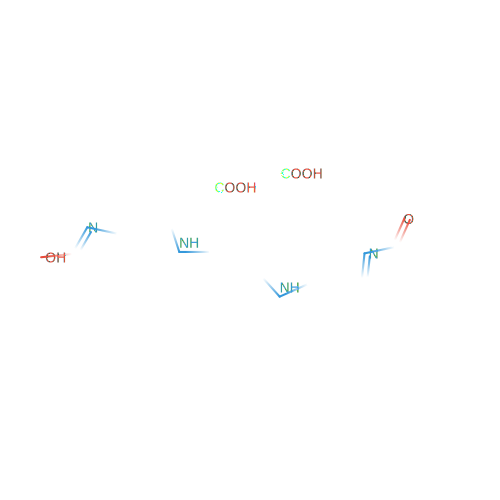

In [18]:
from IPython.display import display_svg, SVG
imgfile = utils.get_project_path() / '.img' / ('%s.svg' % inchikey)
if os.path.exists(imgfile):
    display_svg(SVG(filename=imgfile))

In [19]:
label = 'collision_energy'
path = model_dirs[0]
pd.set_option("display.max_colwidth", 200)

In [20]:
# Select compound with given SMILES, filter datapoints:
# sel = df_all[df_all['SMILES'] == smiles].copy()
sel = df_all[df_all['id'] == inchikey].copy()
sel.dropna(subset=[label], inplace=True)
sel = sel.groupby([label]).head(3)
sel = sel.sort_values(by=[label])
sel['idvis'] = np.arange(1, len(sel) + 1, dtype=int)
sel[['idvis', label, 'instrument_type', 'ionization_mode_id']]

,idvis,collision_energy,instrument_type,ionization_mode_id
34899,1,25.0,ESI-QFT,0
34902,2,25.0,ESI-QFT,1
34896,3,35.0,Linear Ion Trap,0
34898,4,35.0,LC-ESI-QTOF,0
34900,5,35.0,ESI-QFT,0
34905,6,40.0,LC-ESI-IT,1
34901,7,45.0,ESI-QFT,0
34904,8,45.0,ESI-QFT,1


## Plot 2D PCA for different labels

Path: d:\Workspace\SpecVAE\.model\MoNA\betavae_capacity_nextron\betavae_score\betavae_capacity_100-400-100-3-400-100_01 (24-12-2021_11-06-17)
Encode N=3640 instances from MoNA dataset...
torch.Size([3640, 3])
Encode N=8 instances from MoNA dataset...
torch.Size([8, 3])
Beta: 0.01
Compute PCA for n_components=2
	      explained_variance: [1.4266372 0.7950909]
	explained_variance_ratio: [0.50444484 0.2811363 ]


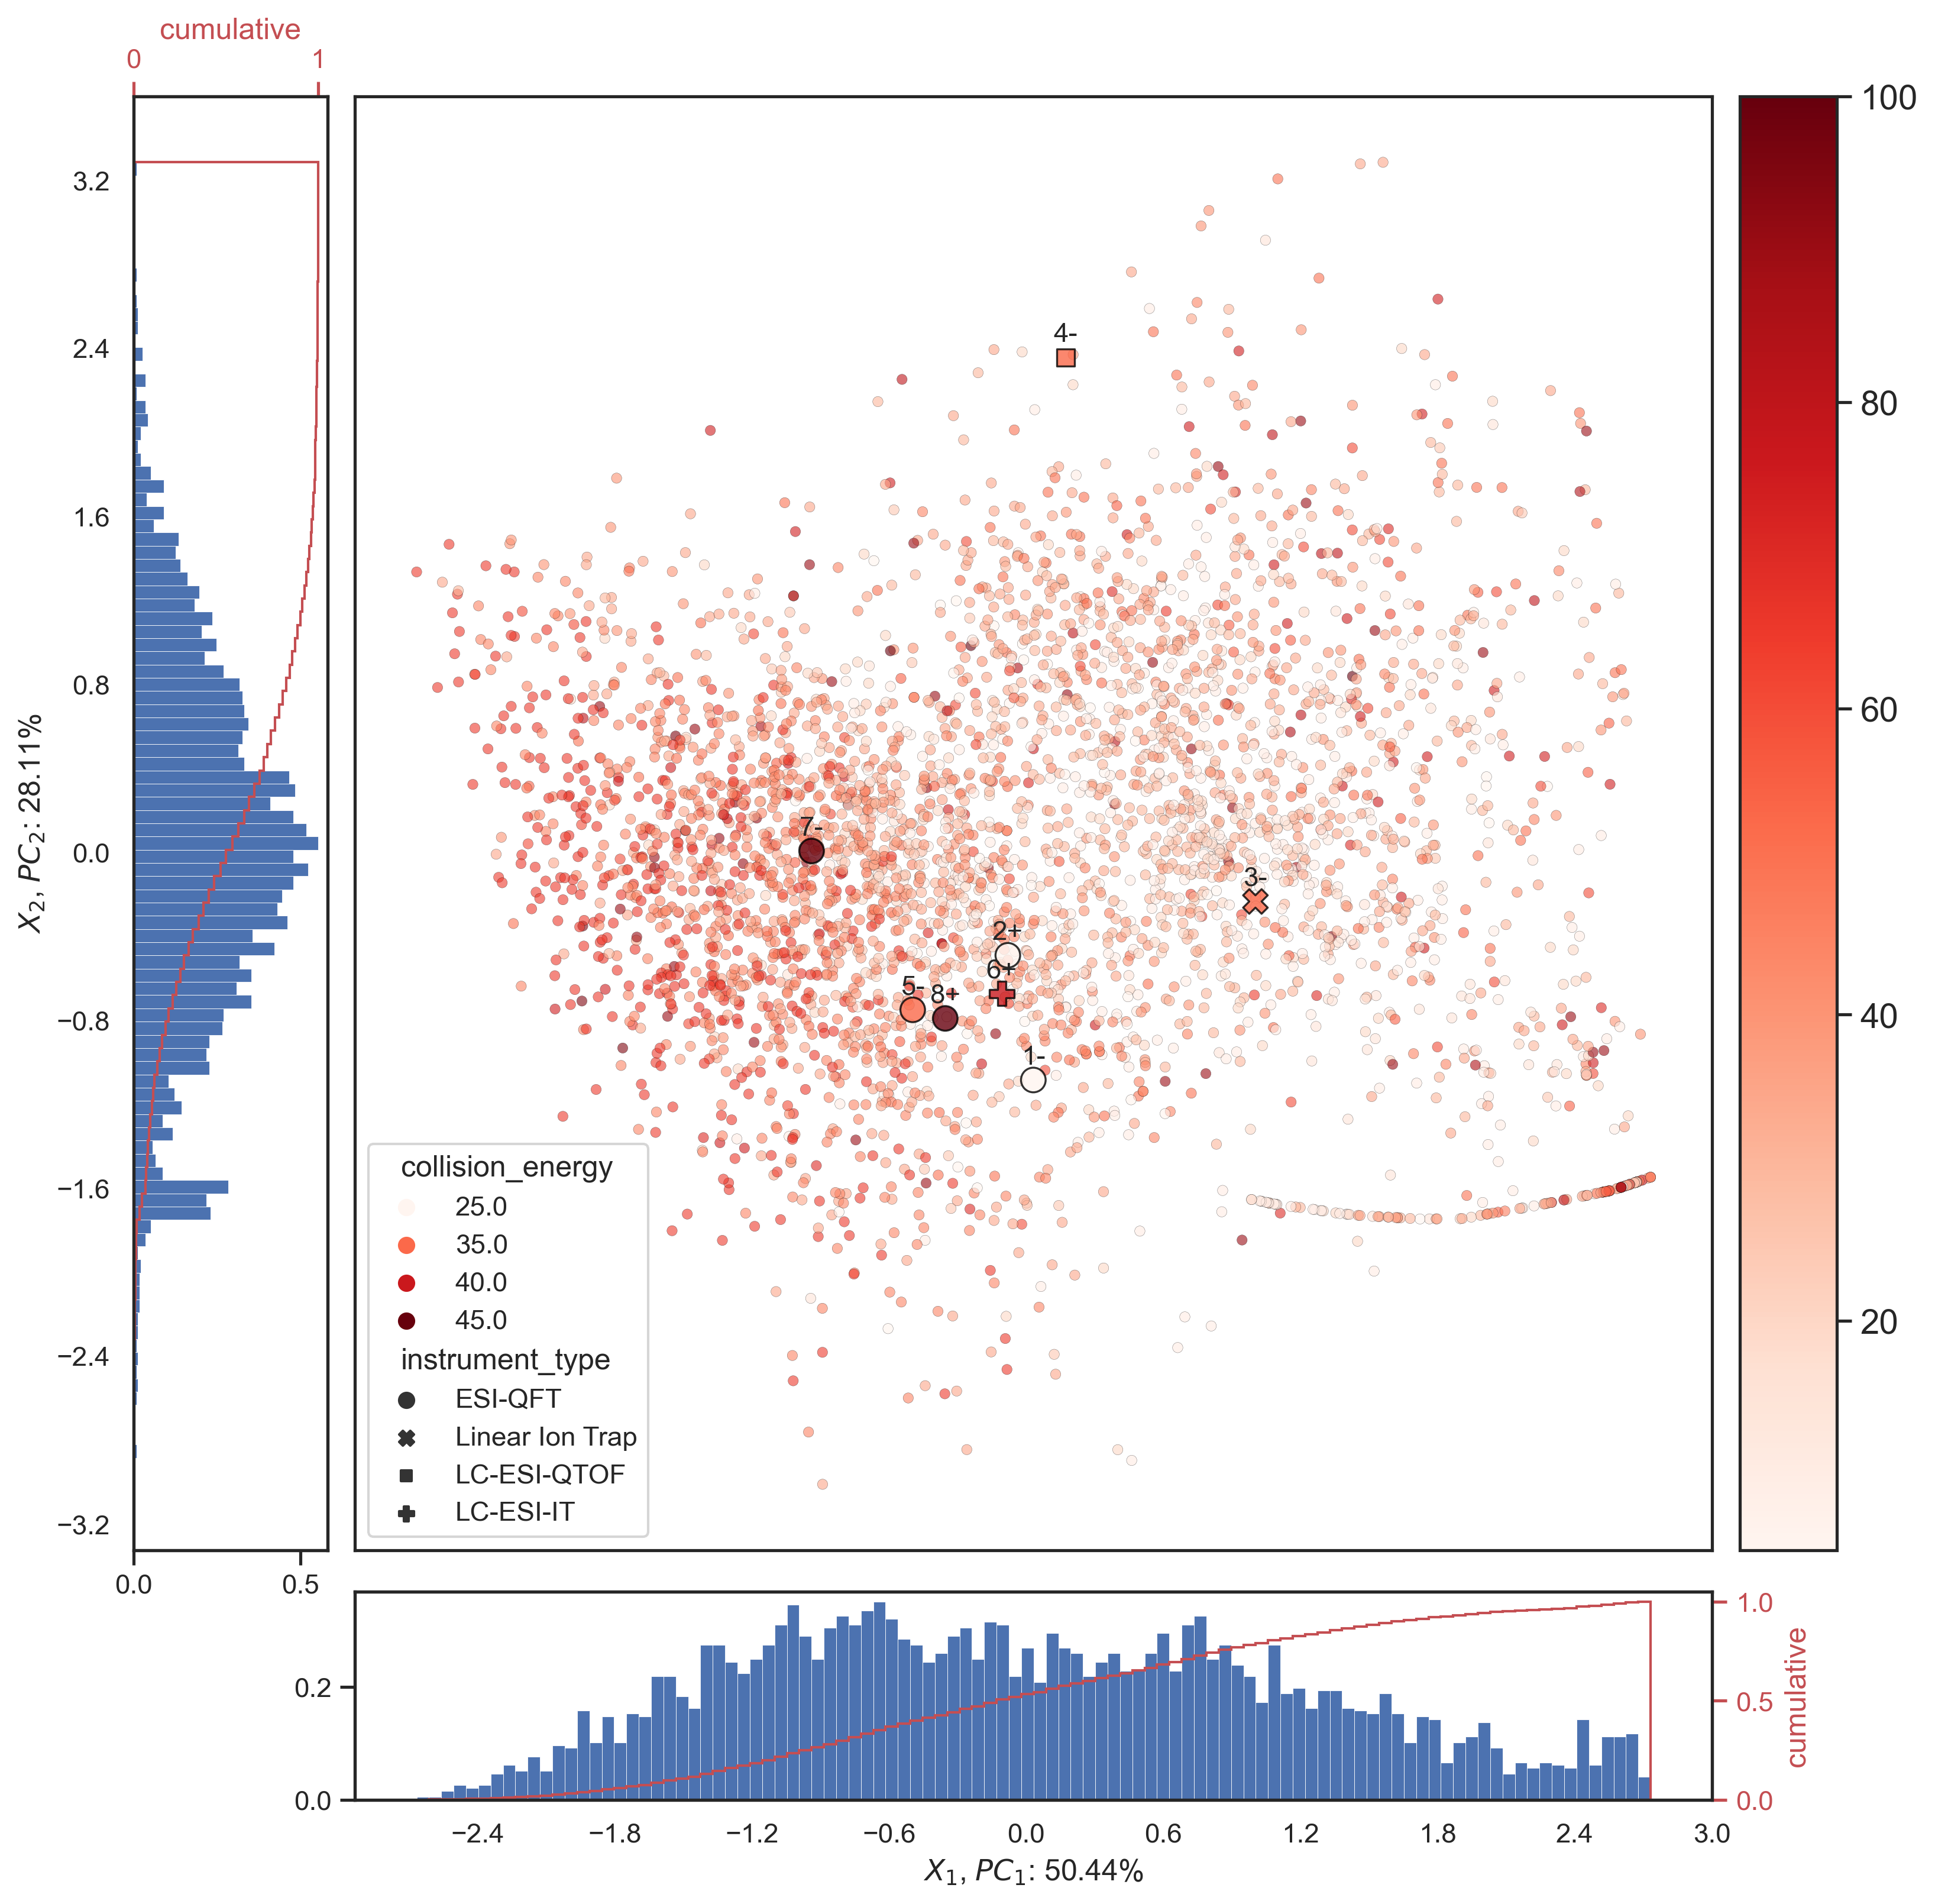

In [21]:
# Obtain latent representations:
print('Path:', path)
pca = True
dim1, dim2 = 2,1 # applies only when pca is False

model = load_model(path)
df = load_vis_data('total_exact_mass')
df = df[(df['collision_energy'] >= 5) & (df['collision_energy'] <= 100)]
data = preload_data_as_tensor(model, df)
data_sel = preload_data_as_tensor(model, sel)
data_np = evaluate_model(model, df, data)
data_np_sel = evaluate_model(model, sel, data_sel)
color = df[label].to_numpy()
n_dim = data_np['z'].shape[1]
sel_count = data_np_sel['z'].shape[0]
data_np['z'] = np.vstack((data_np['z'], data_np_sel['z']))
std_ = np.std(data_np['z'], axis=0)

print('Beta:', model.config['beta'])
# Reduce dimensionality if latent space dim > 2:
xlabel, ylabel = 'X', 'Y'
if pca and n_dim > 2:
    Z, r = compute_pca(data_np['z'], n=2)
    evr = r.explained_variance_ratio_
    xlabel, ylabel = '$X_{1}$, $PC_{1}$: %.2f%%' % (evr[0] * 100.), '$X_{2}$, $PC_{2}$: %.2f%%' % (evr[1] * 100.)
elif not pca and n_dim > 2:
    Z = np.zeros_like(data_np['z'])
    Z[:,0], Z[:,1] = data_np['z'][:,dim1], data_np['z'][:,dim2]
    xlabel, ylabel = '$X_{%d}$, $std_{%d}$: %.3f' % (dim1+1, dim1+1, std_[dim1]), '$X_{%d}$, $std_{%d}$: %.3f' % (dim2+1, dim2+1, std_[dim2])
elif n_dim == 2:
    Z = data_np['z']
    xlabel, ylabel = '$X_{1}$, $std_{1}$: %.3f' % (std_[0]), '$X_{2}$, $std_{2}$: %.3f' % (std_[1])

x, y = Z[:-sel_count,0], Z[:-sel_count,1]
x_sel, y_sel = Z[-sel_count:,0], Z[-sel_count:,1]
# Plot latent visualization for 5000 datapoints:
fig, ax = plot_latent(x, y, color, scale_size=70.0, cmap='Reds', alpha=0.6, figsize=(12,12), dpi=300, xlabel=xlabel, ylabel=ylabel)
# Plot selected compound with all configurations:
dvis_ = {'x': x_sel, 'y': y_sel, label: sel[label].to_numpy()}
if dataset == 'MoNA':
    dvis_['instrument_type'] = sel['instrument_type'].to_numpy()
dvis = pd.DataFrame.from_dict(dvis_)
ax = sns.scatterplot(data=dvis, x='x', y='y', s=100, 
    hue=label, palette='Reds', alpha=0.8, edgecolor='black', 
    style='instrument_type' if dataset == 'MoNA' else None, ax=ax)
for i, (x_, y_, id, im) in enumerate(zip(dvis_['x'], dvis_['y'], sel['idvis'].to_numpy(), sel['ionization_mode_id'].to_numpy())):
    ax.annotate('%d%s' % (id, '+' if im == 1 else '-'), (x_, y_), 
        fontsize=11, ha='center', va='bottom', xytext=(x_, y_ + 0.05))
plt.show()
fig.savefig('../.img/latent-single-compound.svg')
fig.savefig('../.img/latent-single-compound.png')

(8, 32)


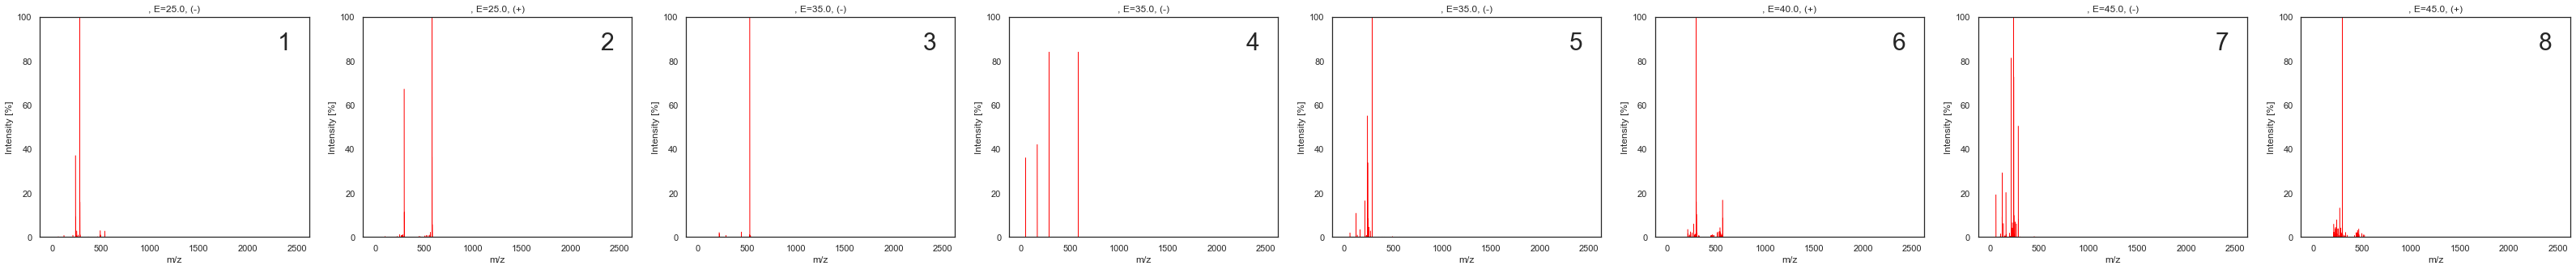

In [22]:
fig = vis_spectra(sel, label, config=model.config)
fig.savefig('../.img/spectra-single-compound.svg')

In [23]:
# Define transformation for vizualization:
revtrans = tv.transforms.Compose([
    dt.ToMZIntDeConcatAlt(max_num_peaks=model.config['max_num_peaks']),
    dt.Denormalize(intensity=model.config['normalize_intensity'], mass=model.config['normalize_mass'], max_mz=model.config['max_mz']),
    dt.ToDenseSpectrum(resolution=0.05, max_mz=model.config['max_mz'])
])

## Plot reconstruction

(<Figure size 5000x5000 with 25 Axes>,
 array([[<AxesSubplot:ylabel='Intensity [%]'>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:ylabel='Intensity [%]'>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>]], dtype=object))

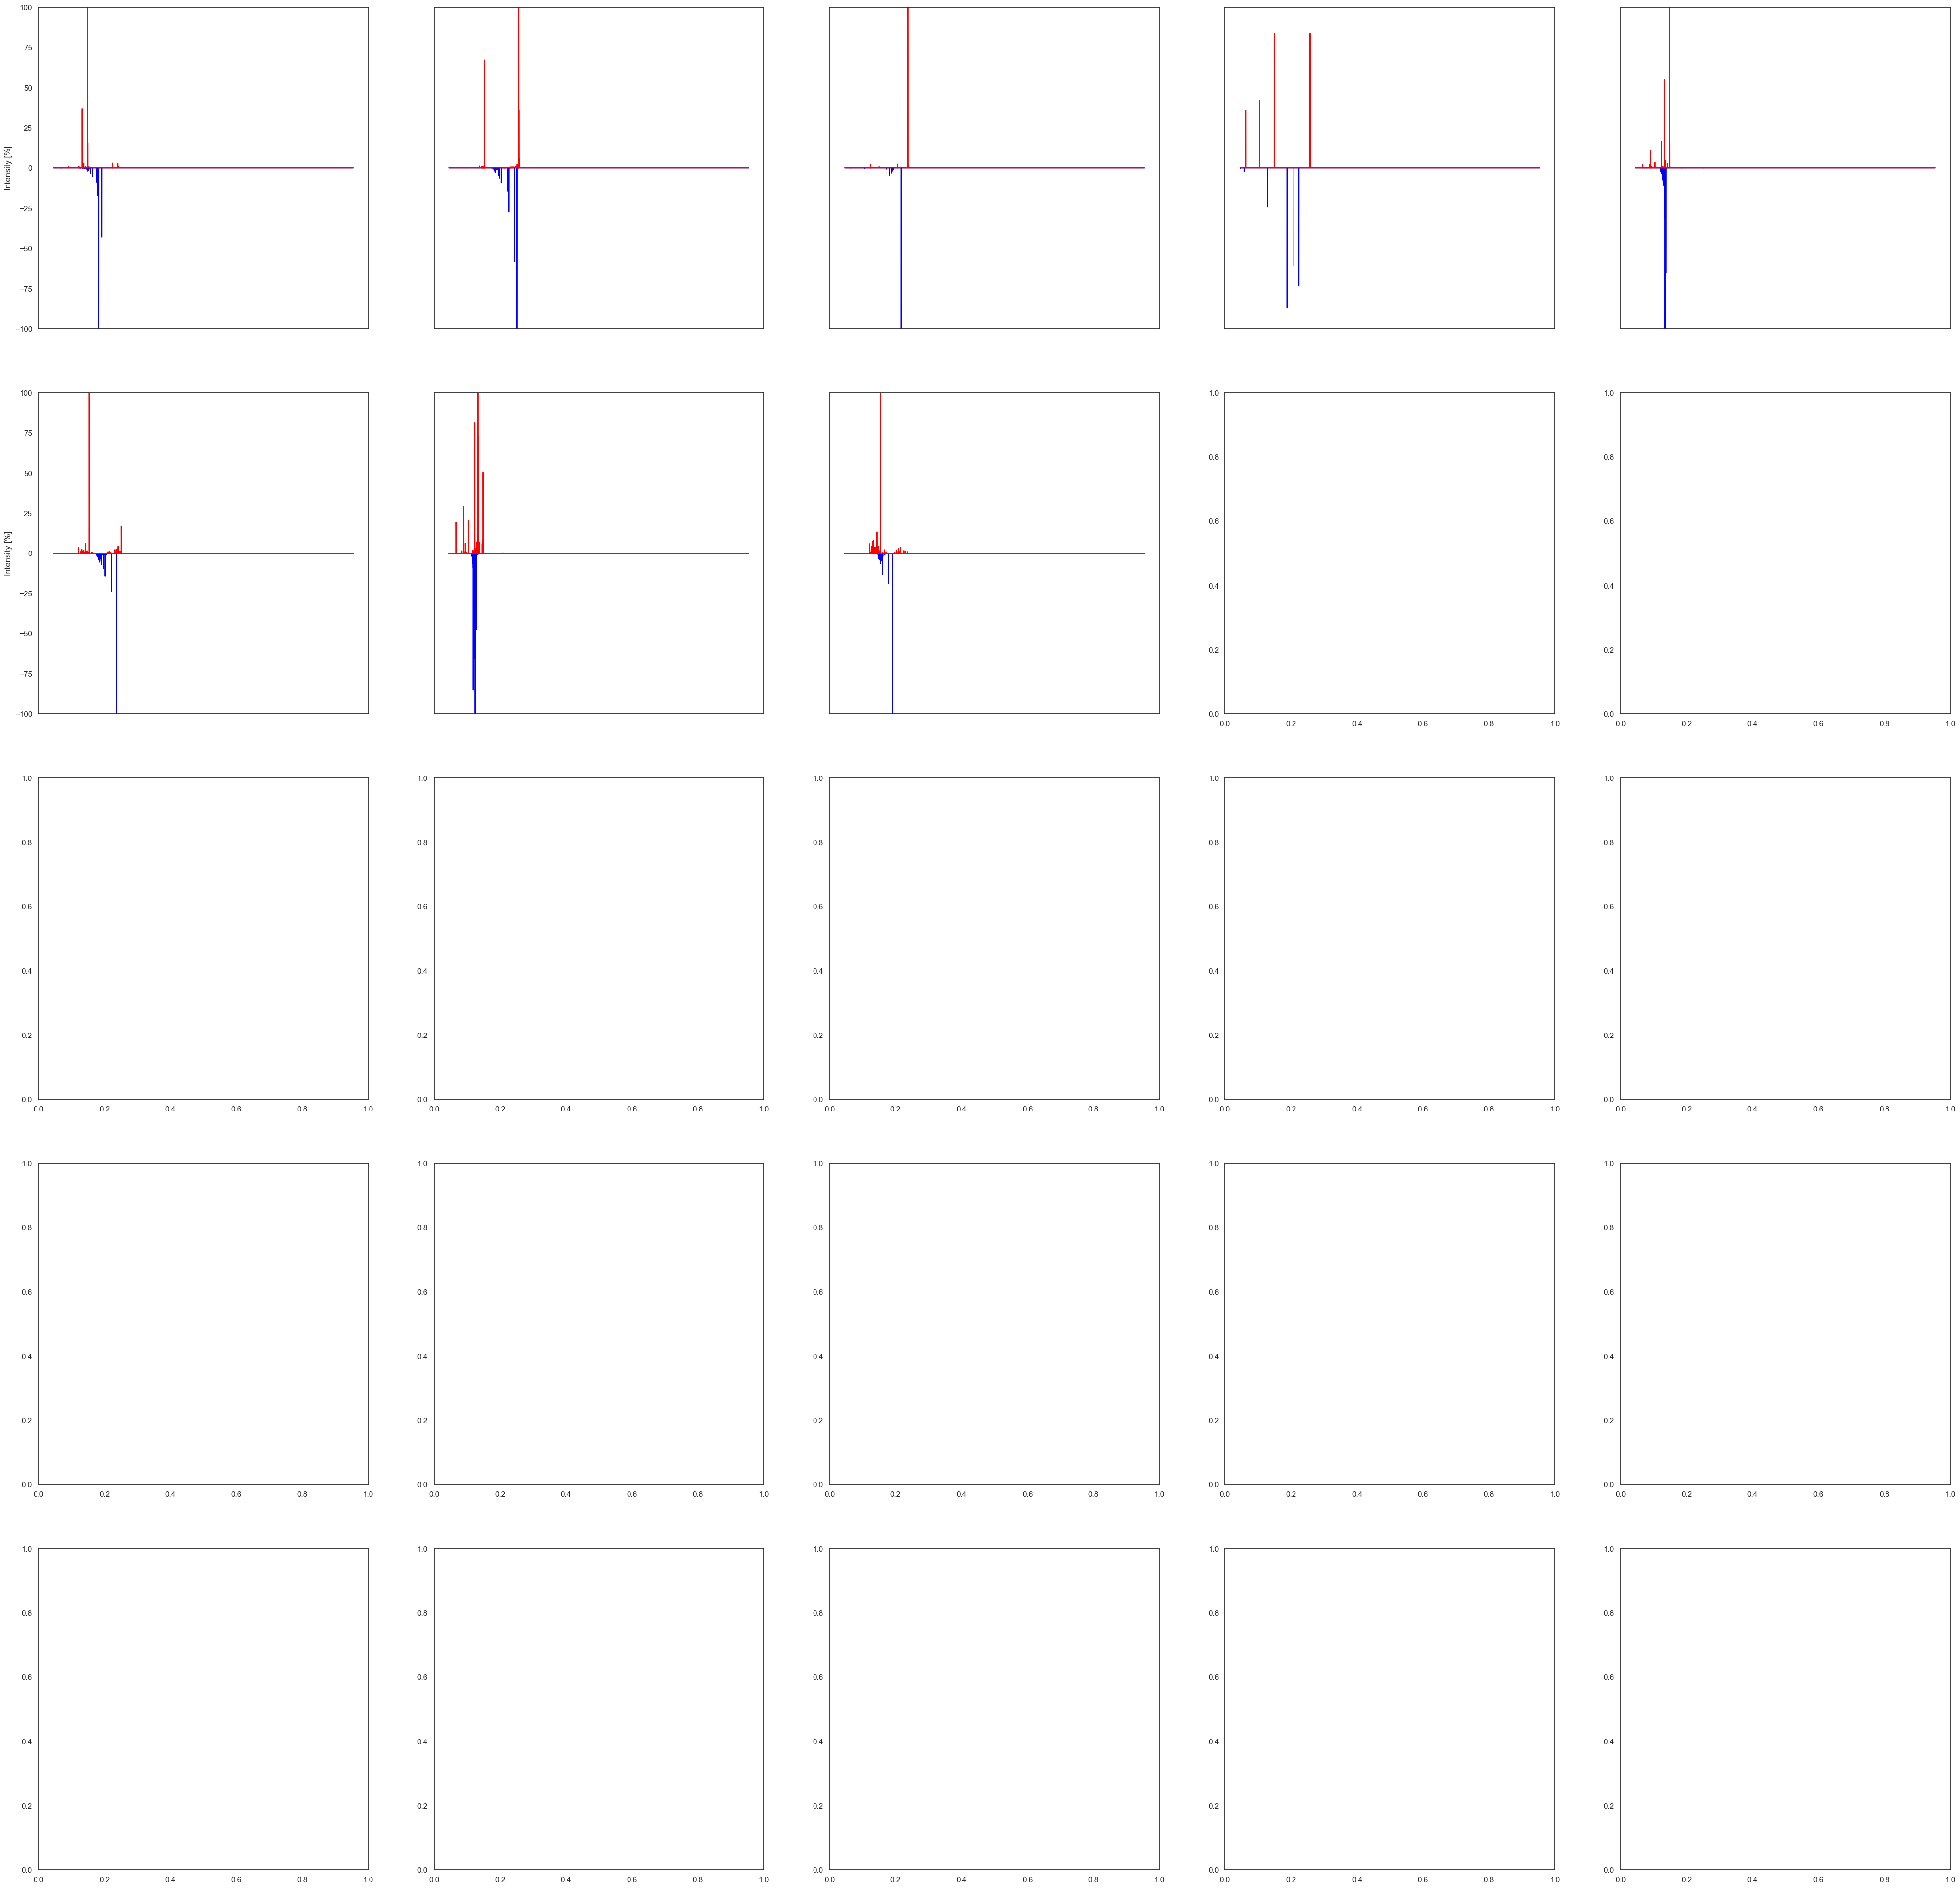

In [24]:
vis.plot_spectra_grid(
    model, [data_sel['spectrum']], transform=revtrans, 
    dpi=300, dirpath='../.img', name='spec-recon-%s.svg' % inchikey,
    grid=(5, 5), figsize=(50, 50))

## Interpolate between two compounds

In [25]:
def lerp(x, y, step):
    """Linear interpolation"""
    if not np.isscalar(step):
        return np.array([lerp(x, y, step_) for step_ in step])
    return (1. - step) * x + step * y

def slerp(x, y, step):
    """
    Spherical Linear Interpolation. 
    Read more: https://splines.readthedocs.io/en/latest/rotation/slerp.html
    """
    if not np.isscalar(step):
        return np.array([slerp(x, y, step_) for step_ in step])
    # return (y * x.inverse())**step * x
    cos_th = np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))
    th = np.arccos(cos_th)
    return (np.sin((1. - step) * th) / np.sin(th)) * x + (np.sin(step * th) / np.sin(th)) * y


In [26]:
# Select data points:
A, B = 1, 7
points = sel[sel['idvis'].isin([A, B])]
# Find latent representation:
dp = preload_data_as_tensor(model, points)
dp_np = evaluate_model(model, points, dp)
z = dp_np['z']
# How many points: between + 2 (actual points)
n = 5 + 2

Encode N=2 instances from MoNA dataset...
torch.Size([2, 3])


### Linear interpolation

In [27]:
# Before:
p = lerp(2*z[0] - z[1], z[0], np.linspace(0, 1, n))
lerp_spectrab = model.decode(torch.from_numpy(p))
# Between:
p = lerp(z[0], z[1], np.linspace(0, 1, n))
lerp_spectra = model.decode(torch.from_numpy(p))
print(z)
print(p)
# After:
p = lerp(z[1], 2 * z[1] - z[0], np.linspace(0, 1, n))
lerp_spectraa = model.decode(torch.from_numpy(p))

[[-1.0933391  -0.24544731 -0.37284335]
 [ 0.2375741  -0.8784046  -0.38846877]]
[[-1.0933391  -0.24544731 -0.37284335]
 [-0.8715202  -0.3509402  -0.3754476 ]
 [-0.64970136 -0.45643312 -0.37805185]
 [-0.4278825  -0.56192595 -0.38065606]
 [-0.20606363 -0.6674189  -0.3832603 ]
 [ 0.01575522 -0.77291167 -0.38586453]
 [ 0.2375741  -0.8784046  -0.38846877]]


Original datapoints: start and end datapoint respectively


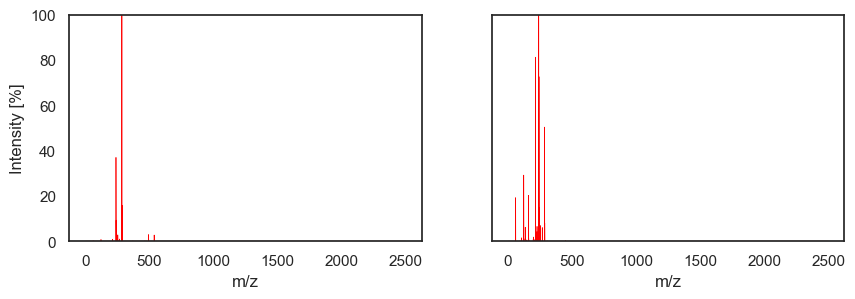

Before first selected datapoint


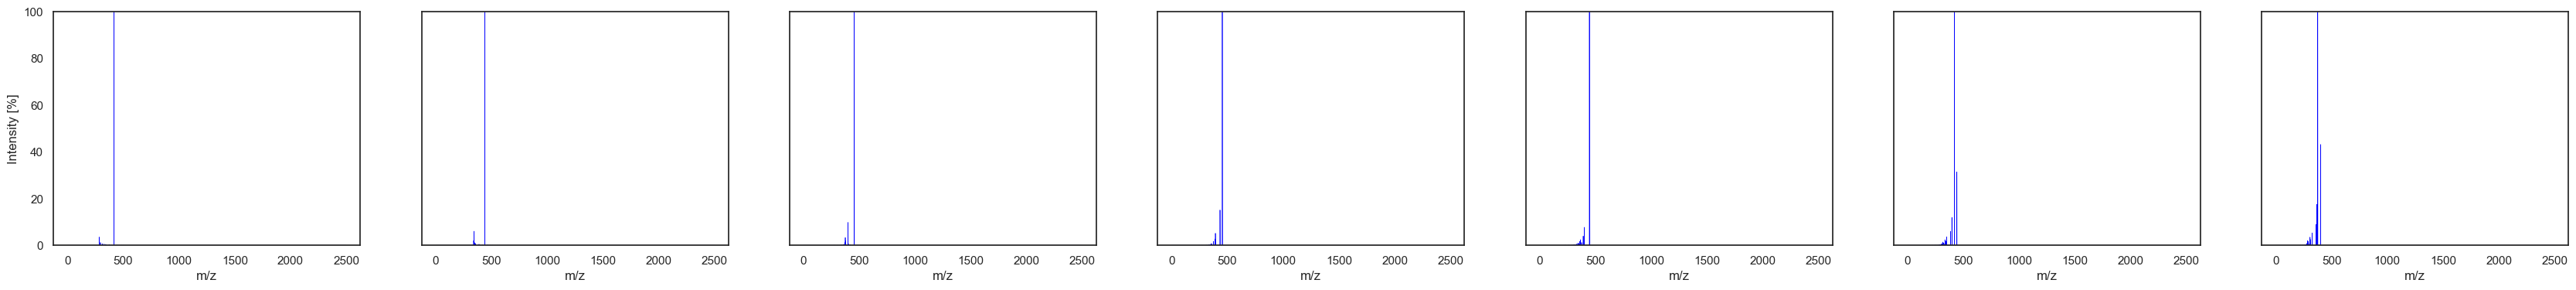

Between first and second selected datapoint


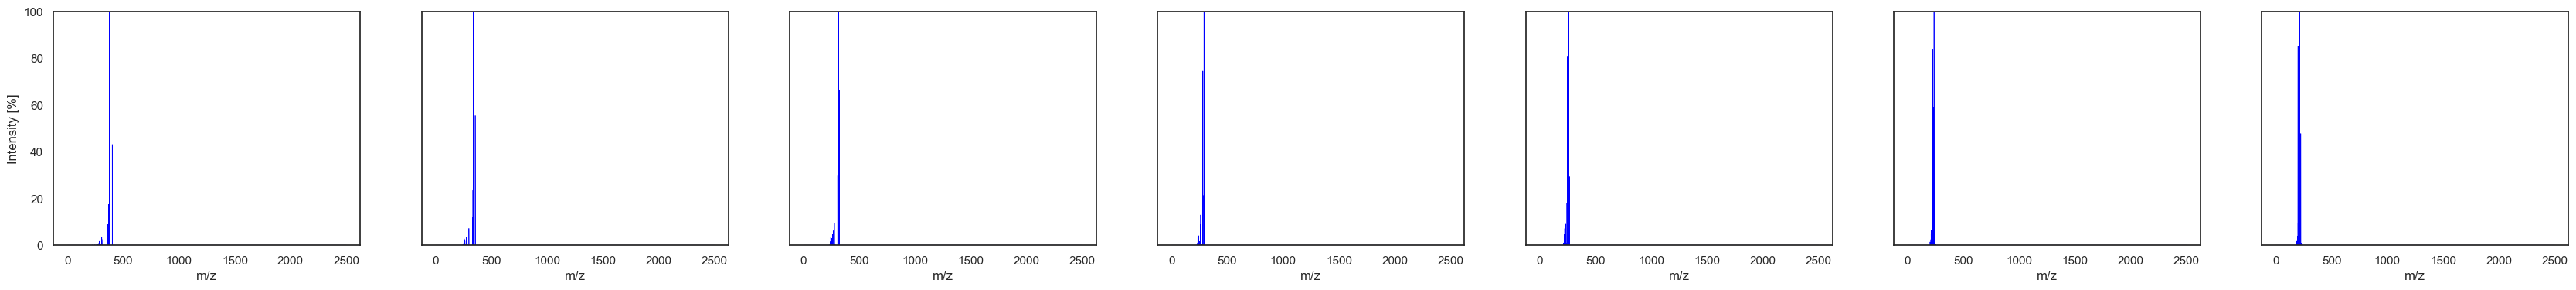

After second selected datapoint


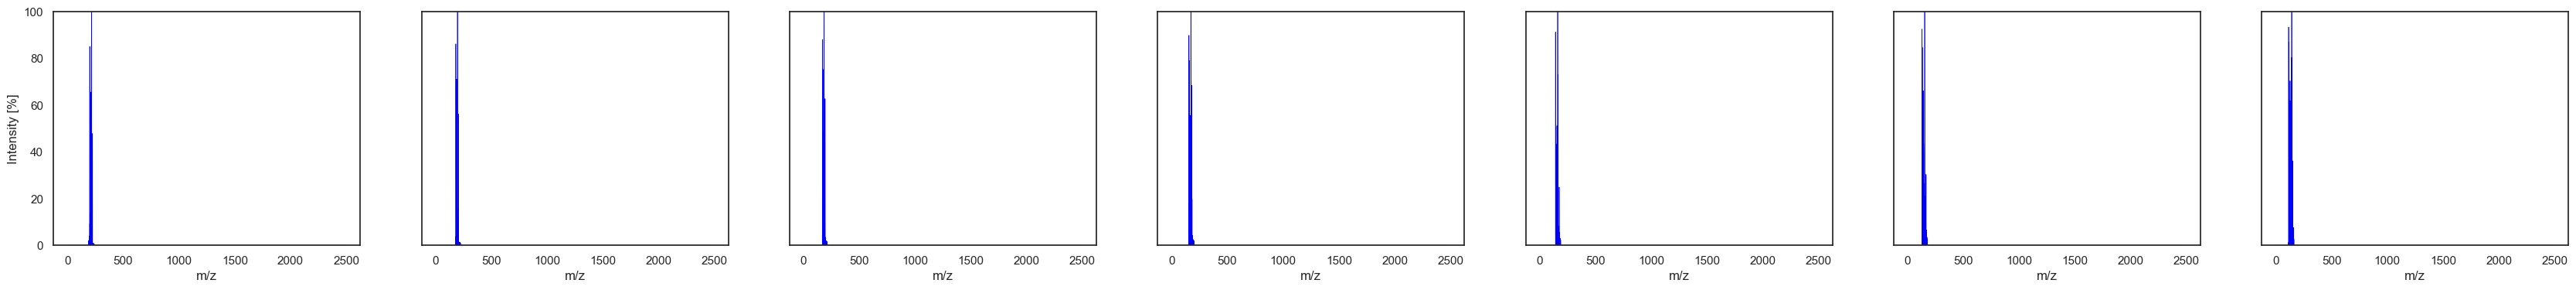

In [28]:
print('Original datapoints: start and end datapoint respectively')
vis.plot_spectra_(dp_np['X'], grid=(1, 2), figsize=(5*2, 3), resolution=0.05, max_mz=model.config['max_mz'], transform=revtrans, color='red')
print('Before first selected datapoint')
fig, _ = vis.plot_spectra_(lerp_spectrab, grid=(1, n), figsize=(6*(n), 4), resolution=0.05, max_mz=model.config['max_mz'], transform=revtrans)
fig.savefig('../.img/lerp-before-%s.svg' % inchikey)
print('Between first and second selected datapoint')
fig, _ = vis.plot_spectra_(lerp_spectra, grid=(1, n), figsize=(6*(n), 4), resolution=0.05, max_mz=model.config['max_mz'], transform=revtrans)
fig.savefig('../.img/lerp-between-%s.svg' % inchikey)
print('After second selected datapoint')
fig, _ = vis.plot_spectra_(lerp_spectraa, grid=(1, n), figsize=(6*(n), 4), resolution=0.05, max_mz=model.config['max_mz'], transform=revtrans)
fig.savefig('../.img/lerp-after-%s.svg' % inchikey)

### Spherical Linear Interpolation

In [29]:
# Before:
u = 1.0
p = slerp(z[0] - u * (z[1] - z[0]), z[0], np.linspace(0, 1, n))
slerp_spectrab = model.decode(torch.from_numpy(p))
# Between:
p = slerp(z[0], z[1], np.linspace(0, 1, n))
slerp_spectra = model.decode(torch.from_numpy(p))
print(z)
print(p)
# After:
p = slerp(z[1], z[1] + u * (z[1] - z[0]), np.linspace(0, 1, n))
slerp_spectraa = model.decode(torch.from_numpy(p))

[[-1.0933391  -0.24544731 -0.37284335]
 [ 0.2375741  -0.8784046  -0.38846877]]
[[-1.0933391  -0.24544731 -0.37284335]
 [-0.97848433 -0.44870025 -0.4490836 ]
 [-0.80403537 -0.62462527 -0.4979726 ]
 [-0.58061695 -0.76250774 -0.5165328 ]
 [-0.3218363  -0.8539501  -0.5036338 ]
 [-0.04345436 -0.8933829  -0.46006122]
 [ 0.2375741  -0.8784046  -0.38846877]]


Original datapoints: start and end datapoint respectively


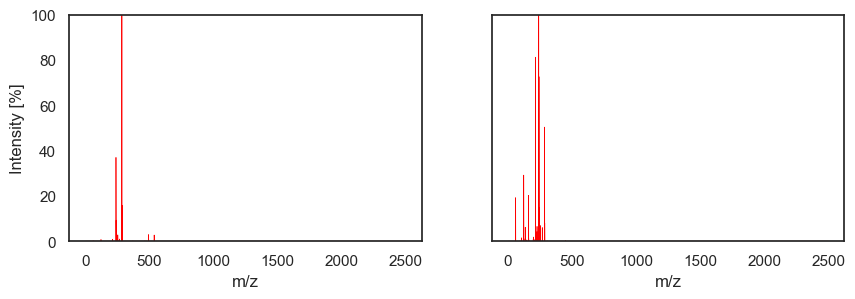

Before first selected datapoint


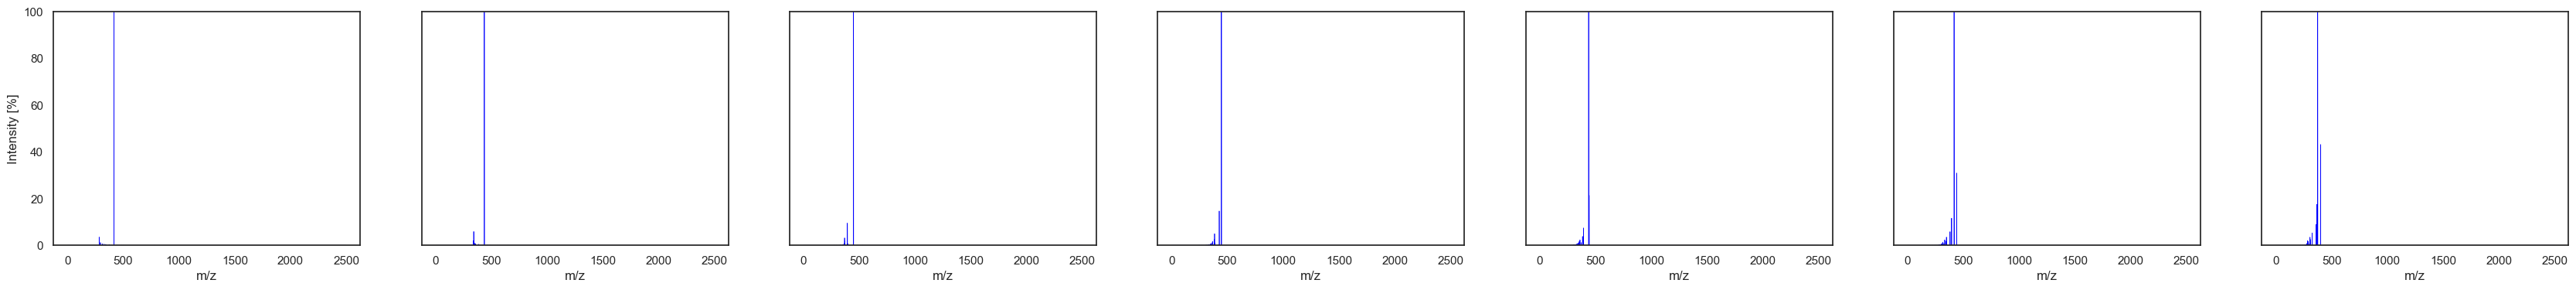

Between first and second selected datapoint


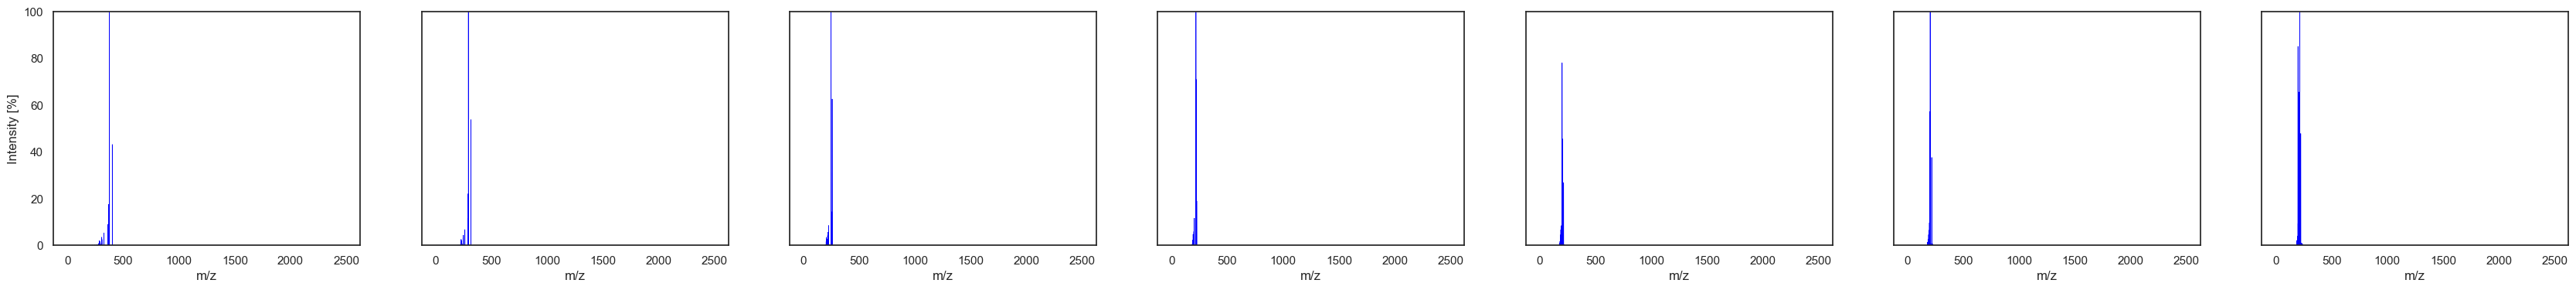

After second selected datapoint


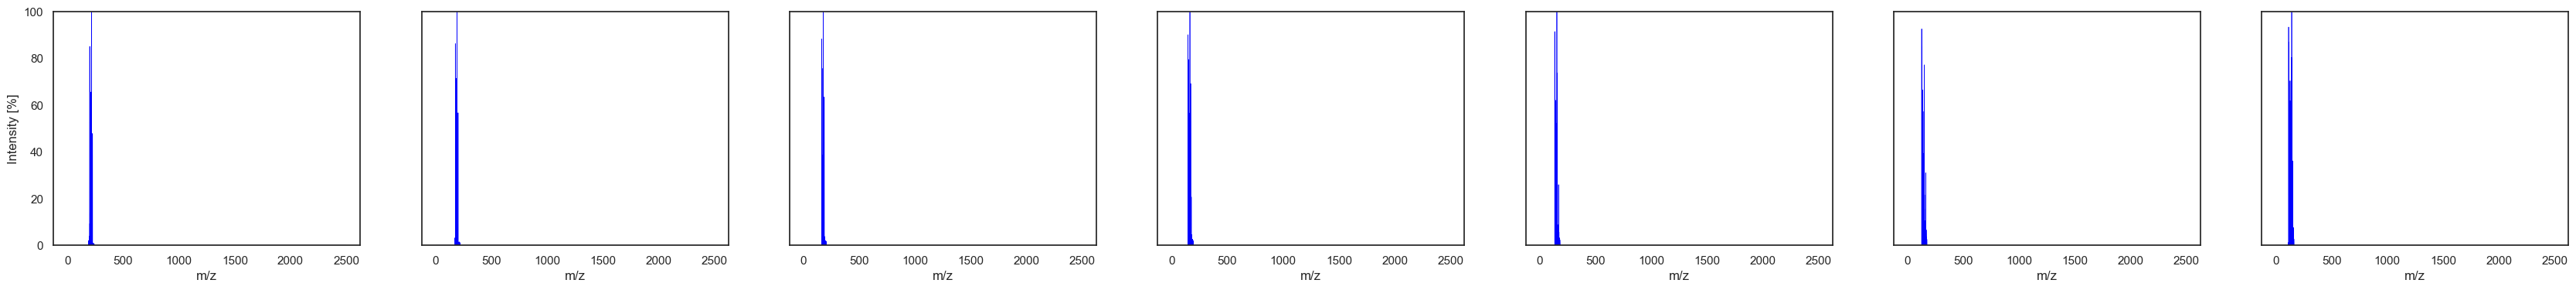

In [30]:
print('Original datapoints: start and end datapoint respectively')
vis.plot_spectra_(dp_np['X'], grid=(1, 2), figsize=(5*2, 3), resolution=0.05, max_mz=model.config['max_mz'], transform=revtrans, color='red')
print('Before first selected datapoint')
fig, _ = vis.plot_spectra_(slerp_spectrab, grid=(1, n), figsize=(6*(n), 4), resolution=0.05, max_mz=model.config['max_mz'], transform=revtrans)
fig.savefig('../.img/slerp-before-%s.svg' % inchikey)
print('Between first and second selected datapoint')
fig, _ = vis.plot_spectra_(slerp_spectra, grid=(1, n), figsize=(6*(n), 4), resolution=0.05, max_mz=model.config['max_mz'], transform=revtrans)
fig.savefig('../.img/slerp-between-%s.svg' % inchikey)
print('After second selected datapoint')
fig, _ = vis.plot_spectra_(slerp_spectraa, grid=(1, n), figsize=(6*(n), 4), resolution=0.05, max_mz=model.config['max_mz'], transform=revtrans)
fig.savefig('../.img/slerp-after-%s.svg' % inchikey)

### Comparison lerp vs. slerp

Original datapoints: start and end datapoint respectively


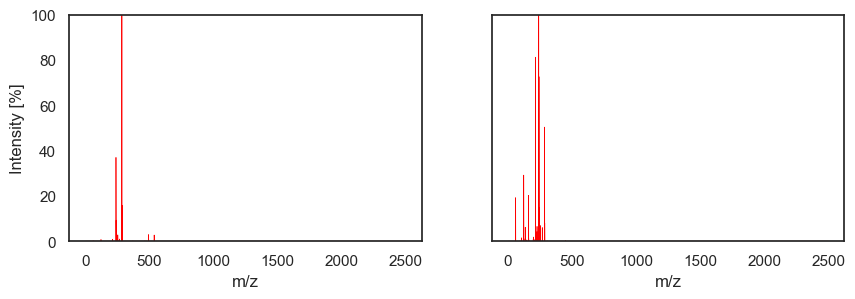

LERP: Between first and second selected datapoint


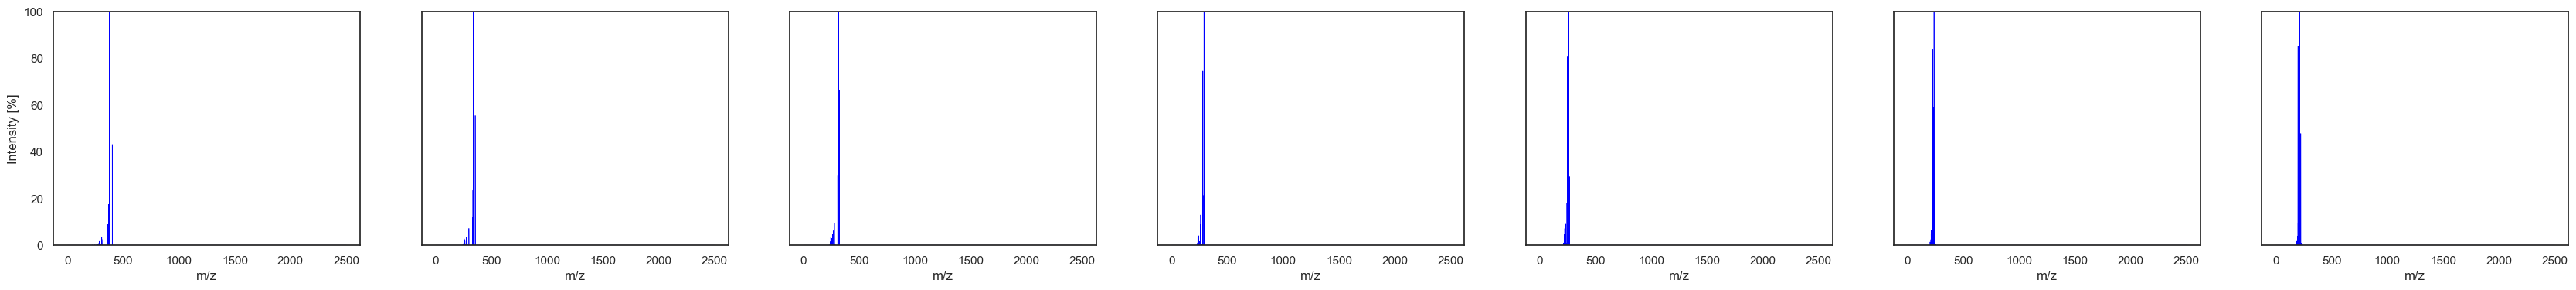

SLERP: Between first and second selected datapoint


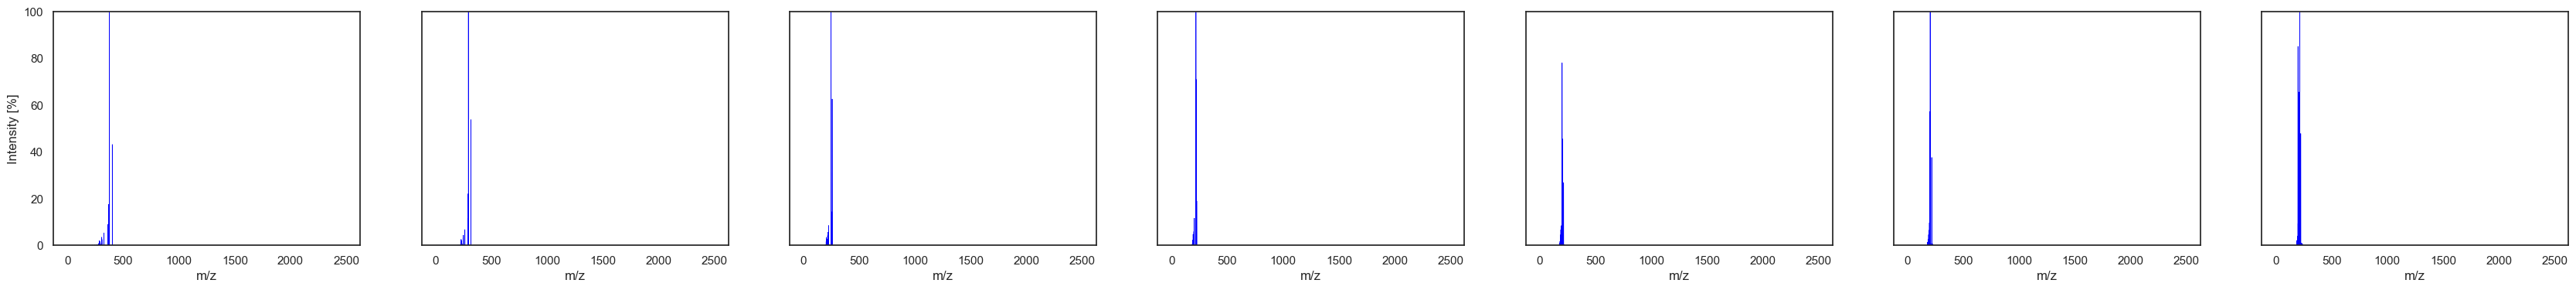

(<Figure size 4200x400 with 7 Axes>,
 array([<AxesSubplot:xlabel='m/z', ylabel='Intensity [%]'>,
        <AxesSubplot:xlabel='m/z'>, <AxesSubplot:xlabel='m/z'>,
        <AxesSubplot:xlabel='m/z'>, <AxesSubplot:xlabel='m/z'>,
        <AxesSubplot:xlabel='m/z'>, <AxesSubplot:xlabel='m/z'>],
       dtype=object))

In [31]:
print('Original datapoints: start and end datapoint respectively')
vis.plot_spectra_(dp_np['X'], grid=(1, 2), figsize=(5*2, 3), resolution=0.05, max_mz=model.config['max_mz'], transform=revtrans, color='red')
print('LERP: Between first and second selected datapoint')
vis.plot_spectra_(lerp_spectra, grid=(1, n), figsize=(6*(n), 4), resolution=0.05, max_mz=model.config['max_mz'], transform=revtrans)
print('SLERP: Between first and second selected datapoint')
vis.plot_spectra_(slerp_spectra, grid=(1, n), figsize=(6*(n), 4), resolution=0.05, max_mz=model.config['max_mz'], transform=revtrans)

## Find matching compounds in the dataset

In [32]:
# Transform entire dataset:
columns = ['spectrum', 'collision_energy', 'ionization_mode_id']
types = [torch.float32] * len(columns)
data = dt.Spectra.preload_tensor(
    device=device, data_frame=df_all[columns + ['id']], transform=model.transform, limit=-1, types=types, do_print=True)

Load and transform...
Progress: 5%
Progress: 10%
Progress: 15%
Progress: 20%
Progress: 25%
Progress: 30%
Progress: 35%
Progress: 40%
Progress: 45%
Progress: 50%
Progress: 55%
Progress: 60%
Progress: 65%
Progress: 70%
Progress: 75%
Progress: 80%
Progress: 85%
Progress: 90%
Progress: 95%
Convert data to pytorch tensors...


In [33]:
from specvae.metrics import cos_sim, eu_dist, per_diff
from IPython.display import display

def visualize_matching_spectra(df, spectra, n=5, data=None, prefix=''):
    # Transform entire dataset:
    df1 = df.copy()
    columns = ['spectrum', 'collision_energy', 'ionization_mode_id']
    if data is None:
        types = [torch.float32] * len(columns)
        data = dt.Spectra.preload_tensor(
            device=device, data_frame=df1[columns + ['id']], transform=model.transform, limit=-1, types=types, do_print=True)
    # Compare intermediate spectra against the entire dataset using metrics:
    cs = cos_sim(data['spectrum'], spectra, matrix=True)
    eu = eu_dist(data['spectrum'], spectra, matrix=True)
    pf = per_diff(data['spectrum'], spectra, matrix=True)
    # Construct new dataframe:
    df_cs = pd.DataFrame(cs.detach().numpy(), columns=['cos_sim_%d' % i for i in range(cs.shape[1])])
    df_eu = pd.DataFrame(eu.detach().numpy(), columns=['eu_dist_%d' % i for i in range(eu.shape[1])])
    df_pf = pd.DataFrame(pf.detach().numpy(), columns=['per_diff_%d' % i for i in range(pf.shape[1])])
    df_cs.index = df1.index
    df_eu.index = df1.index
    df_pf.index = df1.index
    df1 = pd.concat((df1, df_cs), axis=1)
    df1 = pd.concat((df1, df_eu), axis=1)
    df1 = pd.concat((df1, df_pf), axis=1)
    # Visualize best n matches per each intermediate spectrum:
    for i in range(cs.shape[1]):
        print('Match by scores')
        df_n_cs = df1.sort_values(by=['%s_%d' % ('cos_sim', i)], ascending=False ).head(n)[['id'] + columns + ['%s_%d' % ('cos_sim', i), '%s_%d' % ('eu_dist', i), '%s_%d' % ('per_diff', i)]]
        df_n_eu = df1.sort_values(by=['%s_%d' % ('eu_dist', i)], ascending=True).head(n)[['id'] + columns + ['%s_%d' % ('eu_dist', i), '%s_%d' % ('cos_sim', i), '%s_%d' % ('per_diff', i)]]
        df_n_pf = df1.sort_values(by=['%s_%d' % ('per_diff', i)], ascending=True).head(n)[['id'] + columns + ['%s_%d' % ('per_diff', i), '%s_%d' % ('cos_sim', i), '%s_%d' % ('eu_dist', i)]]
        display(df_n_cs)
        display(df_n_eu)
        display(df_n_pf)
        print('Intermediate spectrum')
        vis.plot_spectrum(spectra[i].detach().numpy(), 
            resolution=0.05, max_mz=model.config['max_mz'], config=model.config, transformed=True, figsize=(7, 5))
        plt.show()
        print('Matching spectra using cos_sim')
        fig, _ = vis.plot_spectra_(df_n_cs['spectrum'].to_numpy(), grid=(1, n), figsize=(5*(n), 3), 
            resolution=0.05, max_mz=model.config['max_mz'], transform=lambda x: revtrans(model.transform(x)), color='red')
        fig.savefig('../.img/match/%s-%d-cossim.svg' % (prefix, i))
        print('Matching spectra using eu_dist')
        fig, _ = vis.plot_spectra_(df_n_eu['spectrum'].to_numpy(), grid=(1, n), figsize=(5*(n), 3), 
            resolution=0.05, max_mz=model.config['max_mz'], transform=lambda x: revtrans(model.transform(x)), color='red')
        fig.savefig('../.img/match/%s-%d-eudist.svg' % (prefix, i))
        print('Matching spectra using per_diff')
        fig, _ = vis.plot_spectra_(df_n_pf['spectrum'].to_numpy(), grid=(1, n), figsize=(5*(n), 3), 
            resolution=0.05, max_mz=model.config['max_mz'], transform=lambda x: revtrans(model.transform(x)), color='red')
        fig.savefig('../.img/match/%s-%d-perdiff.svg' % (prefix, i))


### Matching spectra for LERP interpolants

Match by scores


,id,spectrum,collision_energy,ionization_mode_id,cos_sim_0,eu_dist_0,per_diff_0
5035,CRAONLIHLOSKGE-UHFFFAOYSA-N,78.653603:0.019167 79.573601:0.024167 81.338402:0.028333 84.620003:0.020000 84.747803:0.020833 85.063599:0.056667 85.585602:0.026667 86.105698:0.033333 87.043701:0.019167 87.829399:0.022500 88.127...,NaN,1,0.992099,0.125710,0.144988
77238,CCQDWIRWKWIUKK-UHFFFAOYSA-O,162.02893:0.209293 191.01778:0.345333 203.02405:0.209293 205.01312:0.418585 217.04713:0.994140 218.06746:0.376727 229.04849:0.177899 241.6367:0.188363 244.04567:0.188363 245.0394:0.502302 245.0529...,6.0,1,0.991868,0.127535,0.203555
96977,KNWODGJQLCISLC-UHFFFAOYSA-N,47.345360:0.191989 50.091663:0.173167 50.819775:0.165638 51.135262:0.195754 53.608273:0.150580 53.797894:0.161873 55.389088:0.161873 56.156086:0.135522 60.017750:0.146815 60.594280:0.150580 61.446...,NaN,1,0.991804,0.128029,0.489763
66609,ULSDMUVEXKOYBU-ZDUSSCGKSA-N,41.9956:0.538213 42.03108:0.538213 42.99835:0.538213 60.00703:0.538213 80.97254:0.538213 84.41834:0.538213 86.01971:0.538213 107.03611:0.645856 107.05208:0.645856 143.07135:0.538213 148.9028:0.538...,35.0,0,0.991440,0.130838,0.589486
37456,AXZCNBVMHHTPKA-UHFFFAOYSA-N,100.503540:0.001174 100.578613:0.000587 100.696320:0.001152 100.752342:0.001175 100.848709:0.001573 100.934814:0.001590 101.036354:0.001673 101.139526:0.000501 101.209213:0.001747 101.280006:0.001...,NaN,0,0.990833,0.135405,0.526360


,id,spectrum,collision_energy,ionization_mode_id,eu_dist_0,cos_sim_0,per_diff_0
5035,CRAONLIHLOSKGE-UHFFFAOYSA-N,78.653603:0.019167 79.573601:0.024167 81.338402:0.028333 84.620003:0.020000 84.747803:0.020833 85.063599:0.056667 85.585602:0.026667 86.105698:0.033333 87.043701:0.019167 87.829399:0.022500 88.127...,NaN,1,0.125710,0.992099,0.144988
77238,CCQDWIRWKWIUKK-UHFFFAOYSA-O,162.02893:0.209293 191.01778:0.345333 203.02405:0.209293 205.01312:0.418585 217.04713:0.994140 218.06746:0.376727 229.04849:0.177899 241.6367:0.188363 244.04567:0.188363 245.0394:0.502302 245.0529...,6.0,1,0.127535,0.991868,0.203555
96977,KNWODGJQLCISLC-UHFFFAOYSA-N,47.345360:0.191989 50.091663:0.173167 50.819775:0.165638 51.135262:0.195754 53.608273:0.150580 53.797894:0.161873 55.389088:0.161873 56.156086:0.135522 60.017750:0.146815 60.594280:0.150580 61.446...,NaN,1,0.128029,0.991804,0.489763
66609,ULSDMUVEXKOYBU-ZDUSSCGKSA-N,41.9956:0.538213 42.03108:0.538213 42.99835:0.538213 60.00703:0.538213 80.97254:0.538213 84.41834:0.538213 86.01971:0.538213 107.03611:0.645856 107.05208:0.645856 143.07135:0.538213 148.9028:0.538...,35.0,0,0.130838,0.991440,0.589486
37456,AXZCNBVMHHTPKA-UHFFFAOYSA-N,100.503540:0.001174 100.578613:0.000587 100.696320:0.001152 100.752342:0.001175 100.848709:0.001573 100.934814:0.001590 101.036354:0.001673 101.139526:0.000501 101.209213:0.001747 101.280006:0.001...,NaN,0,0.135405,0.990833,0.526360


,id,spectrum,collision_energy,ionization_mode_id,per_diff_0,cos_sim_0,eu_dist_0
82597,DDLIGBOFAVUZHB-UHFFFAOYSA-N,103.051796:0.007049 109.042778:0.005035 121.039970:0.012588 128.044205:0.006042 129.070709:0.006798 130.027496:0.006042 130.073135:0.007805 132.042130:0.005035 133.058716:0.004784 135.982147:0.006...,NaN,1,0.136943,0.984438,0.176419
96838,GLBJJMFZWDBELO-UHFFFAOYSA-N,45.030724:0.046693 45.796574:0.050379 46.534935:0.079869 47.027725:0.072497 47.328476:0.045464 47.424374:0.056523 47.495670:0.061438 47.755268:0.081098 47.975586:0.050379 48.593784:0.046693 49.061...,NaN,1,0.141488,0.983738,0.180341
5035,CRAONLIHLOSKGE-UHFFFAOYSA-N,78.653603:0.019167 79.573601:0.024167 81.338402:0.028333 84.620003:0.020000 84.747803:0.020833 85.063599:0.056667 85.585602:0.026667 86.105698:0.033333 87.043701:0.019167 87.829399:0.022500 88.127...,NaN,1,0.144988,0.992099,0.125710
86447,XHCJIWRCLSSDCD-UHFFFAOYSA-N,100.976837:0.010411 102.054207:0.010181 103.057419:0.019524 105.034988:0.017347 106.038361:0.013506 107.069611:0.089538 107.142059:0.006389 108.052643:0.017661 108.119339:0.005486 113.035255:0.014...,NaN,1,0.172773,0.982286,0.188221
10209,QZUNAFWZEXJWGD-UHFFFAOYSA-N,51.872799:0.064286 69.070099:0.235714 73.355400:0.071429 74.959099:0.067857 76.531898:0.092857 76.852303:0.089286 79.297699:0.085714 90.976601:0.110714 91.053902:0.082143 93.771797:0.067857 130.20...,NaN,1,0.174253,0.966888,0.257340


Intermediate spectrum


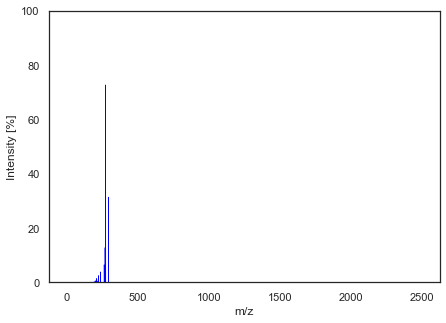

Matching spectra using cos_sim


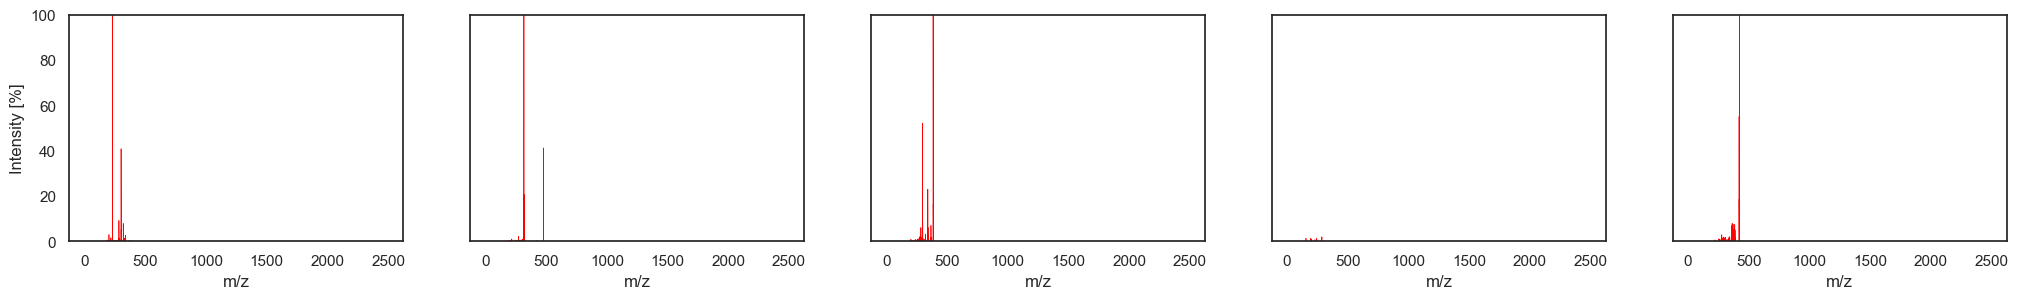

Matching spectra using eu_dist


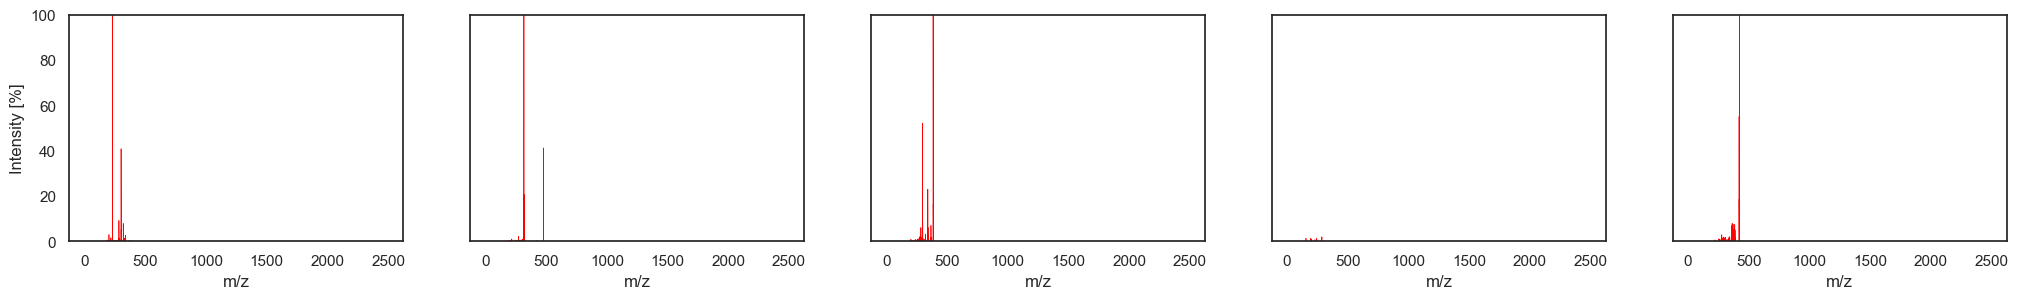

Matching spectra using per_diff


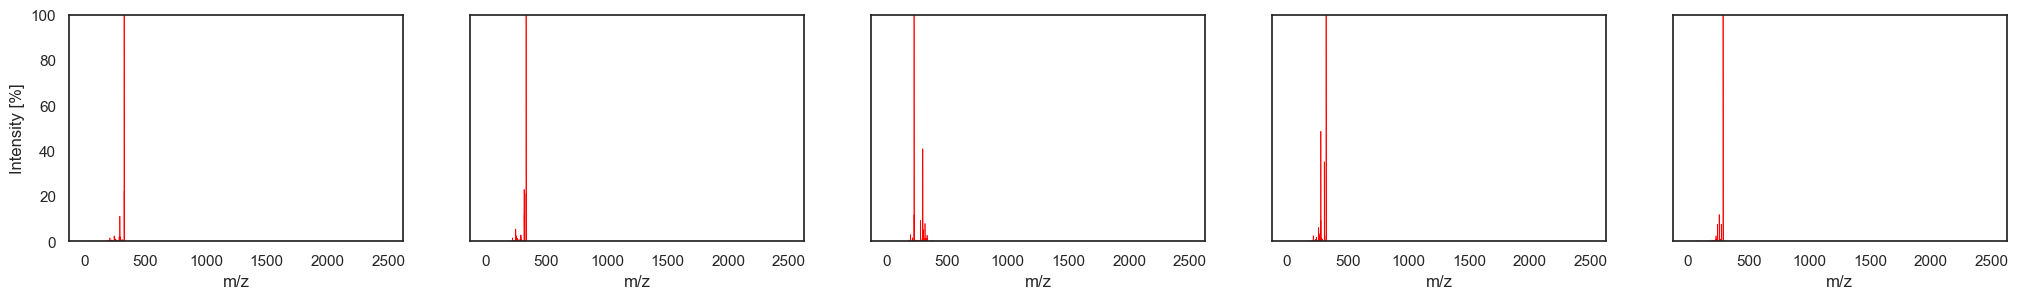

Match by scores


,id,spectrum,collision_energy,ionization_mode_id,cos_sim_1,eu_dist_1,per_diff_1
96977,KNWODGJQLCISLC-UHFFFAOYSA-N,47.345360:0.191989 50.091663:0.173167 50.819775:0.165638 51.135262:0.195754 53.608273:0.150580 53.797894:0.161873 55.389088:0.161873 56.156086:0.135522 60.017750:0.146815 60.594280:0.150580 61.446...,NaN,1,0.994021,0.109348,0.407497
9822,WJXSYUJKJSOJOG-UHFFFAOYSA-N,100.034676:0.023238 100.097824:0.007552 100.184822:0.003230 100.404335:0.002150 100.473343:0.002592 100.641449:0.003575 100.929512:0.002622 101.035049:0.043241 101.106941:0.004469 101.215324:0.003...,NaN,0,0.993894,0.110504,0.137510
66609,ULSDMUVEXKOYBU-ZDUSSCGKSA-N,41.9956:0.538213 42.03108:0.538213 42.99835:0.538213 60.00703:0.538213 80.97254:0.538213 84.41834:0.538213 86.01971:0.538213 107.03611:0.645856 107.05208:0.645856 143.07135:0.538213 148.9028:0.538...,35.0,0,0.991929,0.127047,0.503939
97059,MGCCHNLNRBULBU-WZTVWXICSA-N,46.541248:0.103966 47.548737:0.089113 49.959789:0.094064 51.622208:0.123769 52.109570:0.086638 52.763912:0.138621 53.260979:0.123769 54.058498:0.103966 54.131695:0.094064 54.613083:0.094064 55.021...,NaN,1,0.991503,0.130359,0.158817
42646,FEMTVABTBAWCEK-UHFFFAOYSA-N,50.058271:0.009384 50.073640:0.010955 50.326732:0.010063 50.393259:0.006105 50.608894:0.010342 51.211618:0.010973 51.733234:0.008858 51.800013:0.010087 52.509797:0.010556 52.923127:0.007026 52.941...,35.0,1,0.991369,0.131385,0.253274


,id,spectrum,collision_energy,ionization_mode_id,eu_dist_1,cos_sim_1,per_diff_1
96977,KNWODGJQLCISLC-UHFFFAOYSA-N,47.345360:0.191989 50.091663:0.173167 50.819775:0.165638 51.135262:0.195754 53.608273:0.150580 53.797894:0.161873 55.389088:0.161873 56.156086:0.135522 60.017750:0.146815 60.594280:0.150580 61.446...,NaN,1,0.109348,0.994021,0.407497
9822,WJXSYUJKJSOJOG-UHFFFAOYSA-N,100.034676:0.023238 100.097824:0.007552 100.184822:0.003230 100.404335:0.002150 100.473343:0.002592 100.641449:0.003575 100.929512:0.002622 101.035049:0.043241 101.106941:0.004469 101.215324:0.003...,NaN,0,0.110504,0.993894,0.137510
66609,ULSDMUVEXKOYBU-ZDUSSCGKSA-N,41.9956:0.538213 42.03108:0.538213 42.99835:0.538213 60.00703:0.538213 80.97254:0.538213 84.41834:0.538213 86.01971:0.538213 107.03611:0.645856 107.05208:0.645856 143.07135:0.538213 148.9028:0.538...,35.0,0,0.127047,0.991929,0.503939
97059,MGCCHNLNRBULBU-WZTVWXICSA-N,46.541248:0.103966 47.548737:0.089113 49.959789:0.094064 51.622208:0.123769 52.109570:0.086638 52.763912:0.138621 53.260979:0.123769 54.058498:0.103966 54.131695:0.094064 54.613083:0.094064 55.021...,NaN,1,0.130359,0.991503,0.158817
42646,FEMTVABTBAWCEK-UHFFFAOYSA-N,50.058271:0.009384 50.073640:0.010955 50.326732:0.010063 50.393259:0.006105 50.608894:0.010342 51.211618:0.010973 51.733234:0.008858 51.800013:0.010087 52.509797:0.010556 52.923127:0.007026 52.941...,35.0,1,0.131385,0.991369,0.253274


,id,spectrum,collision_energy,ionization_mode_id,per_diff_1,cos_sim_1,eu_dist_1
9822,WJXSYUJKJSOJOG-UHFFFAOYSA-N,100.034676:0.023238 100.097824:0.007552 100.184822:0.003230 100.404335:0.002150 100.473343:0.002592 100.641449:0.003575 100.929512:0.002622 101.035049:0.043241 101.106941:0.004469 101.215324:0.003...,NaN,0,0.137510,0.993894,0.110504
5035,CRAONLIHLOSKGE-UHFFFAOYSA-N,78.653603:0.019167 79.573601:0.024167 81.338402:0.028333 84.620003:0.020000 84.747803:0.020833 85.063599:0.056667 85.585602:0.026667 86.105698:0.033333 87.043701:0.019167 87.829399:0.022500 88.127...,NaN,1,0.146578,0.985314,0.171383
5519,XYPWCJWXFYYGPA-UHFFFAOYSA-N,73.129303:0.021212 74.120201:0.023232 74.712402:0.032323 81.258499:0.024242 81.400101:0.036364 83.355301:0.023232 83.586197:0.026263 83.940300:0.040404 86.073097:0.020202 92.162399:0.028283 99.376...,NaN,1,0.157500,0.947834,0.323005
97059,MGCCHNLNRBULBU-WZTVWXICSA-N,46.541248:0.103966 47.548737:0.089113 49.959789:0.094064 51.622208:0.123769 52.109570:0.086638 52.763912:0.138621 53.260979:0.123769 54.058498:0.103966 54.131695:0.094064 54.613083:0.094064 55.021...,NaN,1,0.158817,0.991503,0.130359
94742,GOEJQGGEIVSVOK-UHFFFAOYSA-N,113.02505:0.063062 118.07685:0.067913 121.65467:0.099445 123.57233:0.060637 137.97316:0.055786 161.04356:0.058211 194.07591:0.043659 200.0816:0.041233 204.80115:0.041233 210.41347:0.067913 214.821...,6.0,1,0.158913,0.968013,0.252931


Intermediate spectrum


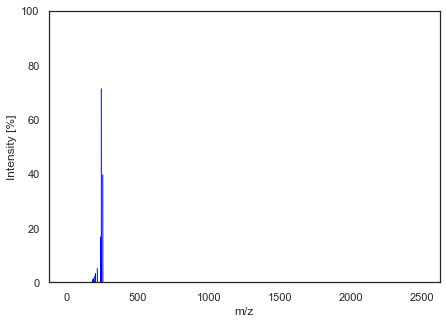

Matching spectra using cos_sim


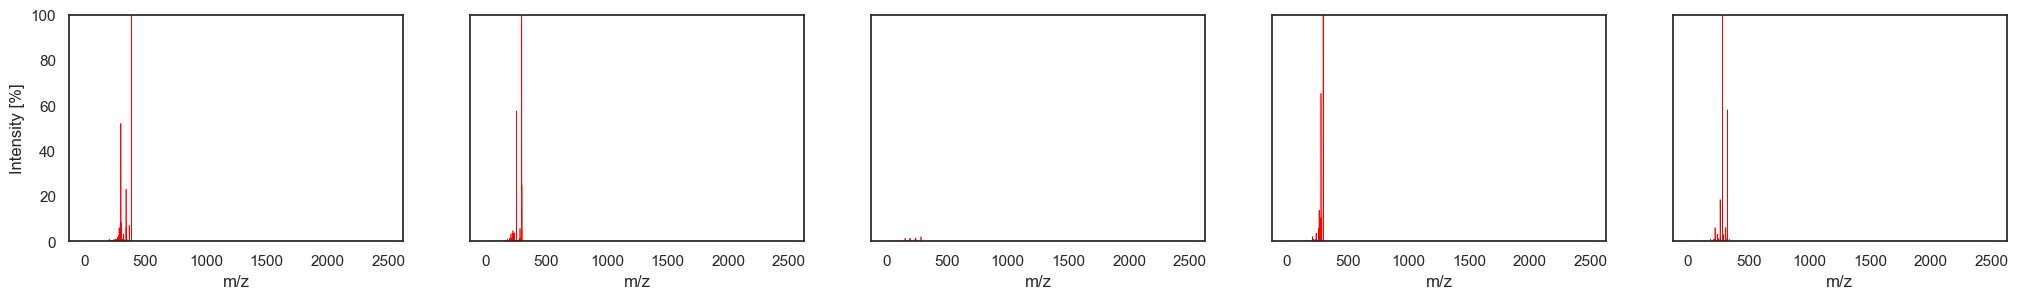

Matching spectra using eu_dist


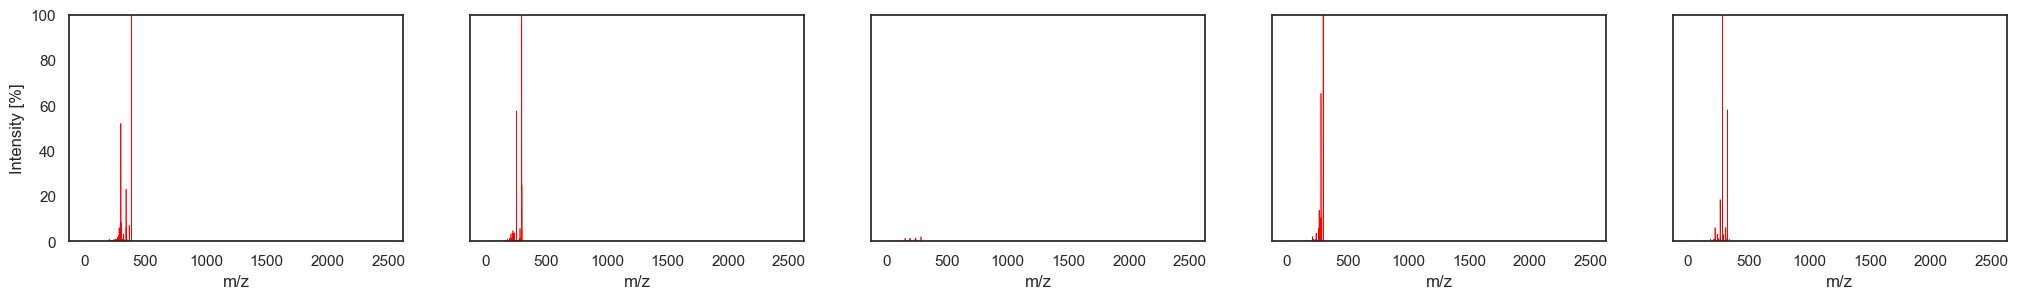

Matching spectra using per_diff


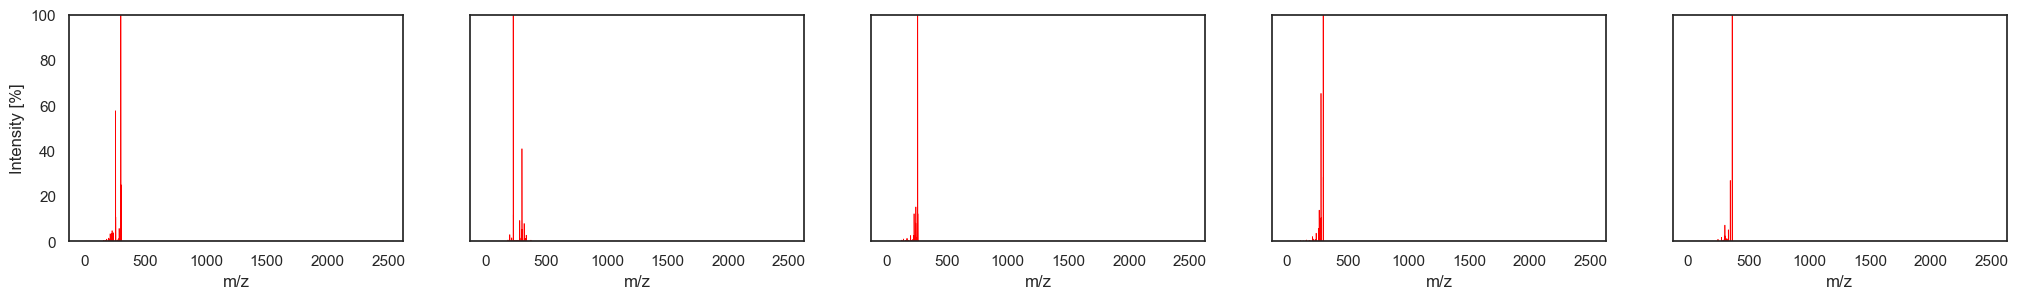

Match by scores


,id,spectrum,collision_energy,ionization_mode_id,cos_sim_2,eu_dist_2,per_diff_2
97059,MGCCHNLNRBULBU-WZTVWXICSA-N,46.541248:0.103966 47.548737:0.089113 49.959789:0.094064 51.622208:0.123769 52.109570:0.086638 52.763912:0.138621 53.260979:0.123769 54.058498:0.103966 54.131695:0.094064 54.613083:0.094064 55.021...,NaN,1,0.995654,0.093235,0.162961
9822,WJXSYUJKJSOJOG-UHFFFAOYSA-N,100.034676:0.023238 100.097824:0.007552 100.184822:0.003230 100.404335:0.002150 100.473343:0.002592 100.641449:0.003575 100.929512:0.002622 101.035049:0.043241 101.106941:0.004469 101.215324:0.003...,NaN,0,0.993985,0.109683,0.171984
33726,RGPDIGOSVORSAK-STHHAXOLSA-N,45.999207:0.088603 47.081367:0.103730 47.433002:0.101569 48.176109:0.121018 49.480640:0.092925 49.546463:0.108052 50.580116:0.105891 51.691677:0.099408 51.969662:0.077797 52.120426:0.095086 53.293...,NaN,1,0.993215,0.116492,0.354426
16025,XEDMLQPKKYHCKK-UHFFFAOYSA-N,100.020981:0.001872 100.155670:0.003729 100.273308:0.000562 100.397285:0.001322 100.554802:0.001582 100.723541:0.001569 100.786987:0.000545 100.854729:0.001588 101.053360:0.001505 101.221756:0.000...,NaN,0,0.991913,0.127179,0.445375
6160,UYUDMGMNHAKPEV-CXEJCQMISA-N,100.023582:0.001949 100.145126:0.001084 100.227478:0.002562 100.499596:0.003148 100.774902:0.001773 100.866234:0.002312 100.984200:0.002734 101.069763:0.002390 101.154953:0.001652 101.287735:0.001...,NaN,0,0.991722,0.128666,0.505032


,id,spectrum,collision_energy,ionization_mode_id,eu_dist_2,cos_sim_2,per_diff_2
97059,MGCCHNLNRBULBU-WZTVWXICSA-N,46.541248:0.103966 47.548737:0.089113 49.959789:0.094064 51.622208:0.123769 52.109570:0.086638 52.763912:0.138621 53.260979:0.123769 54.058498:0.103966 54.131695:0.094064 54.613083:0.094064 55.021...,NaN,1,0.093235,0.995654,0.162961
9822,WJXSYUJKJSOJOG-UHFFFAOYSA-N,100.034676:0.023238 100.097824:0.007552 100.184822:0.003230 100.404335:0.002150 100.473343:0.002592 100.641449:0.003575 100.929512:0.002622 101.035049:0.043241 101.106941:0.004469 101.215324:0.003...,NaN,0,0.109683,0.993985,0.171984
33726,RGPDIGOSVORSAK-STHHAXOLSA-N,45.999207:0.088603 47.081367:0.103730 47.433002:0.101569 48.176109:0.121018 49.480640:0.092925 49.546463:0.108052 50.580116:0.105891 51.691677:0.099408 51.969662:0.077797 52.120426:0.095086 53.293...,NaN,1,0.116492,0.993215,0.354426
16025,XEDMLQPKKYHCKK-UHFFFAOYSA-N,100.020981:0.001872 100.155670:0.003729 100.273308:0.000562 100.397285:0.001322 100.554802:0.001582 100.723541:0.001569 100.786987:0.000545 100.854729:0.001588 101.053360:0.001505 101.221756:0.000...,NaN,0,0.127179,0.991913,0.445375
6160,UYUDMGMNHAKPEV-CXEJCQMISA-N,100.023582:0.001949 100.145126:0.001084 100.227478:0.002562 100.499596:0.003148 100.774902:0.001773 100.866234:0.002312 100.984200:0.002734 101.069763:0.002390 101.154953:0.001652 101.287735:0.001...,NaN,0,0.128666,0.991722,0.505032


,id,spectrum,collision_energy,ionization_mode_id,per_diff_2,cos_sim_2,eu_dist_2
96840,OGQICQVSFDPSEI-UHFFFAOYSA-N,44.981197:0.067443 45.351711:0.056202 45.507324:0.057808 45.770859:0.062625 45.812611:0.059414 45.889431:0.062625 45.902912:0.062625 46.258244:0.069049 46.398643:0.057808 46.561962:0.080289 46.699...,NaN,1,0.123405,0.984996,0.173229
69029,MYSWGUAQZAJSOK-UHFFFAOYSA-N,70.0653:0.888684 135.0486:0.268816 136.0556:0.239463 163.0668:0.363635 176.0738:0.268771 189.0465:0.283038 189.0829:0.399530 191.0618:1.654163 192.0691:0.237891 198.066:0.430965 199.0749:0.160560 ...,45.0,1,0.136464,0.980632,0.196814
101844,ZFLRVRLYWHNAEC-AWEZNQCLSA-N,58.064487:0.917809 60.079800:0.141063 121.065651:0.162614 150.070160:0.128396 165.067749:0.106126 178.086517:0.572262 181.062973:0.169698 191.088058:0.162337 192.101730:0.101502 194.081375:0.61966...,NaN,1,0.140003,0.978493,0.207400
24436,VEZXFTKZUMARDU-UHFFFAOYSA-N,71.739166:0.036886 75.965607:0.044512 76.339912:0.029261 78.208725:0.047172 78.958282:0.035645 79.054977:0.076965 80.142021:0.027133 81.068680:0.029083 82.368332:0.028729 83.009323:0.068452 84.318...,NaN,1,0.148078,0.952235,0.309078
69035,MYSWGUAQZAJSOK-UHFFFAOYSA-N,70.0652:0.755328 135.0481:0.221035 136.0557:0.235065 151.0663:0.110759 163.067:0.264232 176.0745:0.173667 178.0545:0.148947 189.0458:0.260686 189.0826:0.297128 190.053:0.110263 191.0617:1.387362 1...,45.0,1,0.151040,0.976812,0.215352


Intermediate spectrum


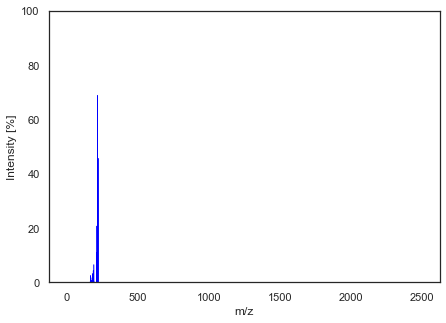

Matching spectra using cos_sim


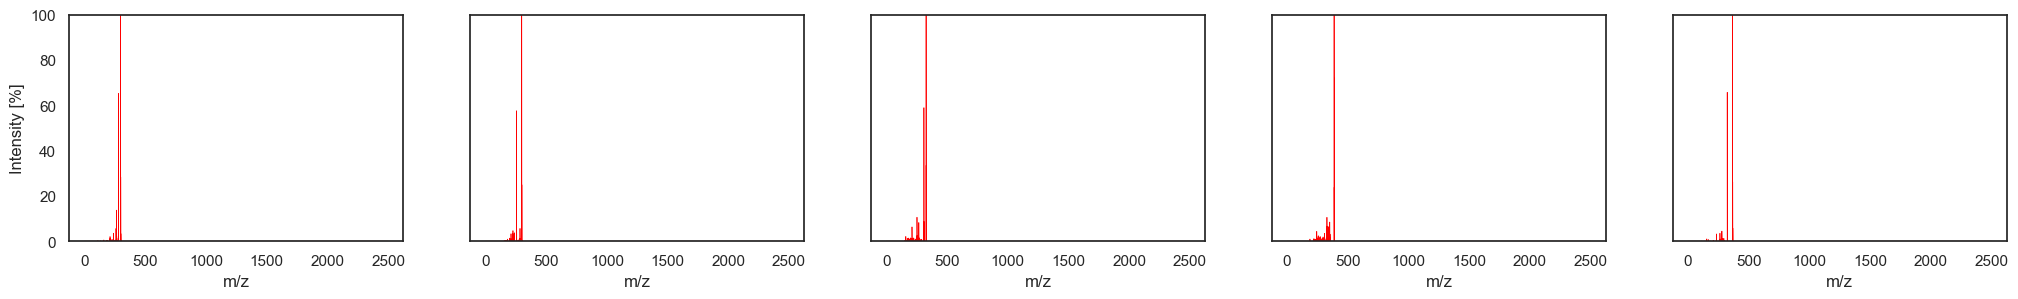

Matching spectra using eu_dist


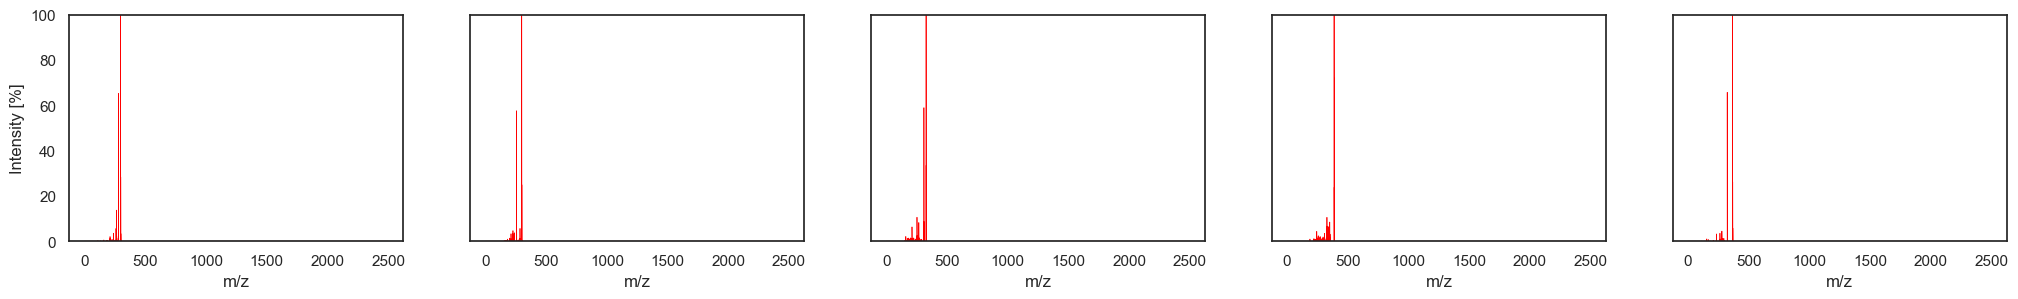

Matching spectra using per_diff


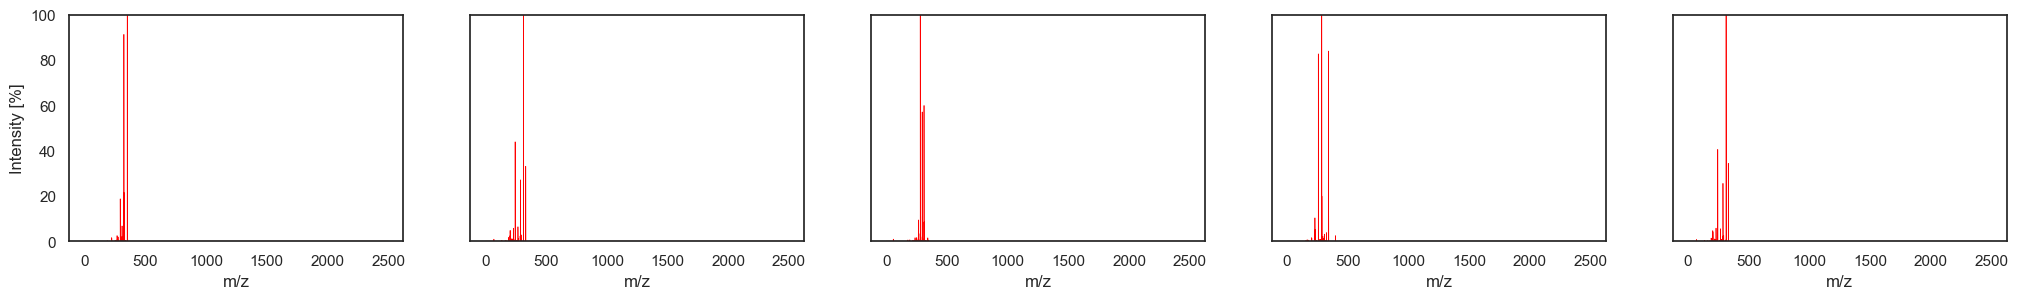

Match by scores


,id,spectrum,collision_energy,ionization_mode_id,cos_sim_3,eu_dist_3,per_diff_3
104445,JYXSWDCPHRTYGU-UHFFFAOYSA-N,107.01125:2.000000 109.02681:0.600000 117.03019:0.600000 120.5264:0.500000 143.05434:0.700000 144.04608:0.700000 146.06834:0.900000 151.00227:2.900000 159.05286:0.500000 163.00079:0.600000 164.009...,50.0,0,0.994435,0.105498,0.378967
94820,JCTYWRARKVGOBK-UHFFFAOYSA-N,103.46791:0.132173 109.38998:0.115652 121.67151:0.093623 141.06821:0.115652 151.05396:0.132173 152.06322:0.121159 153.0687:0.093623 162.12341:0.115652 162.50659:0.115652 165.04793:0.148695 165.056...,6.0,1,0.993654,0.112653,0.239449
104437,JYXSWDCPHRTYGU-UHFFFAOYSA-N,117.03413:0.600000 151.00717:0.900000 153.0152:0.800000 154.03343:0.800000 155.04439:0.600000 155.06146:0.600000 159.03848:1.000000 160.04893:0.900000 161.9959:0.800000 165.01804:2.000000 167.0447...,50.0,0,0.993580,0.113315,0.333852
65128,UIAGMCDKSXEBJQ-UHFFFAOYSA-N,42.03074:0.035323 43.05501:0.035323 59.04485:0.017661 59.04808:0.087886 61.61503:0.035323 63.92317:0.015138 67.01843:0.151804 102.03843:0.017661 102.04552:0.052984 104.03848:0.035323 115.0498:0.21...,35.0,1,0.993198,0.116637,0.179371
104441,JYXSWDCPHRTYGU-UHFFFAOYSA-N,137.02049:0.600000 143.04468:0.700000 143.05693:0.500000 151.00026:1.000000 151.99998:0.500000 154.04523:0.900000 155.05281:0.600000 161.99374:1.500000 163.00551:0.800000 165.01729:1.000000 167.05...,50.0,0,0.993135,0.117171,0.353398


,id,spectrum,collision_energy,ionization_mode_id,eu_dist_3,cos_sim_3,per_diff_3
104445,JYXSWDCPHRTYGU-UHFFFAOYSA-N,107.01125:2.000000 109.02681:0.600000 117.03019:0.600000 120.5264:0.500000 143.05434:0.700000 144.04608:0.700000 146.06834:0.900000 151.00227:2.900000 159.05286:0.500000 163.00079:0.600000 164.009...,50.0,0,0.105498,0.994435,0.378967
94820,JCTYWRARKVGOBK-UHFFFAOYSA-N,103.46791:0.132173 109.38998:0.115652 121.67151:0.093623 141.06821:0.115652 151.05396:0.132173 152.06322:0.121159 153.0687:0.093623 162.12341:0.115652 162.50659:0.115652 165.04793:0.148695 165.056...,6.0,1,0.112653,0.993654,0.239449
104437,JYXSWDCPHRTYGU-UHFFFAOYSA-N,117.03413:0.600000 151.00717:0.900000 153.0152:0.800000 154.03343:0.800000 155.04439:0.600000 155.06146:0.600000 159.03848:1.000000 160.04893:0.900000 161.9959:0.800000 165.01804:2.000000 167.0447...,50.0,0,0.113315,0.993580,0.333852
65128,UIAGMCDKSXEBJQ-UHFFFAOYSA-N,42.03074:0.035323 43.05501:0.035323 59.04485:0.017661 59.04808:0.087886 61.61503:0.035323 63.92317:0.015138 67.01843:0.151804 102.03843:0.017661 102.04552:0.052984 104.03848:0.035323 115.0498:0.21...,35.0,1,0.116637,0.993198,0.179371
104441,JYXSWDCPHRTYGU-UHFFFAOYSA-N,137.02049:0.600000 143.04468:0.700000 143.05693:0.500000 151.00026:1.000000 151.99998:0.500000 154.04523:0.900000 155.05281:0.600000 161.99374:1.500000 163.00551:0.800000 165.01729:1.000000 167.05...,50.0,0,0.117171,0.993135,0.353398


,id,spectrum,collision_energy,ionization_mode_id,per_diff_3,cos_sim_3,eu_dist_3
58340,JAUOIFJMECXRGI-UHFFFAOYSA-N,44.04594:0.057742 80.04834:0.086613 82.06483:0.162228 93.05891:0.115485 115.05423:0.028871 117.05439:0.057742 128.08449:0.057742 131.06697:0.057742 144.07535:0.057742 151.05597:0.057742 163.02866:...,35.0,1,0.100914,0.978453,0.207590
86973,GVVXPMORGFYVOO-UHFFFAOYSA-N,251.1063:3.030752974813362 253.0868:3.922161064648236 265.083:22.60340195719584 266.0929:5.968791220933847 266.8436:0.15366128219117536 267.0977:3.3541322799190603 268.105:1.2619216983542705 269.1...,NaN,0,0.151406,0.974121,0.227504
101880,VUUONEBXXLQCQX-UHFFFAOYSA-N,60.253014:0.217204 108.054482:0.215247 119.051292:0.226988 124.014984:0.260254 132.056580:0.360050 135.043762:3.297198 136.046524:0.426581 151.002579:0.551816 156.056458:0.268081 160.051834:1.7395...,NaN,1,0.163193,0.992309,0.124026
65463,XAGMUUZPGZWTRP-ZETCQYMHSA-N,53.61368:0.026323 58.06556:0.122842 79.05215:0.061421 91.99669:0.026323 105.01138:0.026323 107.0257:0.153553 110.05802:0.122842 113.03421:0.092132 115.05595:0.061421 121.0387:0.092132 125.02982:0....,35.0,1,0.163904,0.972386,0.235005
24436,VEZXFTKZUMARDU-UHFFFAOYSA-N,71.739166:0.036886 75.965607:0.044512 76.339912:0.029261 78.208725:0.047172 78.958282:0.035645 79.054977:0.076965 80.142021:0.027133 81.068680:0.029083 82.368332:0.028729 83.009323:0.068452 84.318...,NaN,1,0.164297,0.969001,0.248993


Intermediate spectrum


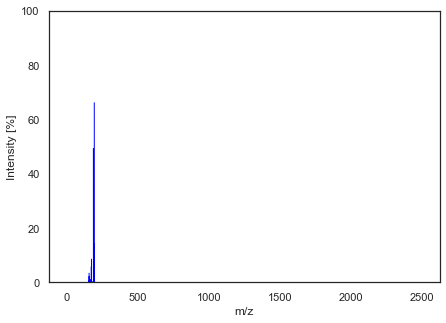

Matching spectra using cos_sim


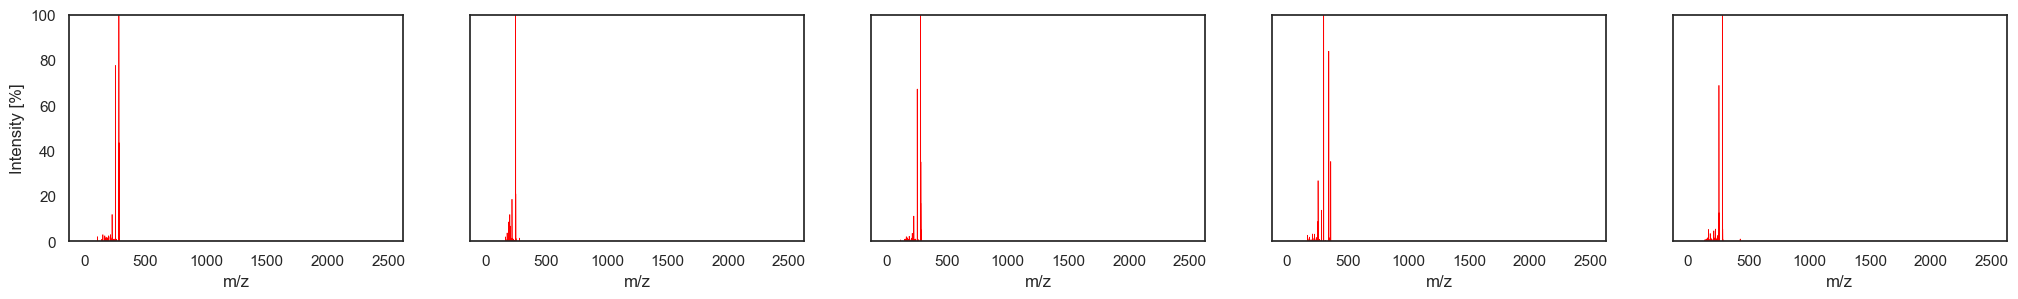

Matching spectra using eu_dist


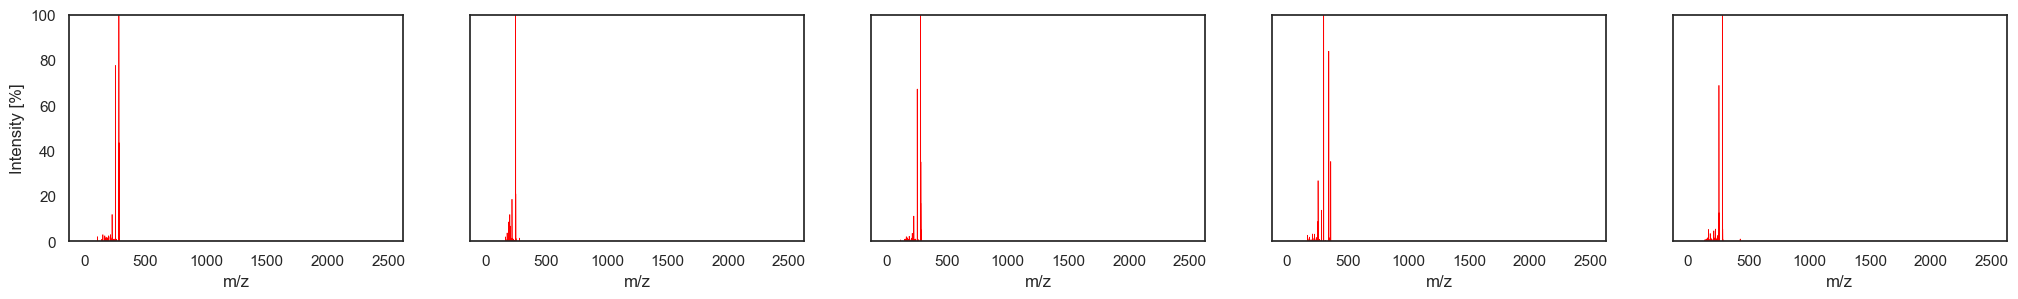

Matching spectra using per_diff


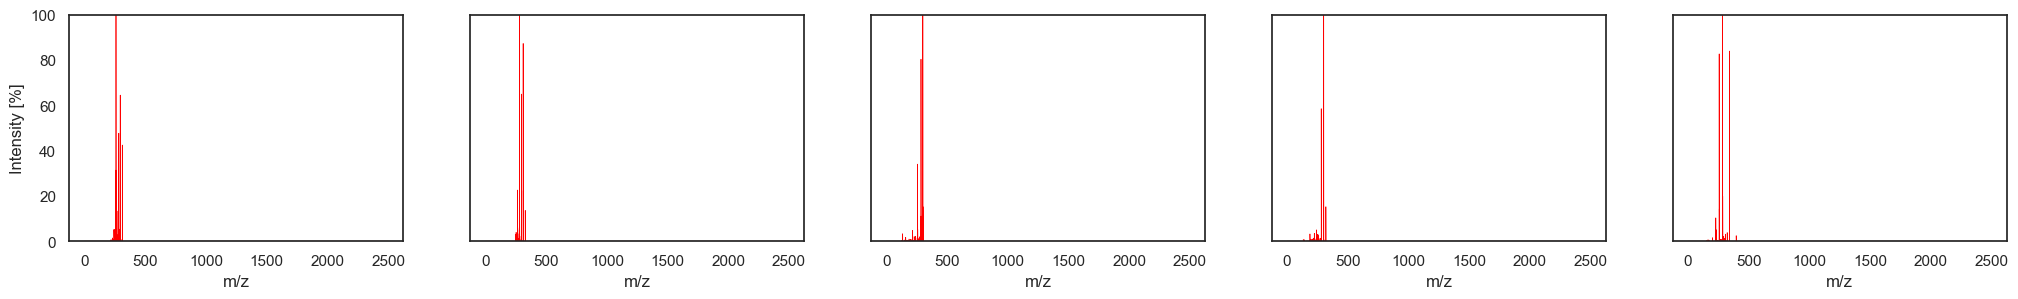

Match by scores


,id,spectrum,collision_energy,ionization_mode_id,cos_sim_4,eu_dist_4,per_diff_4
104445,JYXSWDCPHRTYGU-UHFFFAOYSA-N,107.01125:2.000000 109.02681:0.600000 117.03019:0.600000 120.5264:0.500000 143.05434:0.700000 144.04608:0.700000 146.06834:0.900000 151.00227:2.900000 159.05286:0.500000 163.00079:0.600000 164.009...,50.0,0,0.994961,0.100384,0.294089
94820,JCTYWRARKVGOBK-UHFFFAOYSA-N,103.46791:0.132173 109.38998:0.115652 121.67151:0.093623 141.06821:0.115652 151.05396:0.132173 152.06322:0.121159 153.0687:0.093623 162.12341:0.115652 162.50659:0.115652 165.04793:0.148695 165.056...,6.0,1,0.994060,0.108996,0.121858
38214,YBHILYKTIRIUTE-UHFFFAOYSA-N,91.200:0.054161 134.000:0.028370 152.100:0.020633 161.400:0.283703 190.400:0.015475 191.300:0.043845 204.300:0.046424 205.500:0.059320 206.300:0.028370 216.200:0.056741 217.100:0.144430 218.700:0....,50.0,1,0.993444,0.114512,0.539629
97068,XVGOZDAJGBALKS-UHFFFAOYSA-N,45.226845:0.111872 46.262043:0.105023 46.279644:0.089041 46.858261:0.114155 47.040726:0.066210 47.103825:0.095890 47.822350:0.111872 48.284561:0.084475 48.648987:0.100457 48.660095:0.093607 48.812...,NaN,1,0.993218,0.116467,0.267977
90080,IYGYMKDQCDOMRE-ZWKOTPCHSA-N,135.042:0.100100 147.042:0.100100 149.022:0.100100 149.057:0.500500 159.052:0.400400 160.064:0.200200 161.059:0.200200 163.052:0.300300 165.067:1.201200 166.073:0.100100 167.084:0.200200 174.056:0...,30.0,1,0.992421,0.123122,0.394066


,id,spectrum,collision_energy,ionization_mode_id,eu_dist_4,cos_sim_4,per_diff_4
104445,JYXSWDCPHRTYGU-UHFFFAOYSA-N,107.01125:2.000000 109.02681:0.600000 117.03019:0.600000 120.5264:0.500000 143.05434:0.700000 144.04608:0.700000 146.06834:0.900000 151.00227:2.900000 159.05286:0.500000 163.00079:0.600000 164.009...,50.0,0,0.100384,0.994961,0.294089
94820,JCTYWRARKVGOBK-UHFFFAOYSA-N,103.46791:0.132173 109.38998:0.115652 121.67151:0.093623 141.06821:0.115652 151.05396:0.132173 152.06322:0.121159 153.0687:0.093623 162.12341:0.115652 162.50659:0.115652 165.04793:0.148695 165.056...,6.0,1,0.108996,0.994060,0.121858
38214,YBHILYKTIRIUTE-UHFFFAOYSA-N,91.200:0.054161 134.000:0.028370 152.100:0.020633 161.400:0.283703 190.400:0.015475 191.300:0.043845 204.300:0.046424 205.500:0.059320 206.300:0.028370 216.200:0.056741 217.100:0.144430 218.700:0....,50.0,1,0.114512,0.993444,0.539629
97068,XVGOZDAJGBALKS-UHFFFAOYSA-N,45.226845:0.111872 46.262043:0.105023 46.279644:0.089041 46.858261:0.114155 47.040726:0.066210 47.103825:0.095890 47.822350:0.111872 48.284561:0.084475 48.648987:0.100457 48.660095:0.093607 48.812...,NaN,1,0.116467,0.993218,0.267977
90080,IYGYMKDQCDOMRE-ZWKOTPCHSA-N,135.042:0.100100 147.042:0.100100 149.022:0.100100 149.057:0.500500 159.052:0.400400 160.064:0.200200 161.059:0.200200 163.052:0.300300 165.067:1.201200 166.073:0.100100 167.084:0.200200 174.056:0...,30.0,1,0.123122,0.992421,0.394066


,id,spectrum,collision_energy,ionization_mode_id,per_diff_4,cos_sim_4,eu_dist_4
94820,JCTYWRARKVGOBK-UHFFFAOYSA-N,103.46791:0.132173 109.38998:0.115652 121.67151:0.093623 141.06821:0.115652 151.05396:0.132173 152.06322:0.121159 153.0687:0.093623 162.12341:0.115652 162.50659:0.115652 165.04793:0.148695 165.056...,6.0,1,0.121858,0.994060,0.108996
28878,BHMBVRSPMRCCGG-OUTUXVNYSA-N,95.040:0.065288 135.120:0.087051 147.383:0.130577 161.120:0.130577 161.360:0.152340 161.600:0.065288 163.100:0.087051 171.352:0.544070 172.780:0.087051 173.120:0.087051 173.600:0.130577 174.080:0....,20.0,0,0.144149,0.991365,0.131414
6990,PKPHZFVECLENRP-QDWLCUAPSA-N,69.033798:6.888889 93.070900:0.422222 121.028603:0.355556 121.064400:0.377778 123.080704:1.066667 147.080795:0.911111 149.023407:11.555556 149.034897:0.488889 149.096100:0.733333 151.038605:2.2222...,NaN,1,0.147674,0.989845,0.142515
58340,JAUOIFJMECXRGI-UHFFFAOYSA-N,44.04594:0.057742 80.04834:0.086613 82.06483:0.162228 93.05891:0.115485 115.05423:0.028871 117.05439:0.057742 128.08449:0.057742 131.06697:0.057742 144.07535:0.057742 151.05597:0.057742 163.02866:...,35.0,1,0.148481,0.985594,0.169738
86973,GVVXPMORGFYVOO-UHFFFAOYSA-N,251.1063:3.030752974813362 253.0868:3.922161064648236 265.083:22.60340195719584 266.0929:5.968791220933847 266.8436:0.15366128219117536 267.0977:3.3541322799190603 268.105:1.2619216983542705 269.1...,NaN,0,0.153823,0.987752,0.156514


Intermediate spectrum


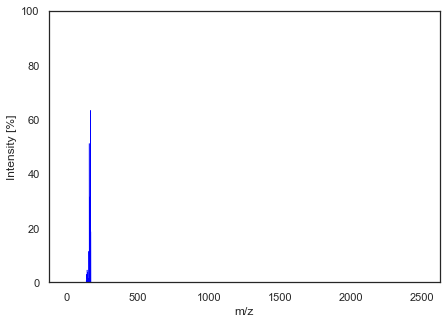

Matching spectra using cos_sim


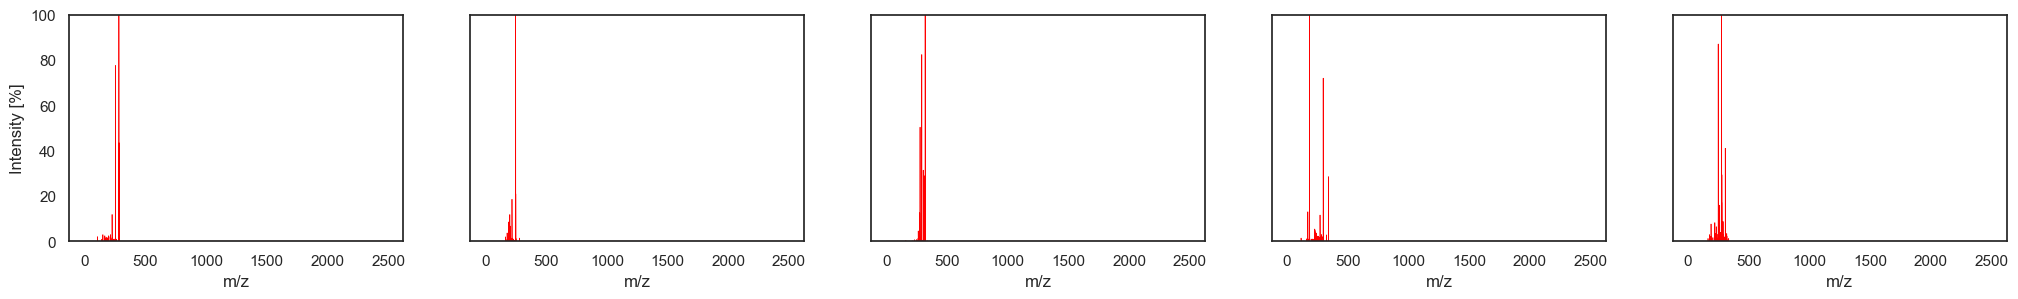

Matching spectra using eu_dist


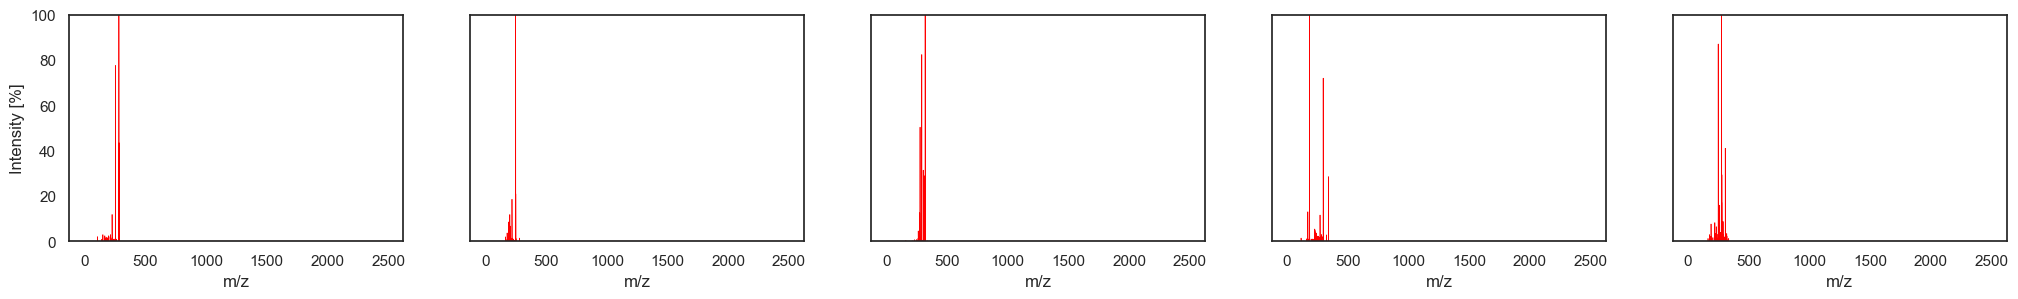

Matching spectra using per_diff


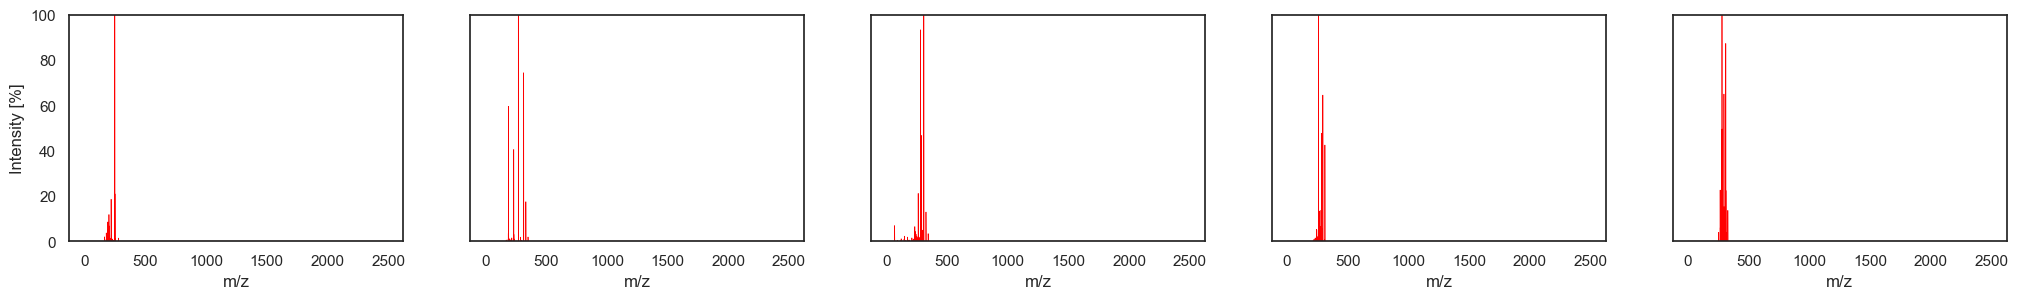

Match by scores


,id,spectrum,collision_energy,ionization_mode_id,cos_sim_5,eu_dist_5,per_diff_5
87445,FLEXCYTURSFUNC-UHFFFAOYSA-N,50.300618:0.022370 51.085165:0.017902 52.445827:0.021636 52.463418:0.021894 52.793423:0.016340 53.010763:0.024774 53.209456:0.024986 53.537669:0.022765 54.043973:0.016001 54.192740:0.025632 54.932...,65.0,1,0.995487,0.095008,0.149735
101818,BXQZTMMXFKFJIY-UHFFFAOYSA-N,135.222656:0.215138 136.941162:0.102520 144.819519:0.476390 145.721558:0.219045 147.033752:12.466262 147.959061:4.477650 148.762985:0.242873 160.068024:0.117852 162.609985:0.372190 175.016693:0.01...,NaN,1,0.994578,0.104140,0.381290
28878,BHMBVRSPMRCCGG-OUTUXVNYSA-N,95.040:0.065288 135.120:0.087051 147.383:0.130577 161.120:0.130577 161.360:0.152340 161.600:0.065288 163.100:0.087051 171.352:0.544070 172.780:0.087051 173.120:0.087051 173.600:0.130577 174.080:0....,20.0,0,0.993503,0.113989,0.200505
30427,TZBJGXHYKVUXJN-UHFFFAOYSA-N,77.521111:0.121688 78.692749:0.113723 91.05365:0.270116 108.7789:0.117635 111.007736:0.478321 119.049088:0.415969 119.676193:0.139733 121.028122:1.056367 127.229187:0.127743 131.049301:0.439608 13...,45.0,1,0.992945,0.118781,0.437336
58846,OFBIFZUFASYYRE-UHFFFAOYSA-N,45.280903:0.127059 45.313049:0.106639 45.351181:0.122521 45.421638:0.090756 45.437737:0.106639 45.573341:0.129328 45.592155:0.086219 45.674885:0.106639 45.815395:0.074874 45.936844:0.113446 46.036...,NaN,1,0.992900,0.119160,0.244306


,id,spectrum,collision_energy,ionization_mode_id,eu_dist_5,cos_sim_5,per_diff_5
87445,FLEXCYTURSFUNC-UHFFFAOYSA-N,50.300618:0.022370 51.085165:0.017902 52.445827:0.021636 52.463418:0.021894 52.793423:0.016340 53.010763:0.024774 53.209456:0.024986 53.537669:0.022765 54.043973:0.016001 54.192740:0.025632 54.932...,65.0,1,0.095008,0.995487,0.149735
101818,BXQZTMMXFKFJIY-UHFFFAOYSA-N,135.222656:0.215138 136.941162:0.102520 144.819519:0.476390 145.721558:0.219045 147.033752:12.466262 147.959061:4.477650 148.762985:0.242873 160.068024:0.117852 162.609985:0.372190 175.016693:0.01...,NaN,1,0.104140,0.994578,0.381290
28878,BHMBVRSPMRCCGG-OUTUXVNYSA-N,95.040:0.065288 135.120:0.087051 147.383:0.130577 161.120:0.130577 161.360:0.152340 161.600:0.065288 163.100:0.087051 171.352:0.544070 172.780:0.087051 173.120:0.087051 173.600:0.130577 174.080:0....,20.0,0,0.113989,0.993503,0.200505
30427,TZBJGXHYKVUXJN-UHFFFAOYSA-N,77.521111:0.121688 78.692749:0.113723 91.05365:0.270116 108.7789:0.117635 111.007736:0.478321 119.049088:0.415969 119.676193:0.139733 121.028122:1.056367 127.229187:0.127743 131.049301:0.439608 13...,45.0,1,0.118781,0.992945,0.437336
58846,OFBIFZUFASYYRE-UHFFFAOYSA-N,45.280903:0.127059 45.313049:0.106639 45.351181:0.122521 45.421638:0.090756 45.437737:0.106639 45.573341:0.129328 45.592155:0.086219 45.674885:0.106639 45.815395:0.074874 45.936844:0.113446 46.036...,NaN,1,0.119160,0.992900,0.244306


,id,spectrum,collision_energy,ionization_mode_id,per_diff_5,cos_sim_5,eu_dist_5
121100,CKVBWFBLCKTQEC-FOCFSEODSA-N,78.424782:0.049521 89.058167:0.090789 113.803398:0.297128 127.068039:0.099043 129.769501:0.099043 136.171021:0.288874 139.042236:0.074282 143.081085:0.231099 149.062729:0.066028 151.437943:0.23935...,NaN,1,0.146002,0.989229,0.146771
87445,FLEXCYTURSFUNC-UHFFFAOYSA-N,50.300618:0.022370 51.085165:0.017902 52.445827:0.021636 52.463418:0.021894 52.793423:0.016340 53.010763:0.024774 53.209456:0.024986 53.537669:0.022765 54.043973:0.016001 54.192740:0.025632 54.932...,65.0,1,0.149735,0.995487,0.095008
121045,JFESWTBLTSUPGK-UHFFFAOYSA-N,44.979576:0.000000 44.983852:0.000000 44.988125:0.000000 44.992401:0.000000 44.996674:0.000000 45.000950:0.000000 45.005226:0.000000 45.009502:0.000000 45.013775:0.000000 45.018051:0.000000 45.022...,NaN,1,0.150048,0.980722,0.196358
96935,HQQSBEDKMRHYME-UHFFFAOYSA-N,44.909939:0.061125 44.923275:0.096513 44.998009:0.082036 45.046757:0.070776 45.084835:0.057908 45.131618:0.065950 45.202515:0.073993 45.293552:0.072385 45.308990:0.051473 45.327045:0.057908 45.412...,NaN,1,0.159498,0.987516,0.158012
94820,JCTYWRARKVGOBK-UHFFFAOYSA-N,103.46791:0.132173 109.38998:0.115652 121.67151:0.093623 141.06821:0.115652 151.05396:0.132173 152.06322:0.121159 153.0687:0.093623 162.12341:0.115652 162.50659:0.115652 165.04793:0.148695 165.056...,6.0,1,0.164281,0.985893,0.167971


Intermediate spectrum


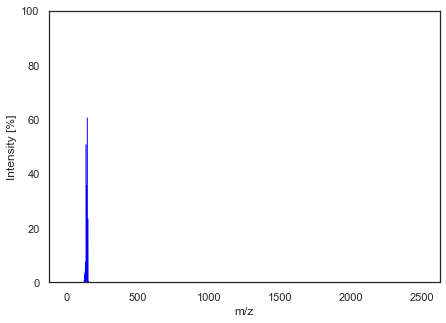

Matching spectra using cos_sim


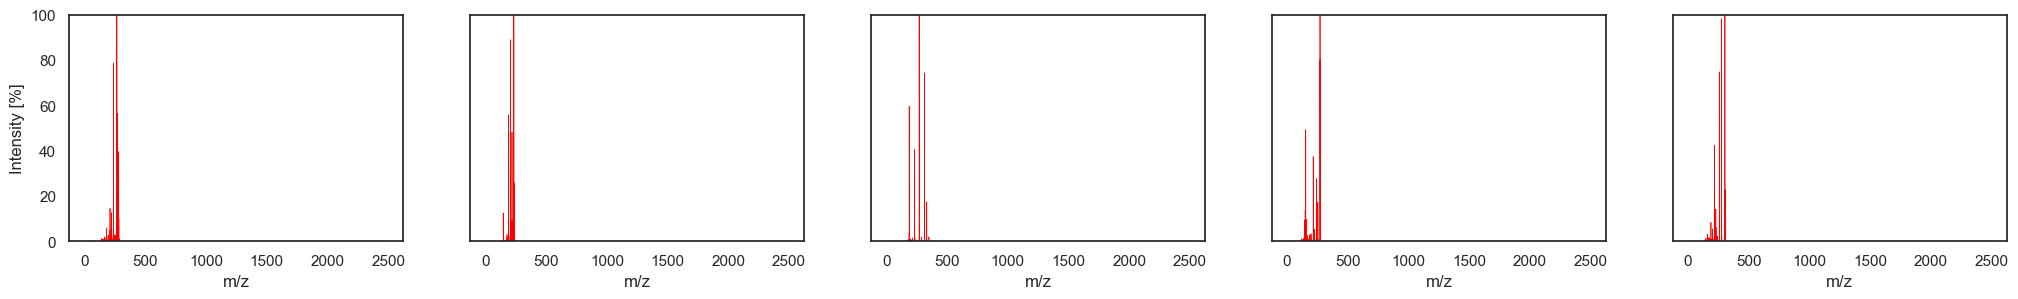

Matching spectra using eu_dist


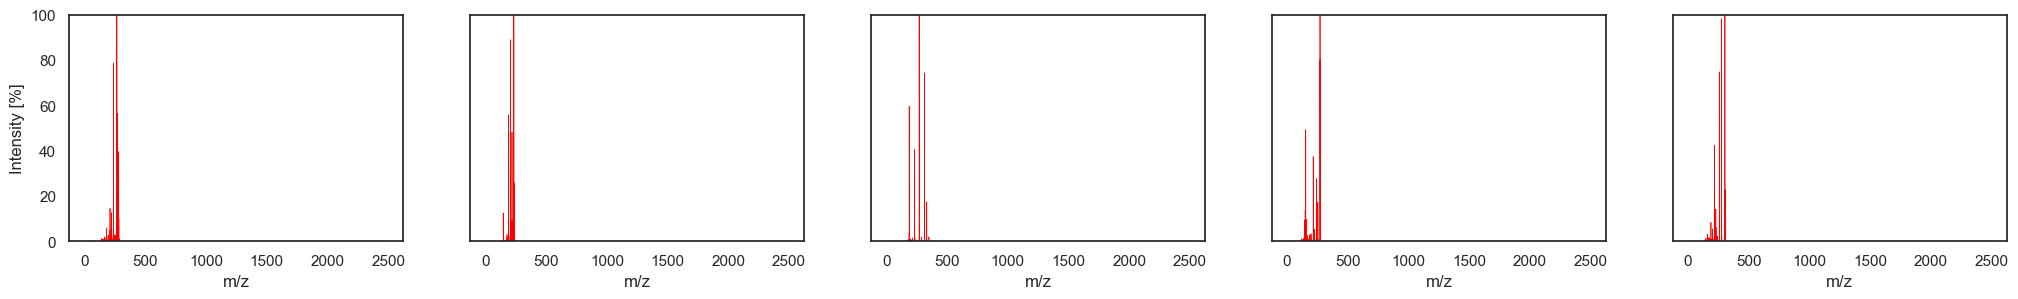

Matching spectra using per_diff


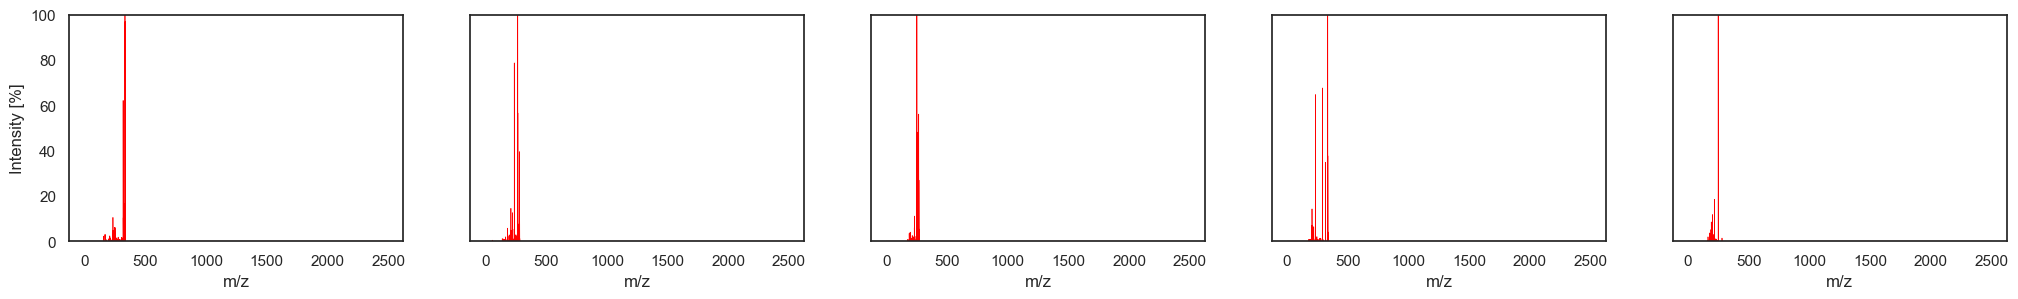

Match by scores


,id,spectrum,collision_energy,ionization_mode_id,cos_sim_6,eu_dist_6,per_diff_6
9171,OOXFLIUVCWLPKE-UHFFFAOYSA-N,50.004471:0.002510 50.083015:0.004393 50.149338:0.002779 50.180176:0.004931 50.202820:0.006007 50.287720:0.002152 50.339855:0.007351 50.374825:0.005759 50.429440:0.005020 50.481079:0.008248 50.603...,NaN,0,0.994720,0.102759,0.195320
28091,JHNVCKNCEVZGGC-UHFFFAOYSA-N,94.698914:0.013210 94.705101:0.015612 94.711288:0.028822 94.717468:0.036027 94.723656:0.033626 94.729843:0.010208 94.736031:0.007806 94.742218:0.024619 94.748405:0.034226 94.754585:0.033626 94.760...,NaN,1,0.994356,0.106248,0.271712
101818,BXQZTMMXFKFJIY-UHFFFAOYSA-N,135.222656:0.215138 136.941162:0.102520 144.819519:0.476390 145.721558:0.219045 147.033752:12.466262 147.959061:4.477650 148.762985:0.242873 160.068024:0.117852 162.609985:0.372190 175.016693:0.01...,NaN,1,0.994165,0.108031,0.472563
10242,JENFZXAOWFNHSE-UHFFFAOYSA-N,75.432106:0.026027 76.434090:0.047956 77.365486:0.046028 78.047157:0.033979 78.626755:0.074465 79.439743:0.066994 81.646225:0.075911 82.718391:0.067235 82.851822:0.070368 84.229942:0.052053 84.815...,NaN,1,0.993831,0.111083,0.234845
67336,PXNMNABLQWUMCX-UHFFFAOYSA-N,109.0635:3.870056 118.064:1.299435 120.0424:3.135593 128.0479:3.107345 130.0662:6.525424 132.0425:4.604520 133.525:1.101695 135.0422:0.790960 140.0475:1.299435 143.0719:0.988701 144.0798:1.384181 ...,20.0,1,0.993794,0.111415,0.258806


,id,spectrum,collision_energy,ionization_mode_id,eu_dist_6,cos_sim_6,per_diff_6
9171,OOXFLIUVCWLPKE-UHFFFAOYSA-N,50.004471:0.002510 50.083015:0.004393 50.149338:0.002779 50.180176:0.004931 50.202820:0.006007 50.287720:0.002152 50.339855:0.007351 50.374825:0.005759 50.429440:0.005020 50.481079:0.008248 50.603...,NaN,0,0.102759,0.994720,0.195320
28091,JHNVCKNCEVZGGC-UHFFFAOYSA-N,94.698914:0.013210 94.705101:0.015612 94.711288:0.028822 94.717468:0.036027 94.723656:0.033626 94.729843:0.010208 94.736031:0.007806 94.742218:0.024619 94.748405:0.034226 94.754585:0.033626 94.760...,NaN,1,0.106248,0.994356,0.271712
101818,BXQZTMMXFKFJIY-UHFFFAOYSA-N,135.222656:0.215138 136.941162:0.102520 144.819519:0.476390 145.721558:0.219045 147.033752:12.466262 147.959061:4.477650 148.762985:0.242873 160.068024:0.117852 162.609985:0.372190 175.016693:0.01...,NaN,1,0.108031,0.994165,0.472563
10242,JENFZXAOWFNHSE-UHFFFAOYSA-N,75.432106:0.026027 76.434090:0.047956 77.365486:0.046028 78.047157:0.033979 78.626755:0.074465 79.439743:0.066994 81.646225:0.075911 82.718391:0.067235 82.851822:0.070368 84.229942:0.052053 84.815...,NaN,1,0.111083,0.993831,0.234845
67336,PXNMNABLQWUMCX-UHFFFAOYSA-N,109.0635:3.870056 118.064:1.299435 120.0424:3.135593 128.0479:3.107345 130.0662:6.525424 132.0425:4.604520 133.525:1.101695 135.0422:0.790960 140.0475:1.299435 143.0719:0.988701 144.0798:1.384181 ...,20.0,1,0.111415,0.993794,0.258806


,id,spectrum,collision_energy,ionization_mode_id,per_diff_6,cos_sim_6,eu_dist_6
50906,DZTHIGRZJZPRDV-UHFFFAOYSA-N,50.025329:0.010819 50.199988:0.008441 50.358070:0.017676 50.537304:0.008642 51.131143:0.014740 51.344584:0.009987 52.096088:0.007772 52.396115:0.010622 53.302364:0.015962 53.352945:0.008954 53.412...,35.0,1,0.144088,0.976116,0.218558
38948,CCCPQTCGPQONAG-UHFFFAOYSA-N,100.021736:0.016664 100.290352:0.002687 100.688988:0.002768 100.874542:0.003700 101.047462:0.146908 101.191360:0.010522 101.574348:0.009546 101.739052:0.003910 101.820488:0.002386 102.063171:0.079...,NaN,1,0.150866,0.988539,0.151399
97524,JAQUASYNZVUNQP-NZEUDUFCSA-N,94.958252:0.116673 94.998291:0.030819 95.028755:0.072646 95.042915:0.083653 95.083885:0.094659 95.112778:0.099062 95.149658:0.061639 95.203262:0.112271 95.250641:0.127680 95.275894:0.063840 95.359...,NaN,1,0.159205,0.985380,0.171000
78888,NWWZPOKUUAIXIW-DHZHZOJOSA-N,108.055:1.521503 113.0153:0.579620 118.9574:0.993635 120.0564:0.636547 122.0702:20.555814 122.9984:1.832014 123.0778:6.500026 124.0075:9.030689 124.0821:0.574445 125.0156:19.463851 126.0054:0.7452...,50.0,1,0.162559,0.941738,0.341357
105091,VASUQTGZAPZKFK-UHFFFAOYSA-N,91.05441:0.600000 115.03482:0.500000 116.06755:0.700000 117.0608:1.600000 117.07077:1.300000 118.0639:0.500000 119.04874:1.800000 121.05894:0.700000 121.06563:2.300000 127.05836:0.600000 130.06131...,30.0,1,0.163085,0.947250,0.324808


Intermediate spectrum


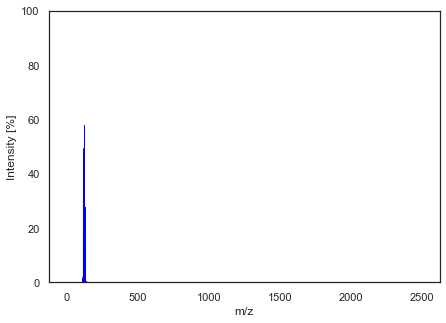

Matching spectra using cos_sim


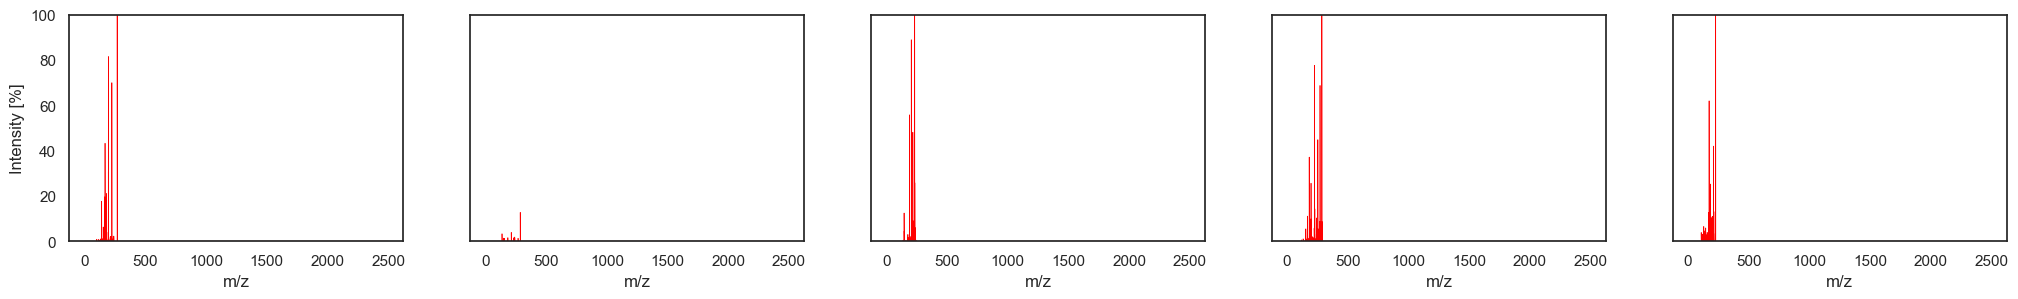

Matching spectra using eu_dist


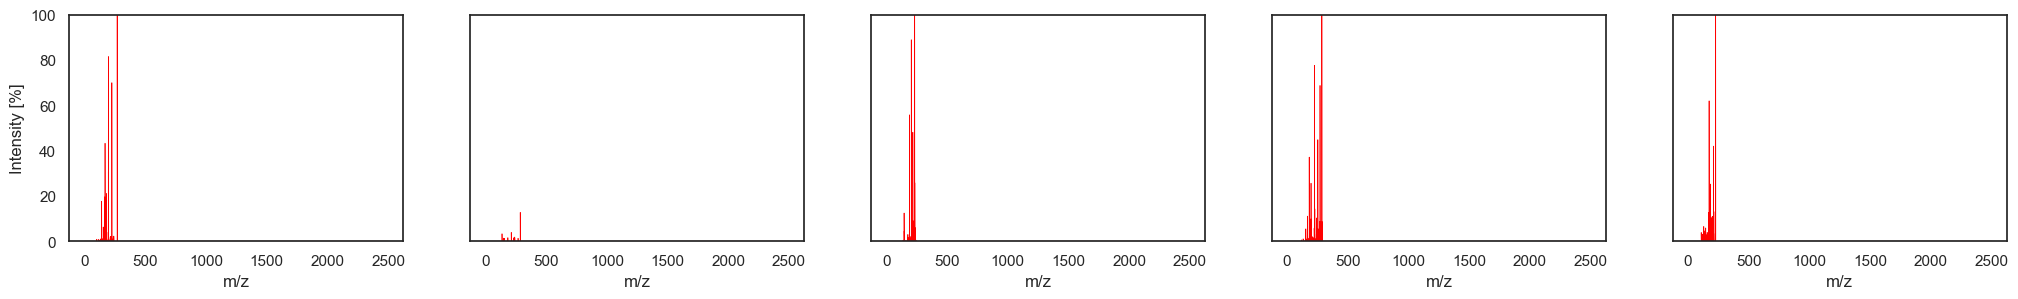

Matching spectra using per_diff


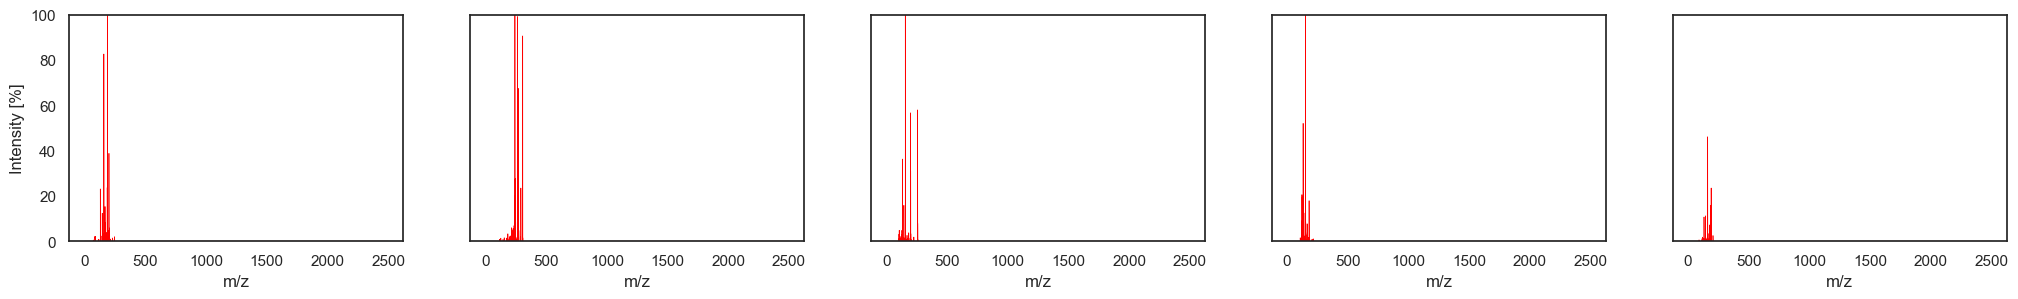

In [34]:
visualize_matching_spectra(df_all, lerp_spectra, data=data, prefix='lerp')

### Matching spectra for SLERP interpolants

Match by scores


,id,spectrum,collision_energy,ionization_mode_id,cos_sim_0,eu_dist_0,per_diff_0
5035,CRAONLIHLOSKGE-UHFFFAOYSA-N,78.653603:0.019167 79.573601:0.024167 81.338402:0.028333 84.620003:0.020000 84.747803:0.020833 85.063599:0.056667 85.585602:0.026667 86.105698:0.033333 87.043701:0.019167 87.829399:0.022500 88.127...,NaN,1,0.992099,0.125710,0.144988
77238,CCQDWIRWKWIUKK-UHFFFAOYSA-O,162.02893:0.209293 191.01778:0.345333 203.02405:0.209293 205.01312:0.418585 217.04713:0.994140 218.06746:0.376727 229.04849:0.177899 241.6367:0.188363 244.04567:0.188363 245.0394:0.502302 245.0529...,6.0,1,0.991867,0.127535,0.203555
96977,KNWODGJQLCISLC-UHFFFAOYSA-N,47.345360:0.191989 50.091663:0.173167 50.819775:0.165638 51.135262:0.195754 53.608273:0.150580 53.797894:0.161873 55.389088:0.161873 56.156086:0.135522 60.017750:0.146815 60.594280:0.150580 61.446...,NaN,1,0.991805,0.128029,0.489763
66609,ULSDMUVEXKOYBU-ZDUSSCGKSA-N,41.9956:0.538213 42.03108:0.538213 42.99835:0.538213 60.00703:0.538213 80.97254:0.538213 84.41834:0.538213 86.01971:0.538213 107.03611:0.645856 107.05208:0.645856 143.07135:0.538213 148.9028:0.538...,35.0,0,0.991441,0.130838,0.589486
37456,AXZCNBVMHHTPKA-UHFFFAOYSA-N,100.503540:0.001174 100.578613:0.000587 100.696320:0.001152 100.752342:0.001175 100.848709:0.001573 100.934814:0.001590 101.036354:0.001673 101.139526:0.000501 101.209213:0.001747 101.280006:0.001...,NaN,0,0.990833,0.135405,0.526360


,id,spectrum,collision_energy,ionization_mode_id,eu_dist_0,cos_sim_0,per_diff_0
5035,CRAONLIHLOSKGE-UHFFFAOYSA-N,78.653603:0.019167 79.573601:0.024167 81.338402:0.028333 84.620003:0.020000 84.747803:0.020833 85.063599:0.056667 85.585602:0.026667 86.105698:0.033333 87.043701:0.019167 87.829399:0.022500 88.127...,NaN,1,0.125710,0.992099,0.144988
77238,CCQDWIRWKWIUKK-UHFFFAOYSA-O,162.02893:0.209293 191.01778:0.345333 203.02405:0.209293 205.01312:0.418585 217.04713:0.994140 218.06746:0.376727 229.04849:0.177899 241.6367:0.188363 244.04567:0.188363 245.0394:0.502302 245.0529...,6.0,1,0.127535,0.991867,0.203555
96977,KNWODGJQLCISLC-UHFFFAOYSA-N,47.345360:0.191989 50.091663:0.173167 50.819775:0.165638 51.135262:0.195754 53.608273:0.150580 53.797894:0.161873 55.389088:0.161873 56.156086:0.135522 60.017750:0.146815 60.594280:0.150580 61.446...,NaN,1,0.128029,0.991805,0.489763
66609,ULSDMUVEXKOYBU-ZDUSSCGKSA-N,41.9956:0.538213 42.03108:0.538213 42.99835:0.538213 60.00703:0.538213 80.97254:0.538213 84.41834:0.538213 86.01971:0.538213 107.03611:0.645856 107.05208:0.645856 143.07135:0.538213 148.9028:0.538...,35.0,0,0.130838,0.991441,0.589486
37456,AXZCNBVMHHTPKA-UHFFFAOYSA-N,100.503540:0.001174 100.578613:0.000587 100.696320:0.001152 100.752342:0.001175 100.848709:0.001573 100.934814:0.001590 101.036354:0.001673 101.139526:0.000501 101.209213:0.001747 101.280006:0.001...,NaN,0,0.135405,0.990833,0.526360


,id,spectrum,collision_energy,ionization_mode_id,per_diff_0,cos_sim_0,eu_dist_0
82597,DDLIGBOFAVUZHB-UHFFFAOYSA-N,103.051796:0.007049 109.042778:0.005035 121.039970:0.012588 128.044205:0.006042 129.070709:0.006798 130.027496:0.006042 130.073135:0.007805 132.042130:0.005035 133.058716:0.004784 135.982147:0.006...,NaN,1,0.136943,0.984438,0.176419
96838,GLBJJMFZWDBELO-UHFFFAOYSA-N,45.030724:0.046693 45.796574:0.050379 46.534935:0.079869 47.027725:0.072497 47.328476:0.045464 47.424374:0.056523 47.495670:0.061438 47.755268:0.081098 47.975586:0.050379 48.593784:0.046693 49.061...,NaN,1,0.141488,0.983739,0.180341
5035,CRAONLIHLOSKGE-UHFFFAOYSA-N,78.653603:0.019167 79.573601:0.024167 81.338402:0.028333 84.620003:0.020000 84.747803:0.020833 85.063599:0.056667 85.585602:0.026667 86.105698:0.033333 87.043701:0.019167 87.829399:0.022500 88.127...,NaN,1,0.144988,0.992099,0.125710
86447,XHCJIWRCLSSDCD-UHFFFAOYSA-N,100.976837:0.010411 102.054207:0.010181 103.057419:0.019524 105.034988:0.017347 106.038361:0.013506 107.069611:0.089538 107.142059:0.006389 108.052643:0.017661 108.119339:0.005486 113.035255:0.014...,NaN,1,0.172773,0.982286,0.188221
10209,QZUNAFWZEXJWGD-UHFFFAOYSA-N,51.872799:0.064286 69.070099:0.235714 73.355400:0.071429 74.959099:0.067857 76.531898:0.092857 76.852303:0.089286 79.297699:0.085714 90.976601:0.110714 91.053902:0.082143 93.771797:0.067857 130.20...,NaN,1,0.174252,0.966888,0.257341


Intermediate spectrum


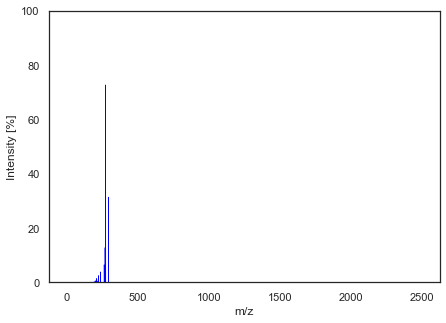

Matching spectra using cos_sim


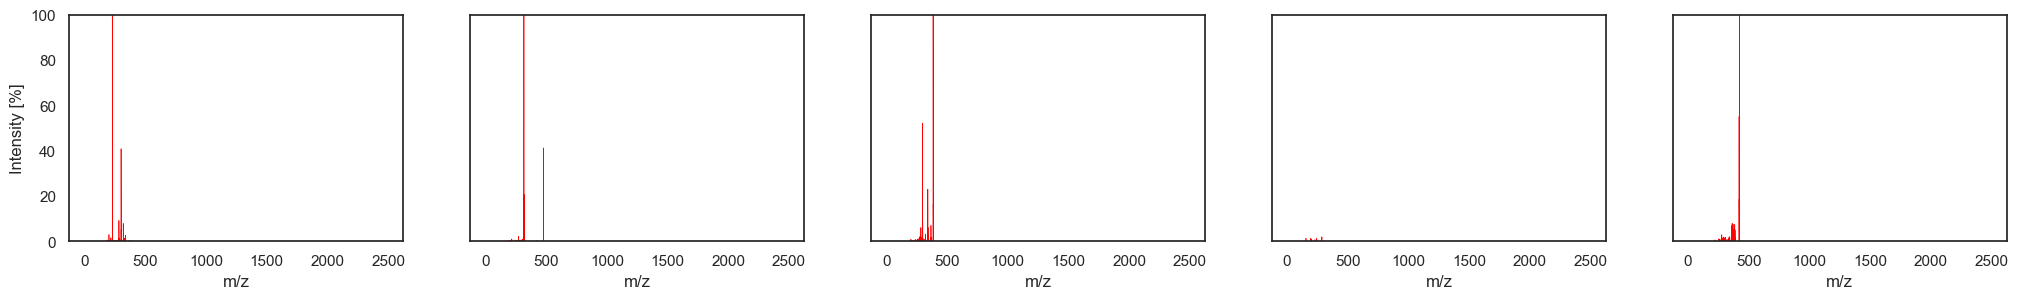

Matching spectra using eu_dist


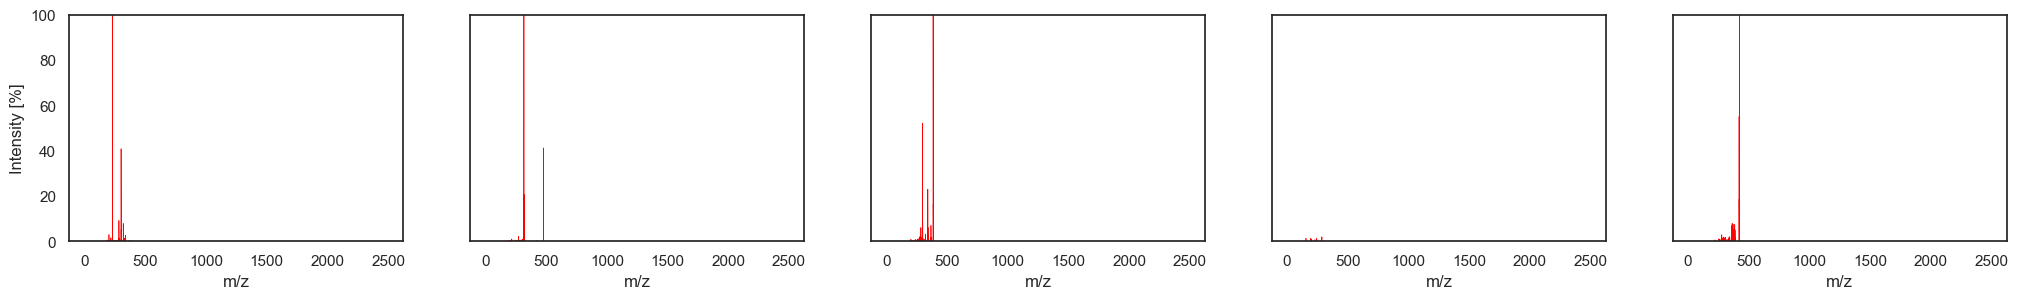

Matching spectra using per_diff


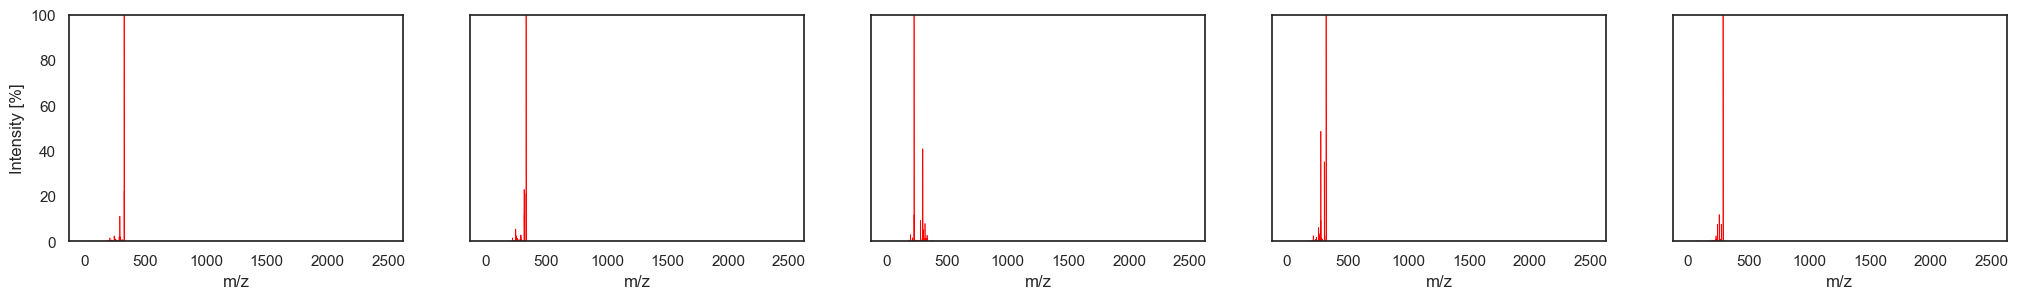

Match by scores


,id,spectrum,collision_energy,ionization_mode_id,cos_sim_1,eu_dist_1,per_diff_1
9822,WJXSYUJKJSOJOG-UHFFFAOYSA-N,100.034676:0.023238 100.097824:0.007552 100.184822:0.003230 100.404335:0.002150 100.473343:0.002592 100.641449:0.003575 100.929512:0.002622 101.035049:0.043241 101.106941:0.004469 101.215324:0.003...,NaN,0,0.995396,0.095956,0.141451
9042,FKCYENFBFZUSDP-UHFFFAOYSA-N,79.023148:0.128353 81.515823:0.100186 82.605652:0.059898 82.696999:0.101256 85.703445:0.087708 90.041115:0.076299 91.056396:0.081647 94.033577:0.063820 94.437256:0.048489 94.678101:0.083073 99.269...,NaN,1,0.994101,0.108619,0.390171
97339,RXSOQKYJSMUOPR-SFHVURJKSA-N,95.050606:0.136929 95.094307:0.083983 95.189430:0.034689 95.329285:0.069377 95.397308:0.052946 95.494522:0.067552 95.650719:0.071203 95.704681:0.060249 95.729988:0.052946 95.815689:0.049294 95.850...,NaN,1,0.993686,0.112373,0.331291
82336,NOOCSNJCXJYGPE-UHFFFAOYSA-N,78.0336:0.285038 96.0443:0.553732 109.0448:2.179205 121.0396:0.159908 139.0352:0.398394 147.0353:0.257332 159.0416:4.248108 167.0728:0.147504 175.0601:0.183857 180.0682:0.136427 181.0758:1.003854 ...,60.0,1,0.993494,0.114069,0.285145
111733,YDQWDHRMZQUTBA-UHFFFAOYSA-N,120.81593:0.420673 139.05383:0.360577 151.05406:0.500801 154.37402:0.400641 155.04784:0.320513 157.22874:0.320513 167.04668:1.362179 167.06094:0.320513 169.03114:0.320513 172.04128:0.360577 176.81...,6.0,0,0.992662,0.121145,0.291577


,id,spectrum,collision_energy,ionization_mode_id,eu_dist_1,cos_sim_1,per_diff_1
9822,WJXSYUJKJSOJOG-UHFFFAOYSA-N,100.034676:0.023238 100.097824:0.007552 100.184822:0.003230 100.404335:0.002150 100.473343:0.002592 100.641449:0.003575 100.929512:0.002622 101.035049:0.043241 101.106941:0.004469 101.215324:0.003...,NaN,0,0.095956,0.995396,0.141451
9042,FKCYENFBFZUSDP-UHFFFAOYSA-N,79.023148:0.128353 81.515823:0.100186 82.605652:0.059898 82.696999:0.101256 85.703445:0.087708 90.041115:0.076299 91.056396:0.081647 94.033577:0.063820 94.437256:0.048489 94.678101:0.083073 99.269...,NaN,1,0.108619,0.994101,0.390171
97339,RXSOQKYJSMUOPR-SFHVURJKSA-N,95.050606:0.136929 95.094307:0.083983 95.189430:0.034689 95.329285:0.069377 95.397308:0.052946 95.494522:0.067552 95.650719:0.071203 95.704681:0.060249 95.729988:0.052946 95.815689:0.049294 95.850...,NaN,1,0.112373,0.993686,0.331291
82336,NOOCSNJCXJYGPE-UHFFFAOYSA-N,78.0336:0.285038 96.0443:0.553732 109.0448:2.179205 121.0396:0.159908 139.0352:0.398394 147.0353:0.257332 159.0416:4.248108 167.0728:0.147504 175.0601:0.183857 180.0682:0.136427 181.0758:1.003854 ...,60.0,1,0.114069,0.993494,0.285145
111733,YDQWDHRMZQUTBA-UHFFFAOYSA-N,120.81593:0.420673 139.05383:0.360577 151.05406:0.500801 154.37402:0.400641 155.04784:0.320513 157.22874:0.320513 167.04668:1.362179 167.06094:0.320513 169.03114:0.320513 172.04128:0.360577 176.81...,6.0,0,0.121145,0.992662,0.291577


,id,spectrum,collision_energy,ionization_mode_id,per_diff_1,cos_sim_1,eu_dist_1
86447,XHCJIWRCLSSDCD-UHFFFAOYSA-N,100.976837:0.010411 102.054207:0.010181 103.057419:0.019524 105.034988:0.017347 106.038361:0.013506 107.069611:0.089538 107.142059:0.006389 108.052643:0.017661 108.119339:0.005486 113.035255:0.014...,NaN,1,0.137584,0.989495,0.144946
9822,WJXSYUJKJSOJOG-UHFFFAOYSA-N,100.034676:0.023238 100.097824:0.007552 100.184822:0.003230 100.404335:0.002150 100.473343:0.002592 100.641449:0.003575 100.929512:0.002622 101.035049:0.043241 101.106941:0.004469 101.215324:0.003...,NaN,0,0.141451,0.995396,0.095956
5035,CRAONLIHLOSKGE-UHFFFAOYSA-N,78.653603:0.019167 79.573601:0.024167 81.338402:0.028333 84.620003:0.020000 84.747803:0.020833 85.063599:0.056667 85.585602:0.026667 86.105698:0.033333 87.043701:0.019167 87.829399:0.022500 88.127...,NaN,1,0.146901,0.983931,0.179269
16183,DYFXVIVUWANJGN-UHFFFAOYSA-N,70.271950:0.030215 70.574455:0.036810 72.655945:0.022546 72.844261:0.026073 76.287872:0.021779 76.578499:0.031748 76.745300:0.050000 77.678055:0.016718 79.525421:0.034969 81.535439:0.034662 82.062...,NaN,1,0.151067,0.991077,0.133593
96966,TVQZAMVBTVNYLA-UHFFFAOYSA-N,45.051174:0.100253 45.072552:0.075189 45.519947:0.080973 45.533379:0.090613 45.612652:0.094469 45.987099:0.080973 46.068115:0.082901 46.179138:0.071334 46.335979:0.082901 46.569298:0.096397 46.682...,NaN,1,0.158819,0.977085,0.214080


Intermediate spectrum


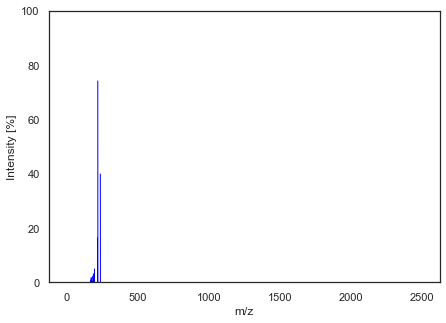

Matching spectra using cos_sim


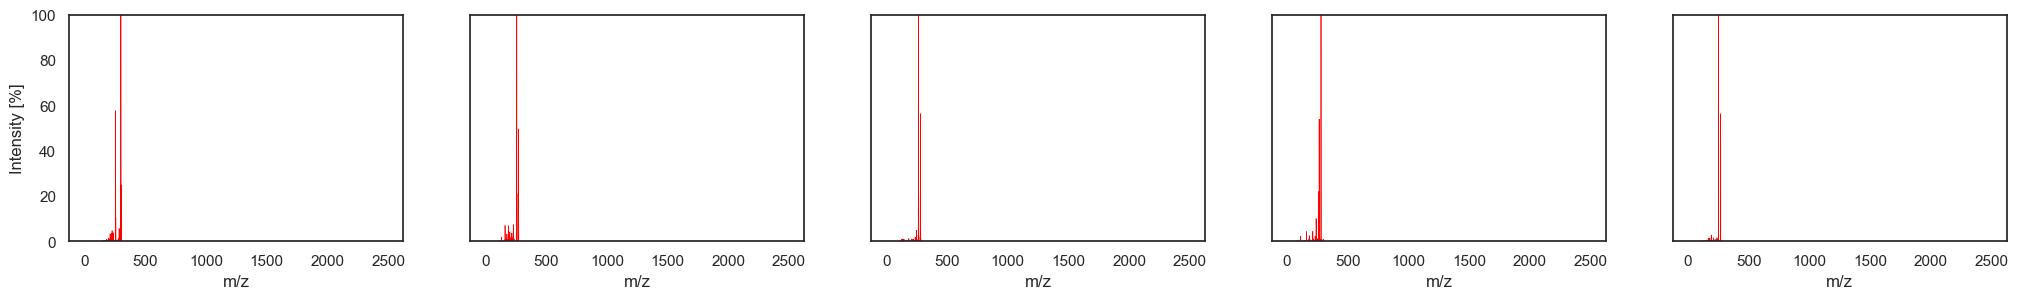

Matching spectra using eu_dist


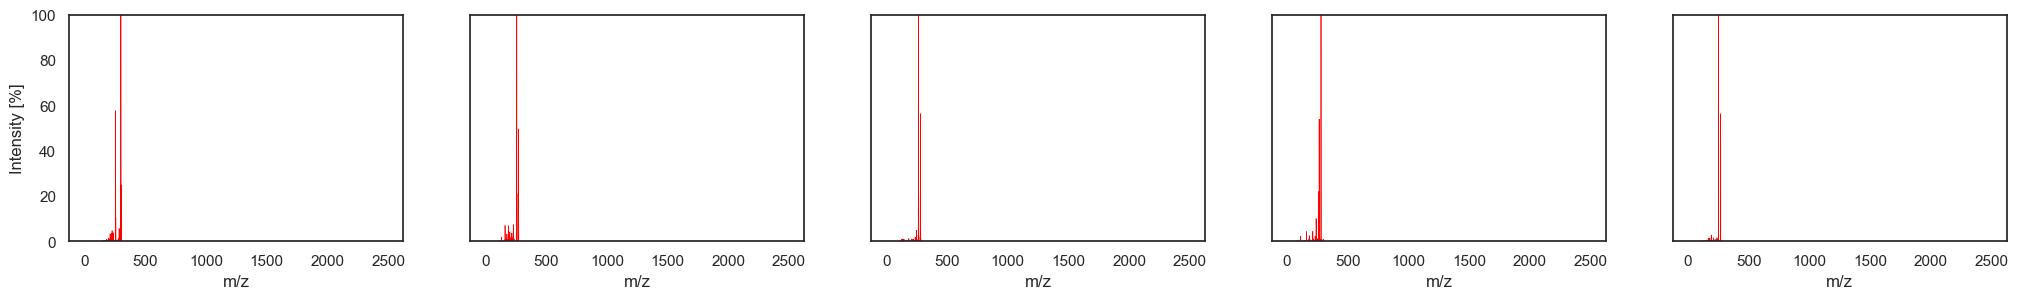

Matching spectra using per_diff


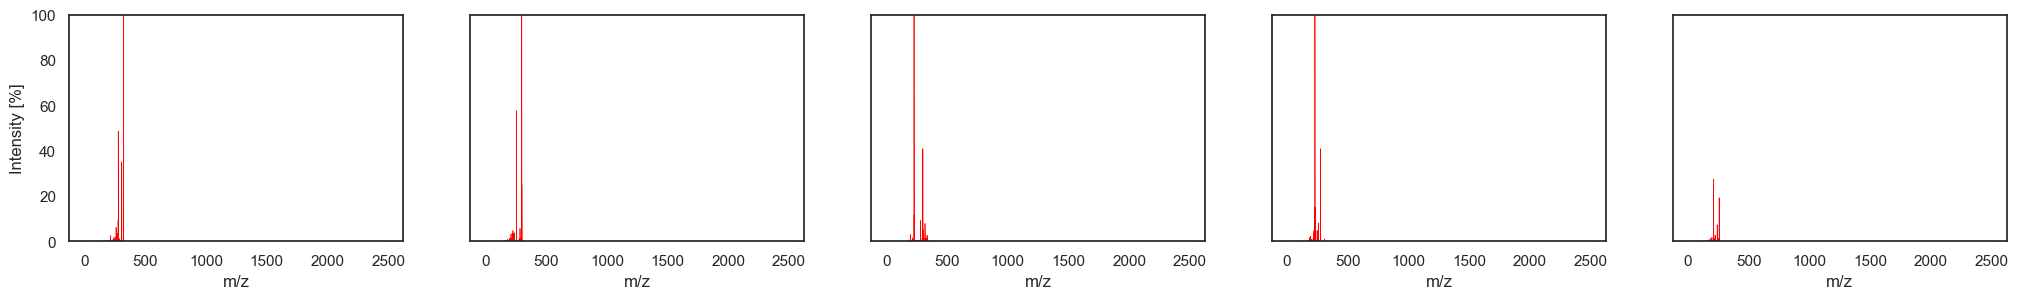

Match by scores


,id,spectrum,collision_energy,ionization_mode_id,cos_sim_2,eu_dist_2,per_diff_2
101766,OTZURLUZDRIZEM-MDWZMJQESA-N,100.131180:0.118810 116.420212:0.100993 125.987778:0.096290 130.229584:0.116345 132.301636:0.211942 141.113220:0.034030 142.391846:0.051560 144.222076:0.404158 151.159637:0.269236 153.899475:0.124...,NaN,1,0.994814,0.101848,0.215195
97059,MGCCHNLNRBULBU-WZTVWXICSA-N,46.541248:0.103966 47.548737:0.089113 49.959789:0.094064 51.622208:0.123769 52.109570:0.086638 52.763912:0.138621 53.260979:0.123769 54.058498:0.103966 54.131695:0.094064 54.613083:0.094064 55.021...,NaN,1,0.994721,0.102754,0.152996
9822,WJXSYUJKJSOJOG-UHFFFAOYSA-N,100.034676:0.023238 100.097824:0.007552 100.184822:0.003230 100.404335:0.002150 100.473343:0.002592 100.641449:0.003575 100.929512:0.002622 101.035049:0.043241 101.106941:0.004469 101.215324:0.003...,NaN,0,0.994335,0.106443,0.151013
13654,IXRKDGGGFFCRIR-UHFFFAOYSA-N,50.338748:0.015125 50.365964:0.014934 50.591228:0.013691 50.615185:0.015676 51.338306:0.014856 51.343025:0.013069 52.416250:0.016258 53.006058:0.012756 53.304437:0.014533 53.530774:0.015095 56.303...,35.0,0,0.994041,0.109174,0.669662
59728,CRDNMYFJWFXOCH-BUHFOSPRSA-N,104.04694:0.270488 116.04378:0.270488 120.0369:0.135244 130.03424:0.135244 132.04233:3.603284 140.04251:0.135244 144.04324:0.540976 146.01894:0.405732 149.09596:0.135244 151.05586:0.270488 157.037...,35.0,1,0.993790,0.111444,0.184202


,id,spectrum,collision_energy,ionization_mode_id,eu_dist_2,cos_sim_2,per_diff_2
101766,OTZURLUZDRIZEM-MDWZMJQESA-N,100.131180:0.118810 116.420212:0.100993 125.987778:0.096290 130.229584:0.116345 132.301636:0.211942 141.113220:0.034030 142.391846:0.051560 144.222076:0.404158 151.159637:0.269236 153.899475:0.124...,NaN,1,0.101848,0.994814,0.215195
97059,MGCCHNLNRBULBU-WZTVWXICSA-N,46.541248:0.103966 47.548737:0.089113 49.959789:0.094064 51.622208:0.123769 52.109570:0.086638 52.763912:0.138621 53.260979:0.123769 54.058498:0.103966 54.131695:0.094064 54.613083:0.094064 55.021...,NaN,1,0.102754,0.994721,0.152996
9822,WJXSYUJKJSOJOG-UHFFFAOYSA-N,100.034676:0.023238 100.097824:0.007552 100.184822:0.003230 100.404335:0.002150 100.473343:0.002592 100.641449:0.003575 100.929512:0.002622 101.035049:0.043241 101.106941:0.004469 101.215324:0.003...,NaN,0,0.106443,0.994335,0.151013
13654,IXRKDGGGFFCRIR-UHFFFAOYSA-N,50.338748:0.015125 50.365964:0.014934 50.591228:0.013691 50.615185:0.015676 51.338306:0.014856 51.343025:0.013069 52.416250:0.016258 53.006058:0.012756 53.304437:0.014533 53.530774:0.015095 56.303...,35.0,0,0.109174,0.994041,0.669662
59728,CRDNMYFJWFXOCH-BUHFOSPRSA-N,104.04694:0.270488 116.04378:0.270488 120.0369:0.135244 130.03424:0.135244 132.04233:3.603284 140.04251:0.135244 144.04324:0.540976 146.01894:0.405732 149.09596:0.135244 151.05586:0.270488 157.037...,35.0,1,0.111444,0.993790,0.184202


,id,spectrum,collision_energy,ionization_mode_id,per_diff_2,cos_sim_2,eu_dist_2
35159,FFGPTBGBLSHEPO-UHFFFAOYSA-N,44.01046:0.043412 89.04036:0.065117 91.05255:0.470808 98.00605:0.021706 101.0328:0.021706 115.0526:0.357628 116.04826:0.739030 117.05579:0.195352 126.04211:0.043412 128.04625:0.108012 128.05579:0....,35.0,1,0.122011,0.993700,0.112251
96840,OGQICQVSFDPSEI-UHFFFAOYSA-N,44.981197:0.067443 45.351711:0.056202 45.507324:0.057808 45.770859:0.062625 45.812611:0.059414 45.889431:0.062625 45.902912:0.062625 46.258244:0.069049 46.398643:0.057808 46.561962:0.080289 46.699...,NaN,1,0.145758,0.977332,0.212922
88801,WKSAUQYGYAYLPV-UHFFFAOYSA-N,44.908421:0.070826 44.927094:0.106239 45.239819:0.059558 45.678650:0.061168 46.528717:0.061168 46.546371:0.062778 46.562668:0.059558 47.033783:0.059558 47.245754:0.072436 47.534714:0.074045 47.718...,NaN,1,0.149663,0.977426,0.212480
16181,DYFXVIVUWANJGN-UHFFFAOYSA-N,79.088402:0.032813 80.995300:0.039063 81.067101:0.037500 82.000198:0.045313 83.340500:0.040625 84.648201:0.037500 86.438499:0.043750 87.498703:0.056250 87.793900:0.034375 92.269600:0.048438 93.283...,NaN,1,0.150764,0.973994,0.228063
9822,WJXSYUJKJSOJOG-UHFFFAOYSA-N,100.034676:0.023238 100.097824:0.007552 100.184822:0.003230 100.404335:0.002150 100.473343:0.002592 100.641449:0.003575 100.929512:0.002622 101.035049:0.043241 101.106941:0.004469 101.215324:0.003...,NaN,0,0.151013,0.994335,0.106443


Intermediate spectrum


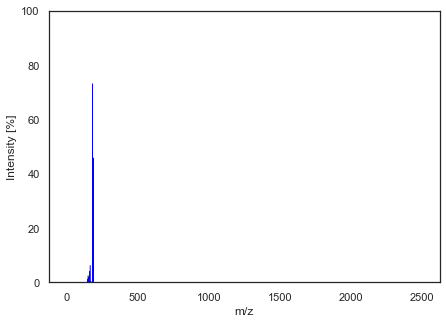

Matching spectra using cos_sim


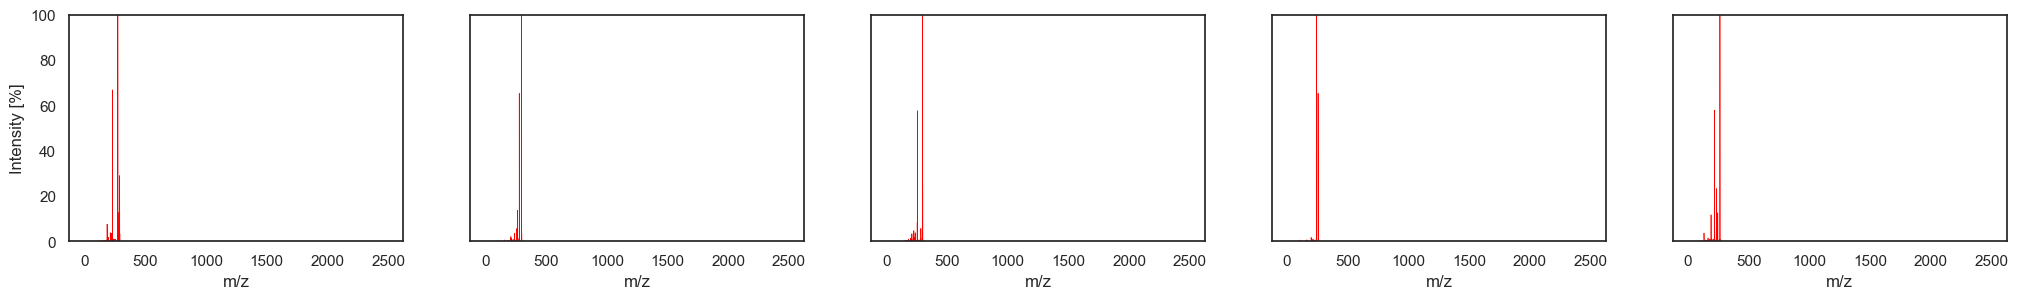

Matching spectra using eu_dist


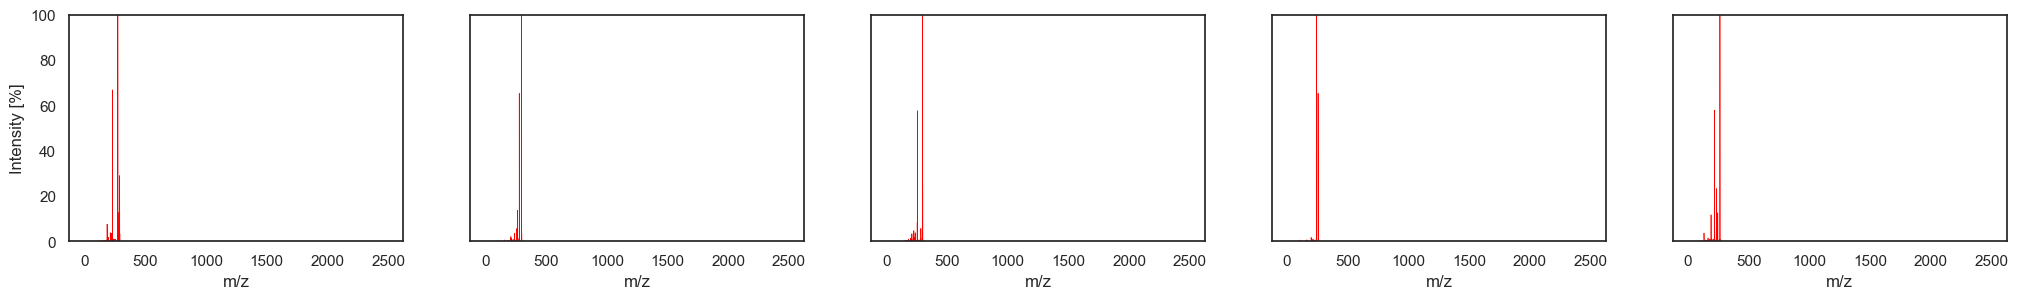

Matching spectra using per_diff


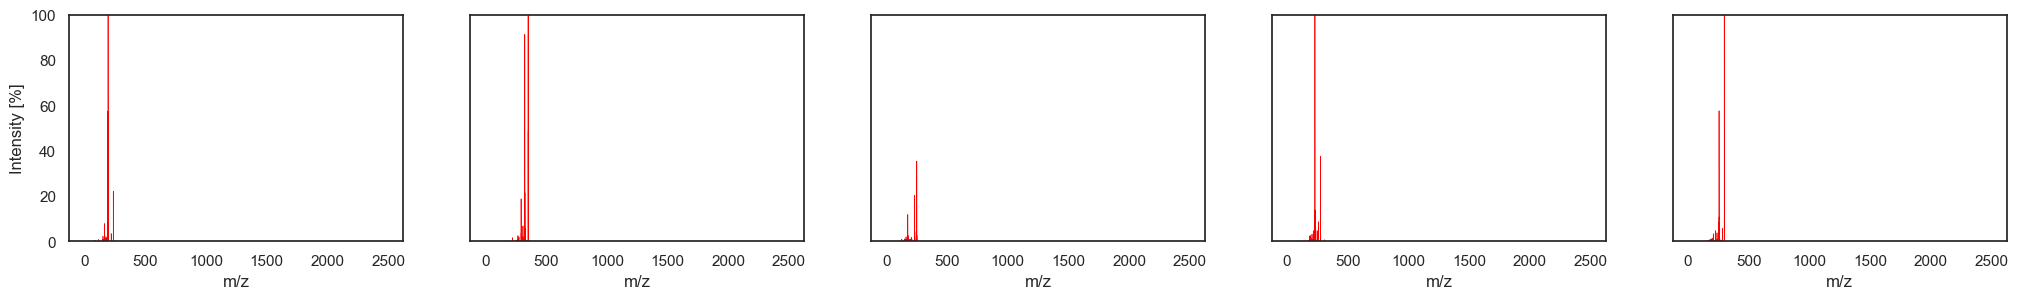

Match by scores


,id,spectrum,collision_energy,ionization_mode_id,cos_sim_3,eu_dist_3,per_diff_3
104437,JYXSWDCPHRTYGU-UHFFFAOYSA-N,117.03413:0.600000 151.00717:0.900000 153.0152:0.800000 154.03343:0.800000 155.04439:0.600000 155.06146:0.600000 159.03848:1.000000 160.04893:0.900000 161.9959:0.800000 165.01804:2.000000 167.0447...,50.0,0,0.995544,0.094408,0.344407
113352,RIGGEAZDTKMXSI-MEBVTJQTSA-N,121.040:0.137963 170.613:0.344907 171.137:30.811681 171.840:0.666820 172.177:1.632559 172.720:0.620832 173.200:0.137963 173.360:0.137963 173.600:0.137963 173.893:0.091975 174.640:0.068981 175.120:...,20.0,0,0.994690,0.103059,0.546264
67567,PTXIWVJSAQPKEY-UHFFFAOYSA-N,103.0701:0.317508 117.0383:0.907167 120.4454:0.861808 132.0242:1.950408 135.0074:34.578168 135.0428:1.043242 135.0642:0.483822 135.0868:0.362867 135.1129:0.377986 135.4515:0.408225 139.0582:0.3779...,40.0,0,0.994437,0.105481,0.207938
94820,JCTYWRARKVGOBK-UHFFFAOYSA-N,103.46791:0.132173 109.38998:0.115652 121.67151:0.093623 141.06821:0.115652 151.05396:0.132173 152.06322:0.121159 153.0687:0.093623 162.12341:0.115652 162.50659:0.115652 165.04793:0.148695 165.056...,6.0,1,0.994383,0.105990,0.236681
104441,JYXSWDCPHRTYGU-UHFFFAOYSA-N,137.02049:0.600000 143.04468:0.700000 143.05693:0.500000 151.00026:1.000000 151.99998:0.500000 154.04523:0.900000 155.05281:0.600000 161.99374:1.500000 163.00551:0.800000 165.01729:1.000000 167.05...,50.0,0,0.994009,0.109461,0.369155


,id,spectrum,collision_energy,ionization_mode_id,eu_dist_3,cos_sim_3,per_diff_3
104437,JYXSWDCPHRTYGU-UHFFFAOYSA-N,117.03413:0.600000 151.00717:0.900000 153.0152:0.800000 154.03343:0.800000 155.04439:0.600000 155.06146:0.600000 159.03848:1.000000 160.04893:0.900000 161.9959:0.800000 165.01804:2.000000 167.0447...,50.0,0,0.094408,0.995544,0.344407
113352,RIGGEAZDTKMXSI-MEBVTJQTSA-N,121.040:0.137963 170.613:0.344907 171.137:30.811681 171.840:0.666820 172.177:1.632559 172.720:0.620832 173.200:0.137963 173.360:0.137963 173.600:0.137963 173.893:0.091975 174.640:0.068981 175.120:...,20.0,0,0.103059,0.994690,0.546264
67567,PTXIWVJSAQPKEY-UHFFFAOYSA-N,103.0701:0.317508 117.0383:0.907167 120.4454:0.861808 132.0242:1.950408 135.0074:34.578168 135.0428:1.043242 135.0642:0.483822 135.0868:0.362867 135.1129:0.377986 135.4515:0.408225 139.0582:0.3779...,40.0,0,0.105481,0.994437,0.207938
94820,JCTYWRARKVGOBK-UHFFFAOYSA-N,103.46791:0.132173 109.38998:0.115652 121.67151:0.093623 141.06821:0.115652 151.05396:0.132173 152.06322:0.121159 153.0687:0.093623 162.12341:0.115652 162.50659:0.115652 165.04793:0.148695 165.056...,6.0,1,0.105990,0.994383,0.236681
104441,JYXSWDCPHRTYGU-UHFFFAOYSA-N,137.02049:0.600000 143.04468:0.700000 143.05693:0.500000 151.00026:1.000000 151.99998:0.500000 154.04523:0.900000 155.05281:0.600000 161.99374:1.500000 163.00551:0.800000 165.01729:1.000000 167.05...,50.0,0,0.109461,0.994009,0.369155


,id,spectrum,collision_energy,ionization_mode_id,per_diff_3,cos_sim_3,eu_dist_3
59856,YOSHYTLCDANDAN-UHFFFAOYSA-N,67.05173:0.018038 77.03493:0.036076 79.04952:0.036076 79.05202:0.054113 80.04836:0.090189 81.06864:0.072151 84.07813:1.093436 91.78399:0.036076 95.03916:0.018038 95.04601:0.089760 96.07767:0.13141...,35.0,1,0.153365,0.976451,0.217022
24436,VEZXFTKZUMARDU-UHFFFAOYSA-N,71.739166:0.036886 75.965607:0.044512 76.339912:0.029261 78.208725:0.047172 78.958282:0.035645 79.054977:0.076965 80.142021:0.027133 81.068680:0.029083 82.368332:0.028729 83.009323:0.068452 84.318...,NaN,1,0.154642,0.960392,0.281453
58340,JAUOIFJMECXRGI-UHFFFAOYSA-N,44.04594:0.057742 80.04834:0.086613 82.06483:0.162228 93.05891:0.115485 115.05423:0.028871 117.05439:0.057742 128.08449:0.057742 131.06697:0.057742 144.07535:0.057742 151.05597:0.057742 163.02866:...,35.0,1,0.163312,0.971355,0.239354
97332,MCSPBPXATWBACD-GAYQJXMFSA-N,45.666237:0.096769 46.190941:0.098872 46.238297:0.111494 47.023869:0.073628 47.073017:0.077836 47.379398:0.077836 47.940006:0.073628 48.075153:0.096769 48.503910:0.077836 48.841331:0.111494 49.528...,NaN,1,0.165104,0.988576,0.151154
94795,VNBUMBNLPGLBML-UHFFFAOYSA-N,68.02527:0.031501 68.50278:0.034760 78.04748:0.026070 79.05551:0.018466 89.03438:0.064088 89.03932:0.076037 90.03191:0.026070 90.04342:0.023897 93.03271:0.058657 94.07638:0.019552 95.00652:0.03150...,6.0,1,0.166505,0.958664,0.287527


Intermediate spectrum


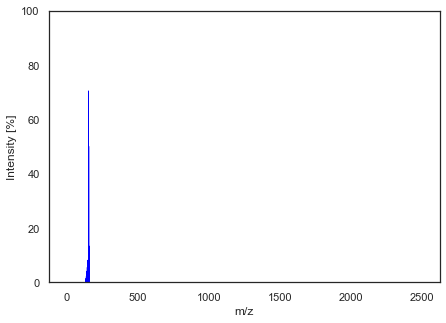

Matching spectra using cos_sim


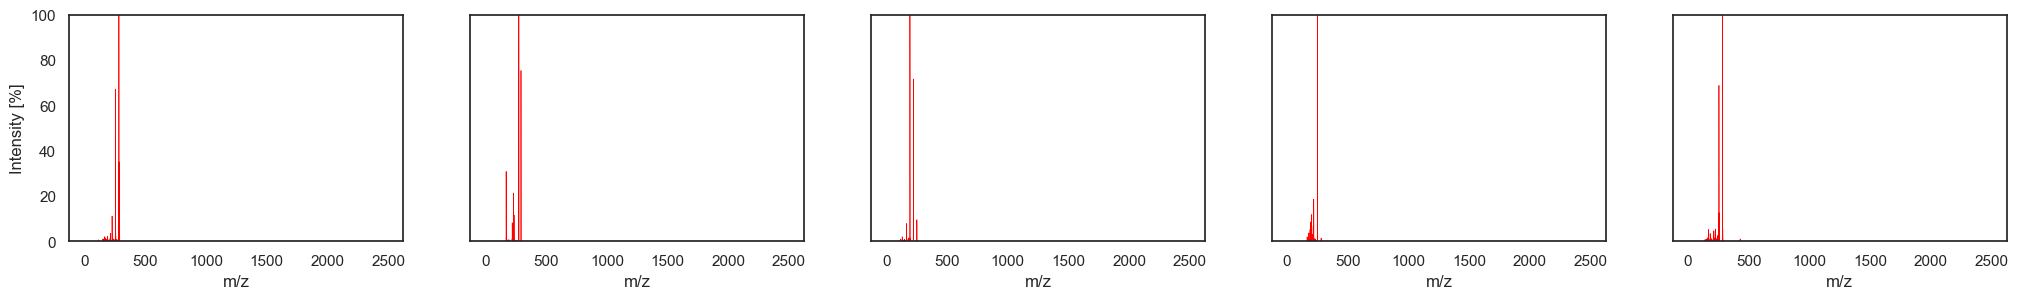

Matching spectra using eu_dist


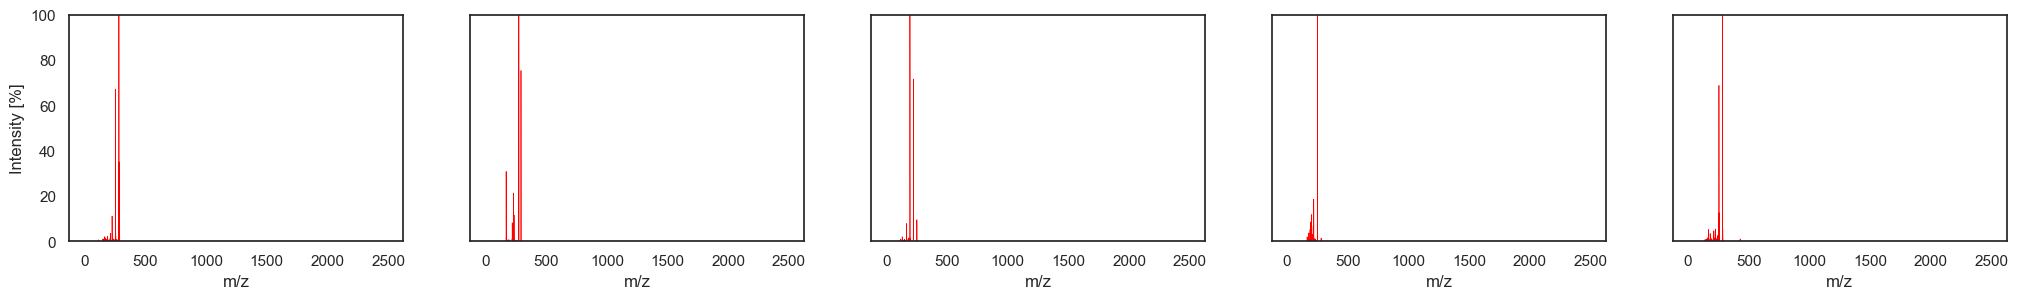

Matching spectra using per_diff


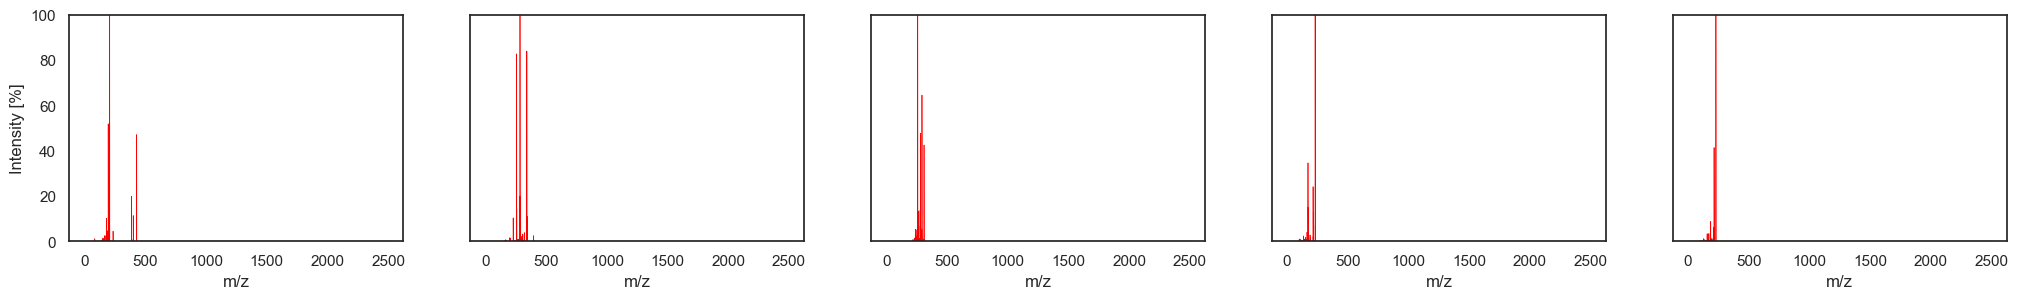

Match by scores


,id,spectrum,collision_energy,ionization_mode_id,cos_sim_4,eu_dist_4,per_diff_4
63292,JGCSKOVQDXEQHI-UHFFFAOYSA-N,67.097755:0.098345 99.021164:0.108180 101.038757:0.152435 102.032974:0.143830 113.238373:0.143830 120.043457:0.105721 123.733131:0.116785 123.773964:0.143830 124.691521:0.103263 125.037849:0.81749...,NaN,1,0.995145,0.098537,0.415053
94820,JCTYWRARKVGOBK-UHFFFAOYSA-N,103.46791:0.132173 109.38998:0.115652 121.67151:0.093623 141.06821:0.115652 151.05396:0.132173 152.06322:0.121159 153.0687:0.093623 162.12341:0.115652 162.50659:0.115652 165.04793:0.148695 165.056...,6.0,1,0.994840,0.101589,0.128259
104445,JYXSWDCPHRTYGU-UHFFFAOYSA-N,107.01125:2.000000 109.02681:0.600000 117.03019:0.600000 120.5264:0.500000 143.05434:0.700000 144.04608:0.700000 146.06834:0.900000 151.00227:2.900000 159.05286:0.500000 163.00079:0.600000 164.009...,50.0,0,0.994740,0.102567,0.315388
44183,PCMORTLOPMLEFB-ONEGZZNKSA-N,50.124690:0.014600 50.227409:0.015304 50.232570:0.010613 50.392343:0.014634 50.406756:0.008874 50.477340:0.013746 50.960147:0.017082 51.045890:0.012209 51.060009:0.009848 51.313175:0.016924 51.439...,35.0,0,0.993510,0.113931,0.380364
101310,DCKYPAZZUYXYTC-SCGWIAOYSA-N,51.470865:0.023833 52.104355:0.024011 52.626905:0.011669 53.044263:0.019935 53.115758:0.243170 53.780869:0.021097 56.427154:0.020146 56.775072:0.022318 58.813424:0.016998 59.012439:0.587056 59.899...,35.0,0,0.993424,0.114680,0.188783


,id,spectrum,collision_energy,ionization_mode_id,eu_dist_4,cos_sim_4,per_diff_4
63292,JGCSKOVQDXEQHI-UHFFFAOYSA-N,67.097755:0.098345 99.021164:0.108180 101.038757:0.152435 102.032974:0.143830 113.238373:0.143830 120.043457:0.105721 123.733131:0.116785 123.773964:0.143830 124.691521:0.103263 125.037849:0.81749...,NaN,1,0.098537,0.995145,0.415053
94820,JCTYWRARKVGOBK-UHFFFAOYSA-N,103.46791:0.132173 109.38998:0.115652 121.67151:0.093623 141.06821:0.115652 151.05396:0.132173 152.06322:0.121159 153.0687:0.093623 162.12341:0.115652 162.50659:0.115652 165.04793:0.148695 165.056...,6.0,1,0.101589,0.994840,0.128259
104445,JYXSWDCPHRTYGU-UHFFFAOYSA-N,107.01125:2.000000 109.02681:0.600000 117.03019:0.600000 120.5264:0.500000 143.05434:0.700000 144.04608:0.700000 146.06834:0.900000 151.00227:2.900000 159.05286:0.500000 163.00079:0.600000 164.009...,50.0,0,0.102567,0.994740,0.315388
44183,PCMORTLOPMLEFB-ONEGZZNKSA-N,50.124690:0.014600 50.227409:0.015304 50.232570:0.010613 50.392343:0.014634 50.406756:0.008874 50.477340:0.013746 50.960147:0.017082 51.045890:0.012209 51.060009:0.009848 51.313175:0.016924 51.439...,35.0,0,0.113931,0.993510,0.380364
101310,DCKYPAZZUYXYTC-SCGWIAOYSA-N,51.470865:0.023833 52.104355:0.024011 52.626905:0.011669 53.044263:0.019935 53.115758:0.243170 53.780869:0.021097 56.427154:0.020146 56.775072:0.022318 58.813424:0.016998 59.012439:0.587056 59.899...,35.0,0,0.114680,0.993424,0.188783


,id,spectrum,collision_energy,ionization_mode_id,per_diff_4,cos_sim_4,eu_dist_4
94820,JCTYWRARKVGOBK-UHFFFAOYSA-N,103.46791:0.132173 109.38998:0.115652 121.67151:0.093623 141.06821:0.115652 151.05396:0.132173 152.06322:0.121159 153.0687:0.093623 162.12341:0.115652 162.50659:0.115652 165.04793:0.148695 165.056...,6.0,1,0.128259,0.994840,0.101589
28878,BHMBVRSPMRCCGG-OUTUXVNYSA-N,95.040:0.065288 135.120:0.087051 147.383:0.130577 161.120:0.130577 161.360:0.152340 161.600:0.065288 163.100:0.087051 171.352:0.544070 172.780:0.087051 173.120:0.087051 173.600:0.130577 174.080:0....,20.0,0,0.141731,0.988220,0.153494
95028,FZHZQHNKCPJTNQ-UHFFFAOYSA-N,77.0407:0.199760 78.04094:0.139832 80.51866:0.146491 91.05441:0.119856 93.05333:0.133174 102.04494:0.279664 103.03085:0.113197 103.05971:0.466107 105.06997:0.199760 105.07593:0.173126 115.0545:5.6...,6.0,1,0.148405,0.942379,0.339475
28879,BHMBVRSPMRCCGG-OUTUXVNYSA-N,95.110:0.119417 106.933:0.059709 107.120:0.095534 121.095:0.417960 135.360:0.191068 147.040:0.059709 147.210:0.131359 149.040:0.095534 158.000:0.155243 158.160:0.274660 158.400:0.059709 159.200:0....,25.0,0,0.161474,0.990101,0.140708
6990,PKPHZFVECLENRP-QDWLCUAPSA-N,69.033798:6.888889 93.070900:0.422222 121.028603:0.355556 121.064400:0.377778 123.080704:1.066667 147.080795:0.911111 149.023407:11.555556 149.034897:0.488889 149.096100:0.733333 151.038605:2.2222...,NaN,1,0.162092,0.989903,0.142107


Intermediate spectrum


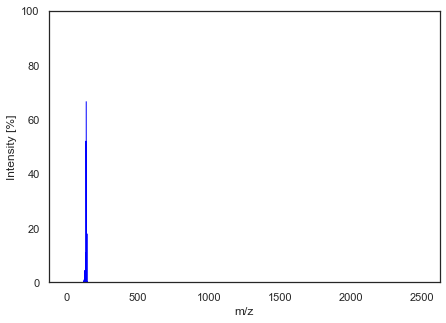

Matching spectra using cos_sim


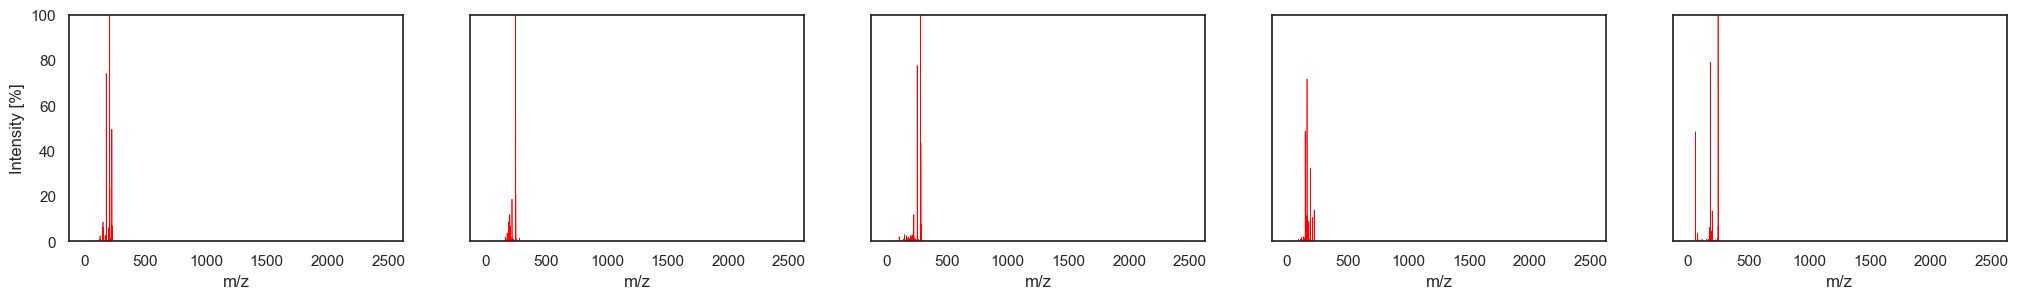

Matching spectra using eu_dist


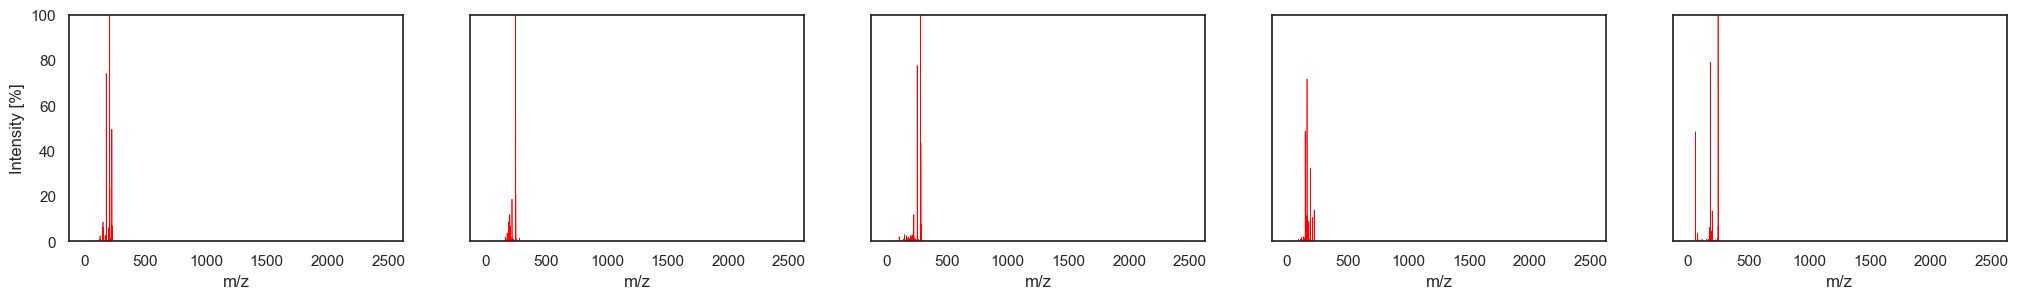

Matching spectra using per_diff


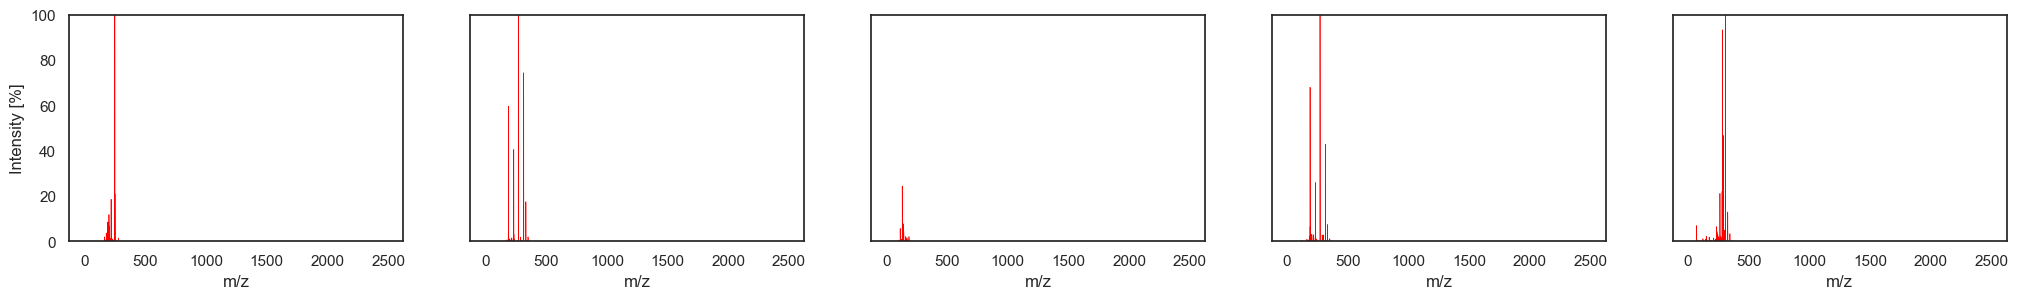

Match by scores


,id,spectrum,collision_energy,ionization_mode_id,cos_sim_5,eu_dist_5,per_diff_5
101818,BXQZTMMXFKFJIY-UHFFFAOYSA-N,135.222656:0.215138 136.941162:0.102520 144.819519:0.476390 145.721558:0.219045 147.033752:12.466262 147.959061:4.477650 148.762985:0.242873 160.068024:0.117852 162.609985:0.372190 175.016693:0.01...,NaN,1,0.995289,0.097070,0.372170
87445,FLEXCYTURSFUNC-UHFFFAOYSA-N,50.300618:0.022370 51.085165:0.017902 52.445827:0.021636 52.463418:0.021894 52.793423:0.016340 53.010763:0.024774 53.209456:0.024986 53.537669:0.022765 54.043973:0.016001 54.192740:0.025632 54.932...,65.0,1,0.994986,0.100138,0.160780
44183,PCMORTLOPMLEFB-ONEGZZNKSA-N,50.124690:0.014600 50.227409:0.015304 50.232570:0.010613 50.392343:0.014634 50.406756:0.008874 50.477340:0.013746 50.960147:0.017082 51.045890:0.012209 51.060009:0.009848 51.313175:0.016924 51.439...,35.0,0,0.994579,0.104131,0.404508
18027,XDSHNNRBLSBDAP-SNAWJCMRSA-N,103.0026:2.729730 111.0816:1.503504 117.9506:3.171171 118.0374:1.050050 120.0520:1.753754 123.0426:2.428428 130.0425:1.088088 131.5400:1.051051 132.0487:1.037037 133.9520:1.413413 134.0667:2.30630...,10.0,1,0.994514,0.104744,0.439707
30427,TZBJGXHYKVUXJN-UHFFFAOYSA-N,77.521111:0.121688 78.692749:0.113723 91.05365:0.270116 108.7789:0.117635 111.007736:0.478321 119.049088:0.415969 119.676193:0.139733 121.028122:1.056367 127.229187:0.127743 131.049301:0.439608 13...,45.0,1,0.993621,0.112955,0.431739


,id,spectrum,collision_energy,ionization_mode_id,eu_dist_5,cos_sim_5,per_diff_5
101818,BXQZTMMXFKFJIY-UHFFFAOYSA-N,135.222656:0.215138 136.941162:0.102520 144.819519:0.476390 145.721558:0.219045 147.033752:12.466262 147.959061:4.477650 148.762985:0.242873 160.068024:0.117852 162.609985:0.372190 175.016693:0.01...,NaN,1,0.097070,0.995289,0.372170
87445,FLEXCYTURSFUNC-UHFFFAOYSA-N,50.300618:0.022370 51.085165:0.017902 52.445827:0.021636 52.463418:0.021894 52.793423:0.016340 53.010763:0.024774 53.209456:0.024986 53.537669:0.022765 54.043973:0.016001 54.192740:0.025632 54.932...,65.0,1,0.100138,0.994986,0.160780
44183,PCMORTLOPMLEFB-ONEGZZNKSA-N,50.124690:0.014600 50.227409:0.015304 50.232570:0.010613 50.392343:0.014634 50.406756:0.008874 50.477340:0.013746 50.960147:0.017082 51.045890:0.012209 51.060009:0.009848 51.313175:0.016924 51.439...,35.0,0,0.104131,0.994579,0.404508
18027,XDSHNNRBLSBDAP-SNAWJCMRSA-N,103.0026:2.729730 111.0816:1.503504 117.9506:3.171171 118.0374:1.050050 120.0520:1.753754 123.0426:2.428428 130.0425:1.088088 131.5400:1.051051 132.0487:1.037037 133.9520:1.413413 134.0667:2.30630...,10.0,1,0.104744,0.994514,0.439707
30427,TZBJGXHYKVUXJN-UHFFFAOYSA-N,77.521111:0.121688 78.692749:0.113723 91.05365:0.270116 108.7789:0.117635 111.007736:0.478321 119.049088:0.415969 119.676193:0.139733 121.028122:1.056367 127.229187:0.127743 131.049301:0.439608 13...,45.0,1,0.112955,0.993621,0.431739


,id,spectrum,collision_energy,ionization_mode_id,per_diff_5,cos_sim_5,eu_dist_5
20483,HSHNITRMYYLLCV-UHFFFAOYSA-N,50.306277:0.013022 50.406806:0.007841 50.427808:0.018638 50.902911:0.018956 51.472362:0.011834 51.790686:0.012768 53.025249:0.016591 53.908575:0.014880 54.653392:0.015186 54.986435:0.014375 55.207...,25.0,1,0.157646,0.968549,0.250805
69430,NNYBQONXHNTVIJ-UHFFFAOYSA-N,79.0542:0.279217 83.0492:0.153720 90.0464:0.104406 91.054:0.130295 115.0539:0.915842 116.0491:0.110315 116.0621:0.575953 117.0573:0.968723 117.0698:4.642652 118.0651:0.400411 128.062:0.324657 129....,60.0,1,0.158193,0.978238,0.208627
2838,OGJCZLOIKMTMKF-XBXARRHUSA-N,50.267257:0.035318 50.490901:0.070734 50.743432:0.026646 50.766957:0.064441 50.962420:0.073333 51.454284:0.036710 51.515178:0.040101 51.942258:0.037493 52.518505:0.070090 52.525299:0.038824 53.271...,65.0,0,0.160609,0.990894,0.134950
87445,FLEXCYTURSFUNC-UHFFFAOYSA-N,50.300618:0.022370 51.085165:0.017902 52.445827:0.021636 52.463418:0.021894 52.793423:0.016340 53.010763:0.024774 53.209456:0.024986 53.537669:0.022765 54.043973:0.016001 54.192740:0.025632 54.932...,65.0,1,0.160780,0.994986,0.100138
6424,LYUZYPKZQDYMEE-WDZFZDKYSA-N,70.036011:0.065573 71.557594:0.056580 72.854851:0.082810 72.929131:0.037470 73.845093:0.088805 75.402588:0.082060 78.692123:0.065948 79.015427:0.073067 84.505440:0.129648 84.837723:0.090678 85.162...,NaN,1,0.166518,0.990197,0.140021


Intermediate spectrum


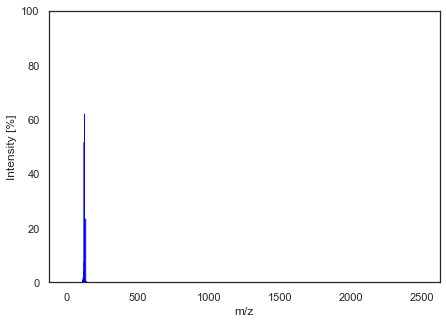

Matching spectra using cos_sim


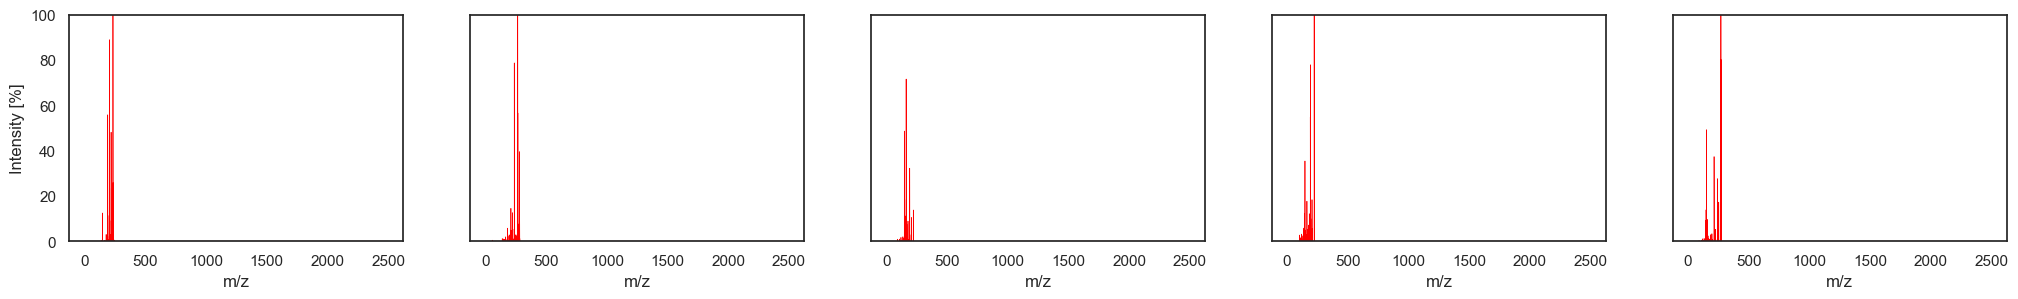

Matching spectra using eu_dist


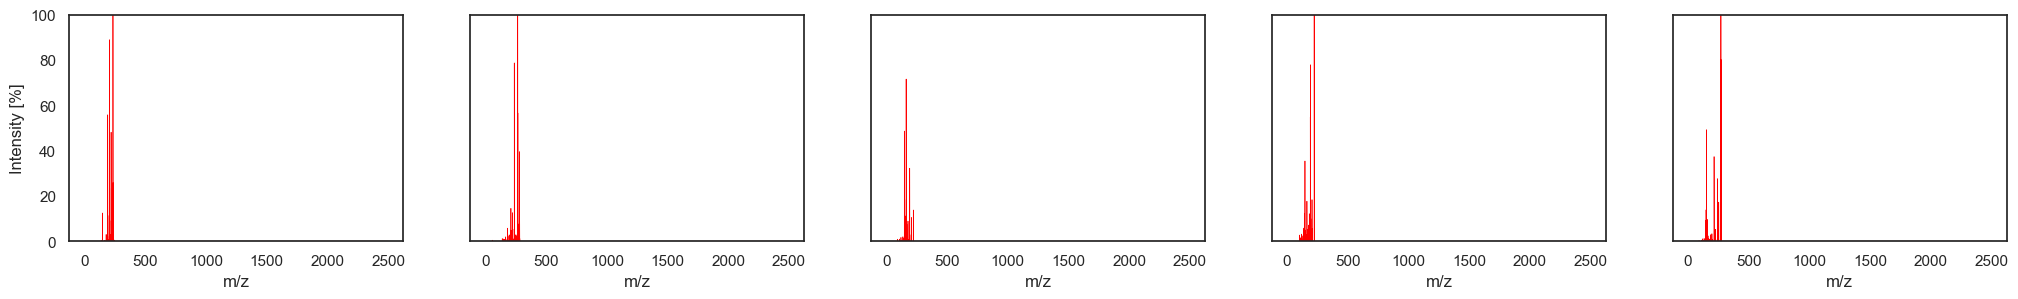

Matching spectra using per_diff


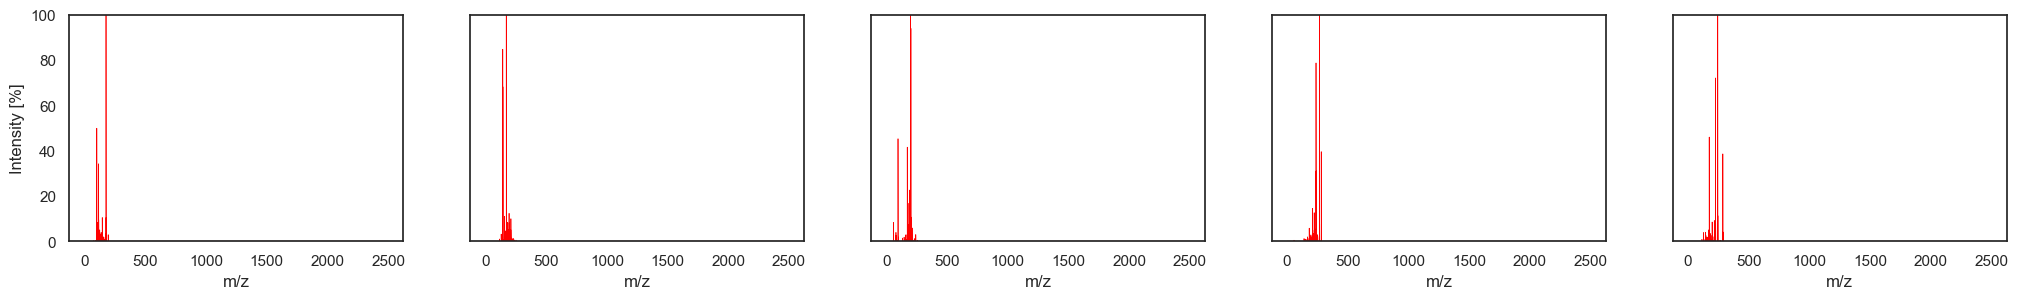

Match by scores


,id,spectrum,collision_energy,ionization_mode_id,cos_sim_6,eu_dist_6,per_diff_6
9171,OOXFLIUVCWLPKE-UHFFFAOYSA-N,50.004471:0.002510 50.083015:0.004393 50.149338:0.002779 50.180176:0.004931 50.202820:0.006007 50.287720:0.002152 50.339855:0.007351 50.374825:0.005759 50.429440:0.005020 50.481079:0.008248 50.603...,NaN,0,0.994720,0.102759,0.195320
28091,JHNVCKNCEVZGGC-UHFFFAOYSA-N,94.698914:0.013210 94.705101:0.015612 94.711288:0.028822 94.717468:0.036027 94.723656:0.033626 94.729843:0.010208 94.736031:0.007806 94.742218:0.024619 94.748405:0.034226 94.754585:0.033626 94.760...,NaN,1,0.994356,0.106247,0.271712
101818,BXQZTMMXFKFJIY-UHFFFAOYSA-N,135.222656:0.215138 136.941162:0.102520 144.819519:0.476390 145.721558:0.219045 147.033752:12.466262 147.959061:4.477650 148.762985:0.242873 160.068024:0.117852 162.609985:0.372190 175.016693:0.01...,NaN,1,0.994165,0.108031,0.472563
10242,JENFZXAOWFNHSE-UHFFFAOYSA-N,75.432106:0.026027 76.434090:0.047956 77.365486:0.046028 78.047157:0.033979 78.626755:0.074465 79.439743:0.066994 81.646225:0.075911 82.718391:0.067235 82.851822:0.070368 84.229942:0.052053 84.815...,NaN,1,0.993830,0.111083,0.234845
67336,PXNMNABLQWUMCX-UHFFFAOYSA-N,109.0635:3.870056 118.064:1.299435 120.0424:3.135593 128.0479:3.107345 130.0662:6.525424 132.0425:4.604520 133.525:1.101695 135.0422:0.790960 140.0475:1.299435 143.0719:0.988701 144.0798:1.384181 ...,20.0,1,0.993794,0.111415,0.258806


,id,spectrum,collision_energy,ionization_mode_id,eu_dist_6,cos_sim_6,per_diff_6
9171,OOXFLIUVCWLPKE-UHFFFAOYSA-N,50.004471:0.002510 50.083015:0.004393 50.149338:0.002779 50.180176:0.004931 50.202820:0.006007 50.287720:0.002152 50.339855:0.007351 50.374825:0.005759 50.429440:0.005020 50.481079:0.008248 50.603...,NaN,0,0.102759,0.994720,0.195320
28091,JHNVCKNCEVZGGC-UHFFFAOYSA-N,94.698914:0.013210 94.705101:0.015612 94.711288:0.028822 94.717468:0.036027 94.723656:0.033626 94.729843:0.010208 94.736031:0.007806 94.742218:0.024619 94.748405:0.034226 94.754585:0.033626 94.760...,NaN,1,0.106247,0.994356,0.271712
101818,BXQZTMMXFKFJIY-UHFFFAOYSA-N,135.222656:0.215138 136.941162:0.102520 144.819519:0.476390 145.721558:0.219045 147.033752:12.466262 147.959061:4.477650 148.762985:0.242873 160.068024:0.117852 162.609985:0.372190 175.016693:0.01...,NaN,1,0.108031,0.994165,0.472563
10242,JENFZXAOWFNHSE-UHFFFAOYSA-N,75.432106:0.026027 76.434090:0.047956 77.365486:0.046028 78.047157:0.033979 78.626755:0.074465 79.439743:0.066994 81.646225:0.075911 82.718391:0.067235 82.851822:0.070368 84.229942:0.052053 84.815...,NaN,1,0.111083,0.993830,0.234845
67336,PXNMNABLQWUMCX-UHFFFAOYSA-N,109.0635:3.870056 118.064:1.299435 120.0424:3.135593 128.0479:3.107345 130.0662:6.525424 132.0425:4.604520 133.525:1.101695 135.0422:0.790960 140.0475:1.299435 143.0719:0.988701 144.0798:1.384181 ...,20.0,1,0.111415,0.993794,0.258806


,id,spectrum,collision_energy,ionization_mode_id,per_diff_6,cos_sim_6,eu_dist_6
50906,DZTHIGRZJZPRDV-UHFFFAOYSA-N,50.025329:0.010819 50.199988:0.008441 50.358070:0.017676 50.537304:0.008642 51.131143:0.014740 51.344584:0.009987 52.096088:0.007772 52.396115:0.010622 53.302364:0.015962 53.352945:0.008954 53.412...,35.0,1,0.144088,0.976116,0.218558
38948,CCCPQTCGPQONAG-UHFFFAOYSA-N,100.021736:0.016664 100.290352:0.002687 100.688988:0.002768 100.874542:0.003700 101.047462:0.146908 101.191360:0.010522 101.574348:0.009546 101.739052:0.003910 101.820488:0.002386 102.063171:0.079...,NaN,1,0.150866,0.988539,0.151399
97524,JAQUASYNZVUNQP-NZEUDUFCSA-N,94.958252:0.116673 94.998291:0.030819 95.028755:0.072646 95.042915:0.083653 95.083885:0.094659 95.112778:0.099062 95.149658:0.061639 95.203262:0.112271 95.250641:0.127680 95.275894:0.063840 95.359...,NaN,1,0.159204,0.985380,0.171000
78888,NWWZPOKUUAIXIW-DHZHZOJOSA-N,108.055:1.521503 113.0153:0.579620 118.9574:0.993635 120.0564:0.636547 122.0702:20.555814 122.9984:1.832014 123.0778:6.500026 124.0075:9.030689 124.0821:0.574445 125.0156:19.463851 126.0054:0.7452...,50.0,1,0.162559,0.941738,0.341357
105091,VASUQTGZAPZKFK-UHFFFAOYSA-N,91.05441:0.600000 115.03482:0.500000 116.06755:0.700000 117.0608:1.600000 117.07077:1.300000 118.0639:0.500000 119.04874:1.800000 121.05894:0.700000 121.06563:2.300000 127.05836:0.600000 130.06131...,30.0,1,0.163085,0.947250,0.324808


Intermediate spectrum


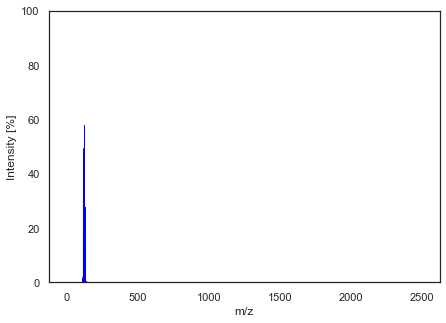

Matching spectra using cos_sim


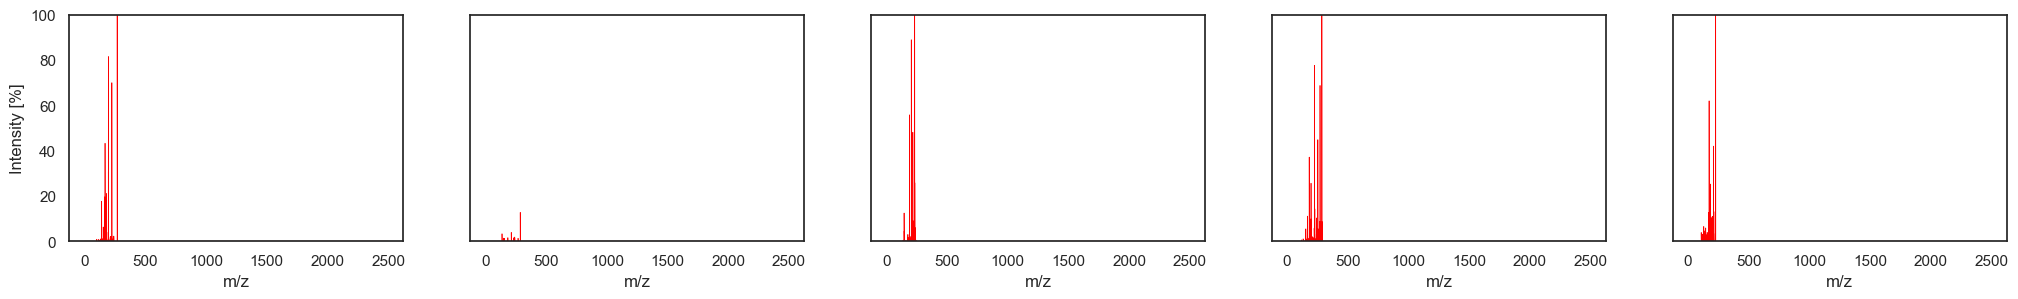

Matching spectra using eu_dist


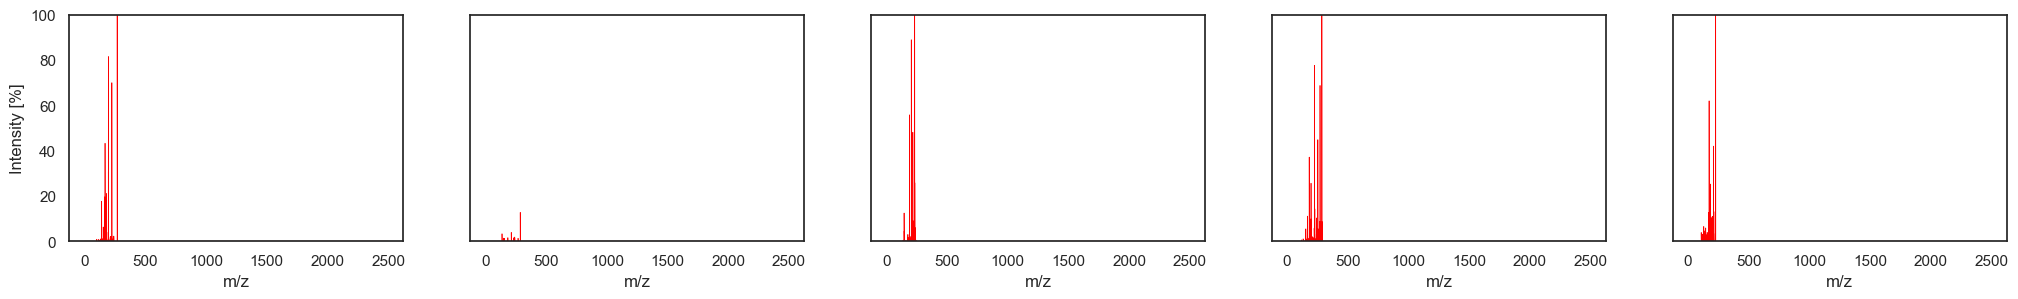

Matching spectra using per_diff


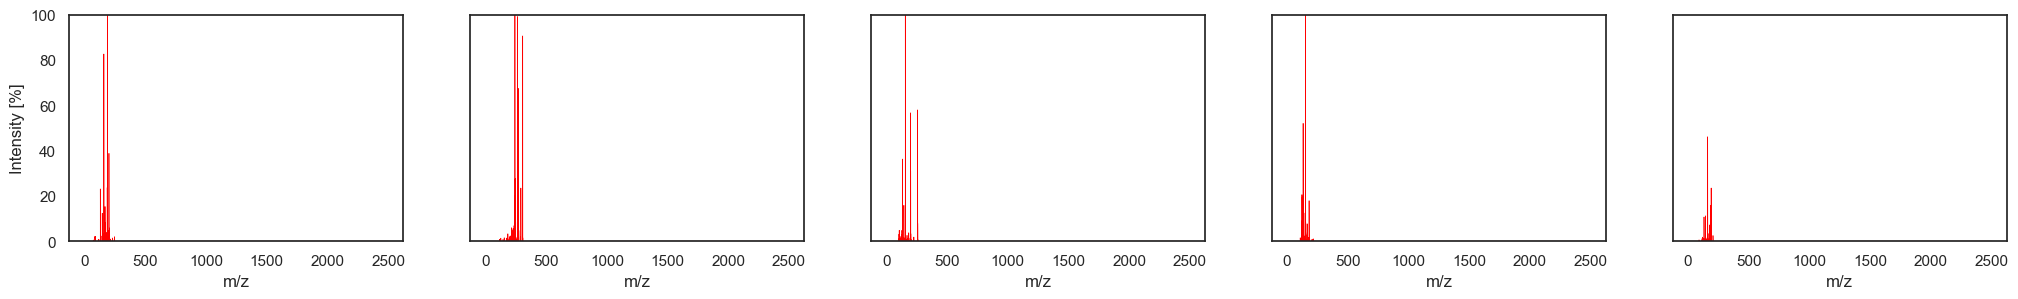

In [35]:
visualize_matching_spectra(df_all, slerp_spectra, data=data, prefix='slerp')